In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
import sys
import os

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

sys.path.append(parent_dir)

from config import input_columns, output_columns

print("Input columns:", input_columns)
print("Output columns:", output_columns)

Input columns: ['height', 'weight', 'gender', 'age', 'form']
Output columns: ['shoulder', 'sleeve', 'neck', 'chest', 'waist', 'stomach', 'hip', 'front_jacket', 'biceps', 'armhole', 'front_vest', 'back_length']


RAW DATA

In [3]:
df = pd.read_csv(Path(r"..\data\raw\dataset_measure.csv").resolve())

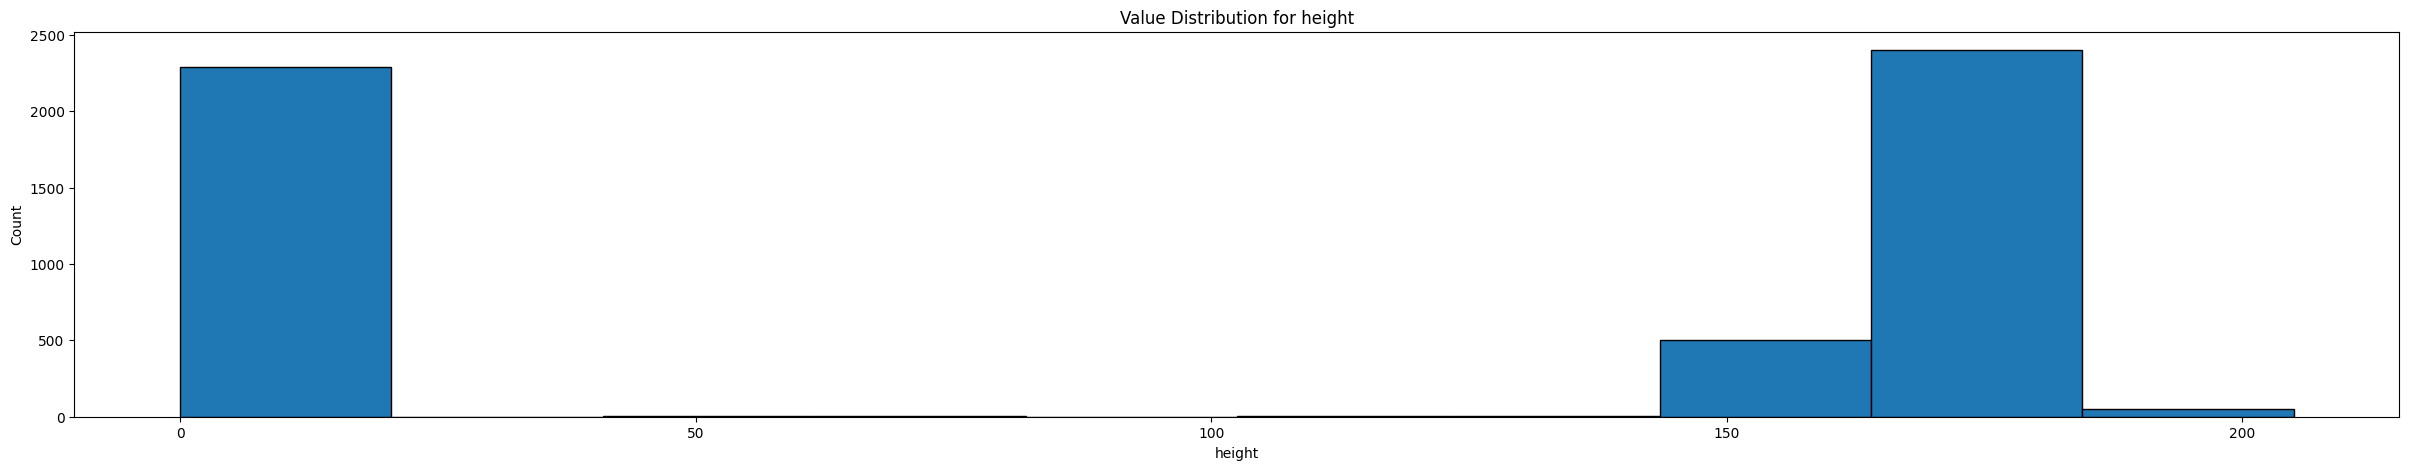

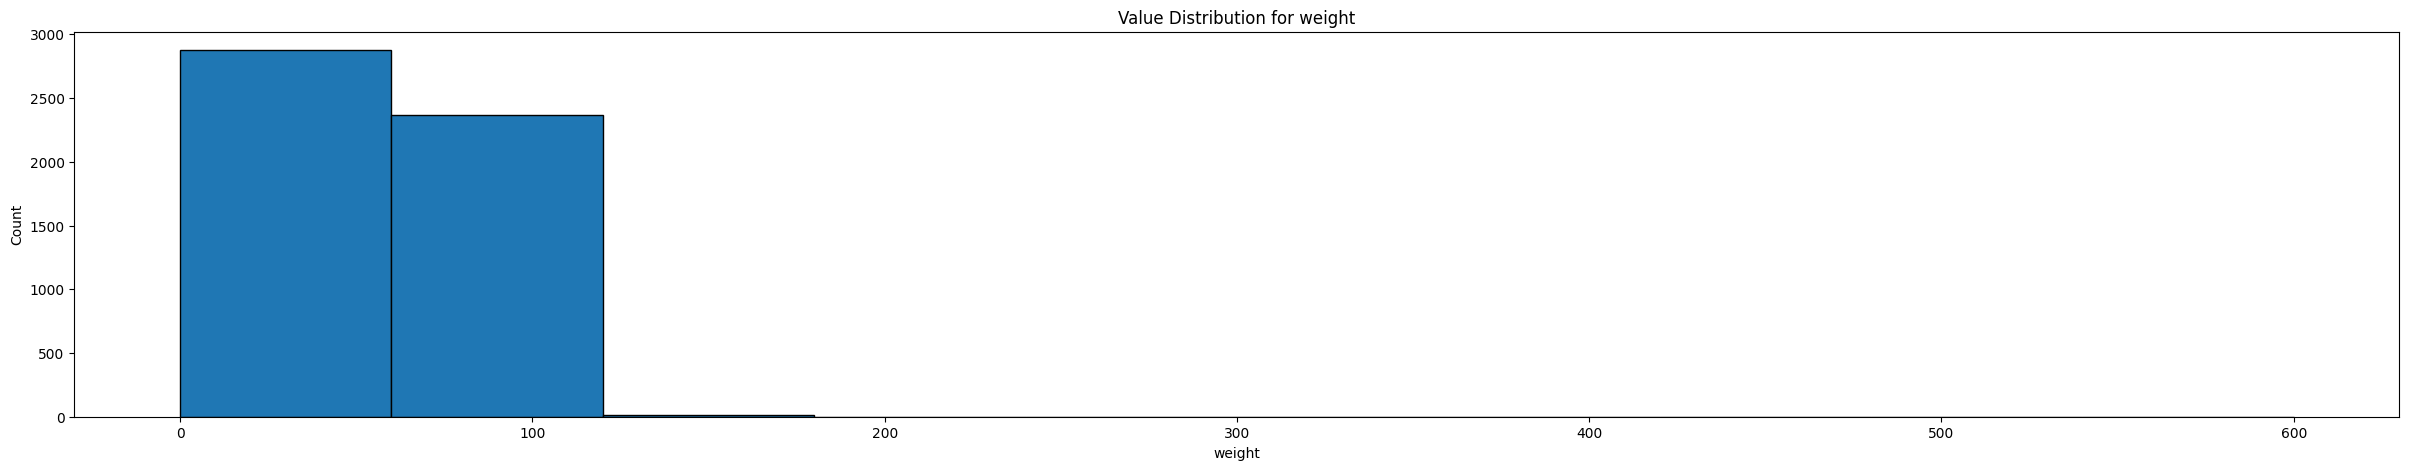

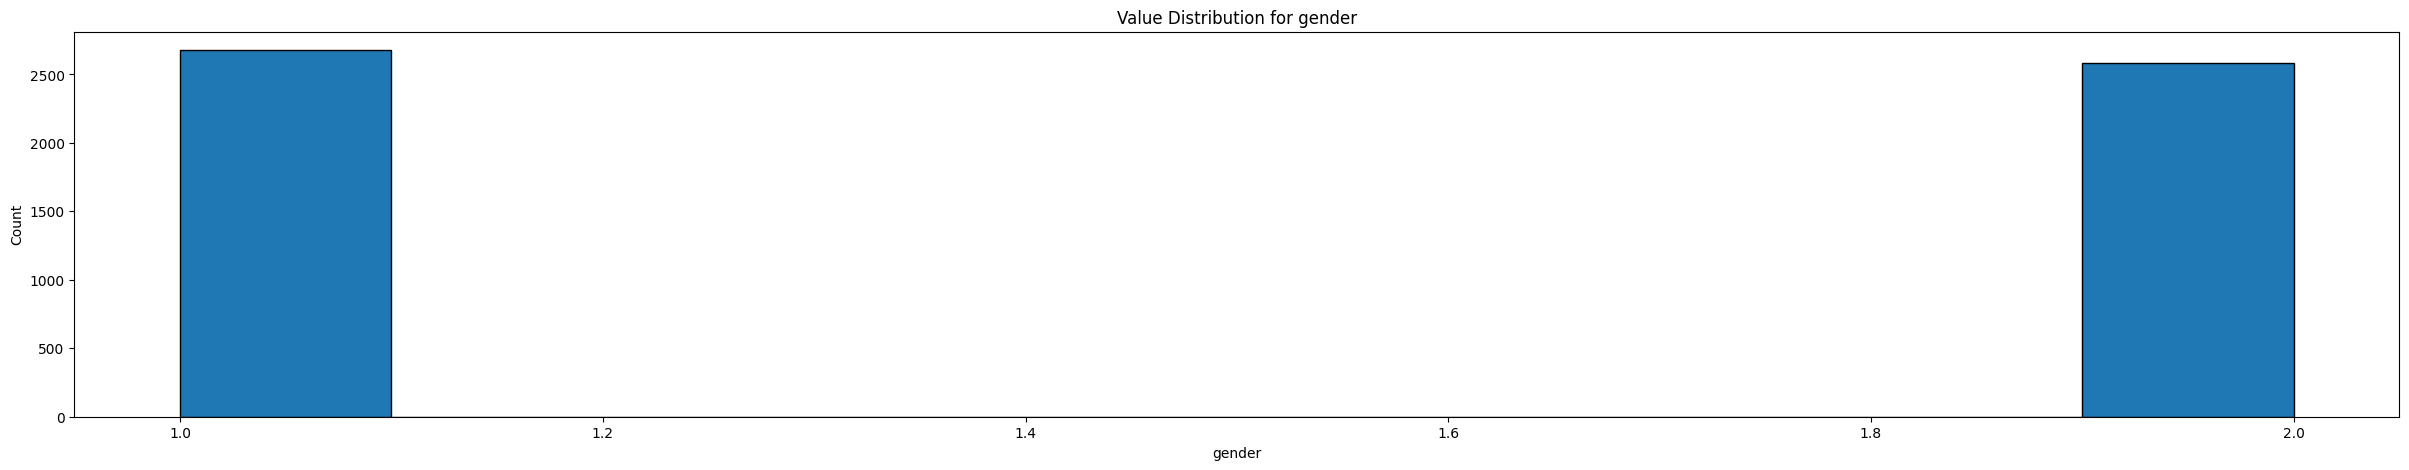

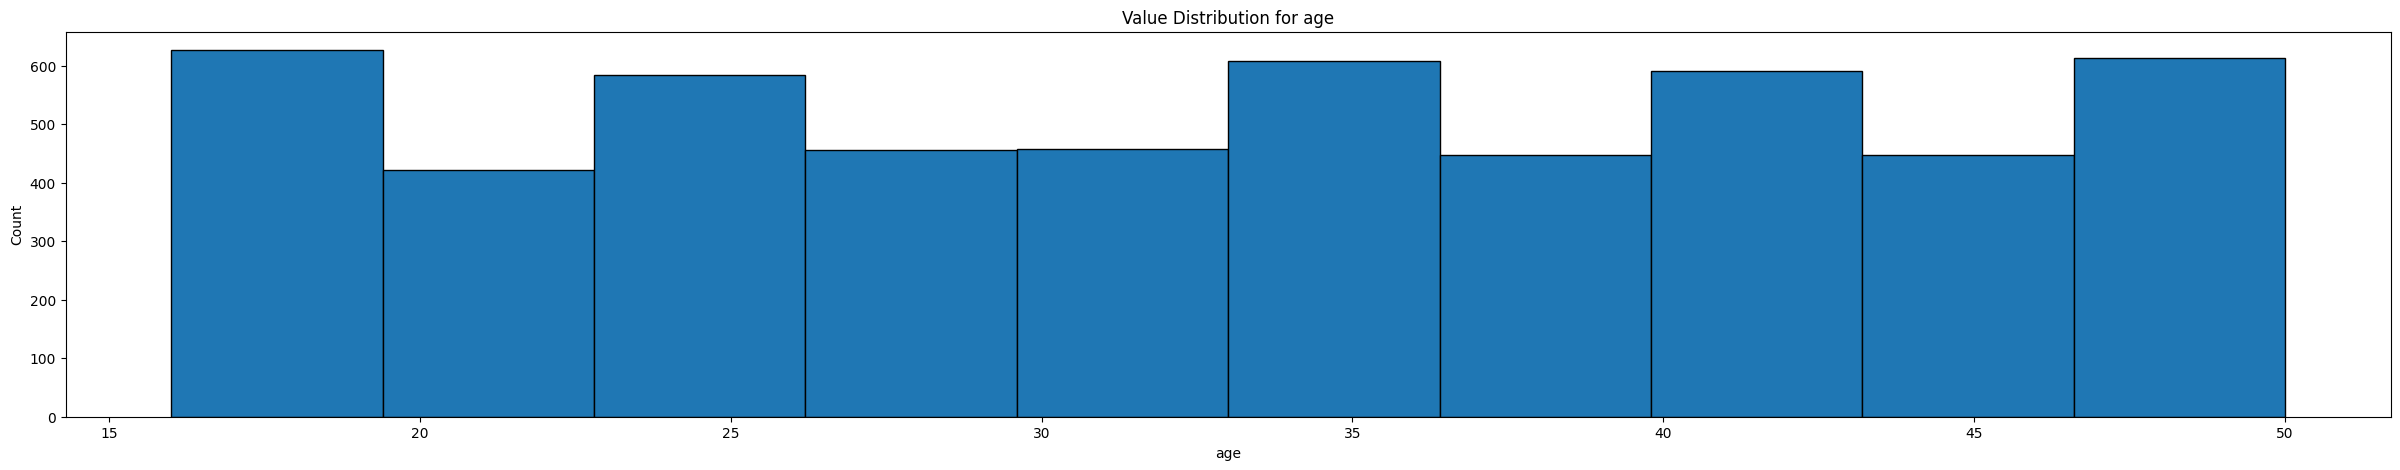

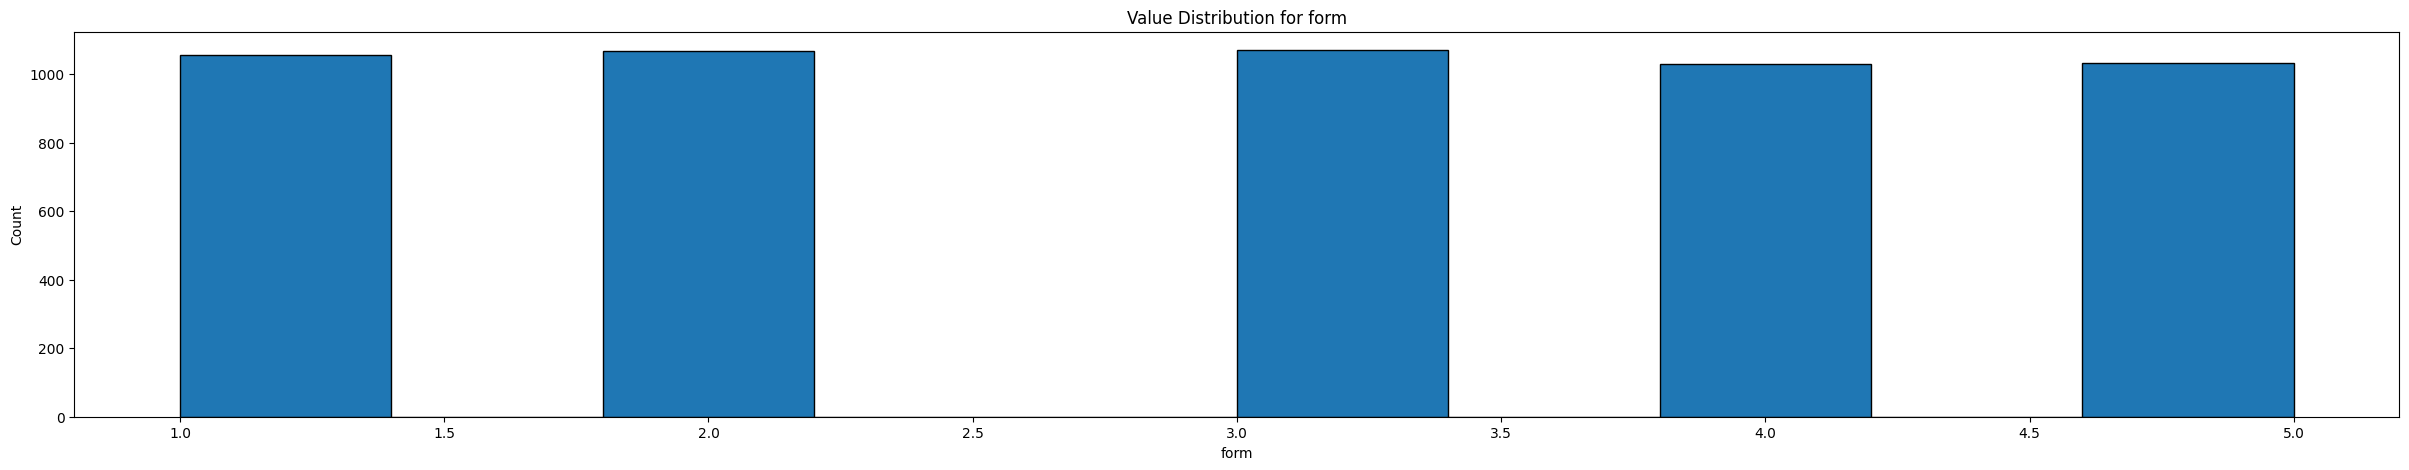

In [4]:
labels = input_columns

# Vẽ histogram cho từng cột
for label in labels:
    fig, ax = plt.subplots(figsize=(30, 5))

    # Vẽ histogram
    ax.hist(df[label].dropna(), bins=10, edgecolor='k')
    ax.set_xlabel(label)
    ax.set_ylabel('Count')
    ax.set_title('Value Distribution for ' + label)

    # Hiển thị biểu đồ
    plt.show()

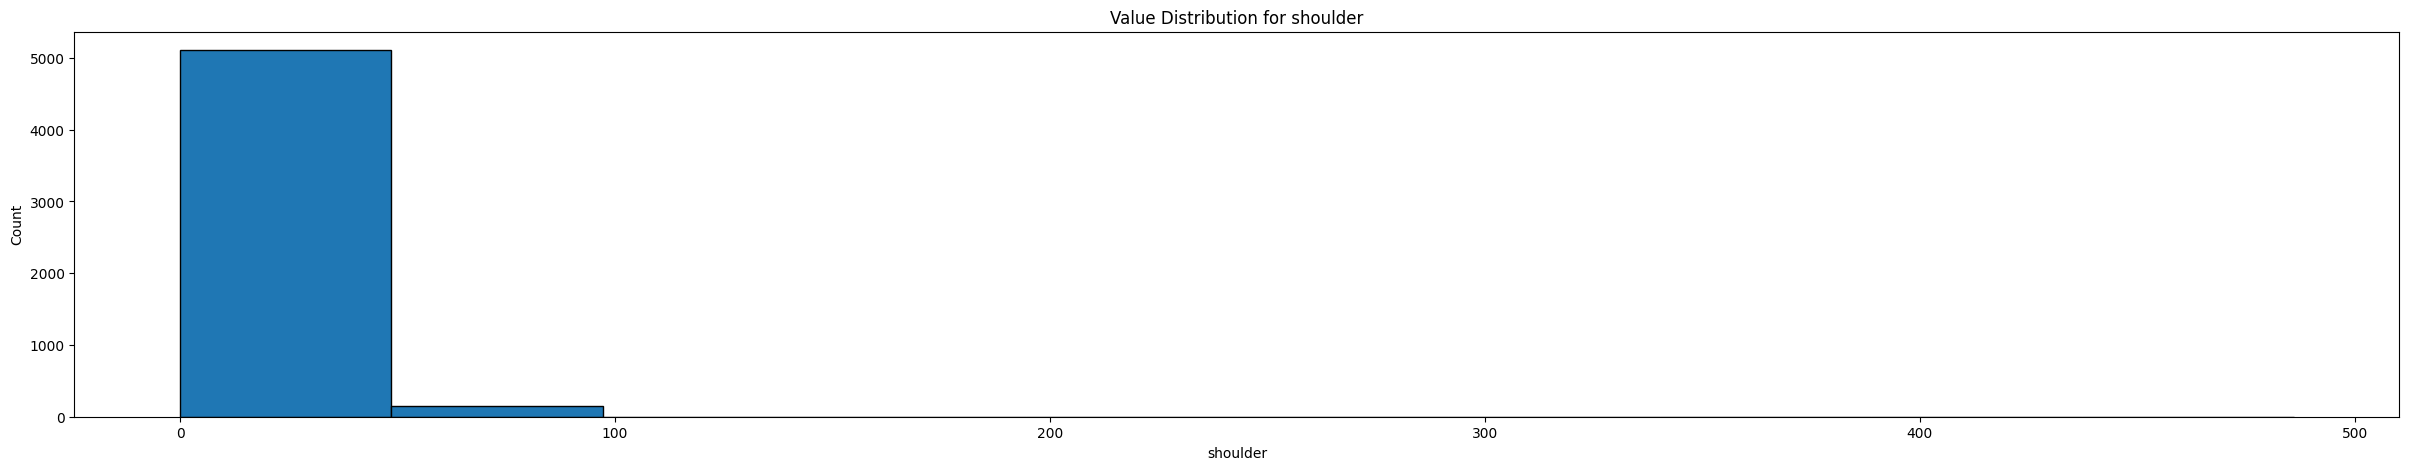

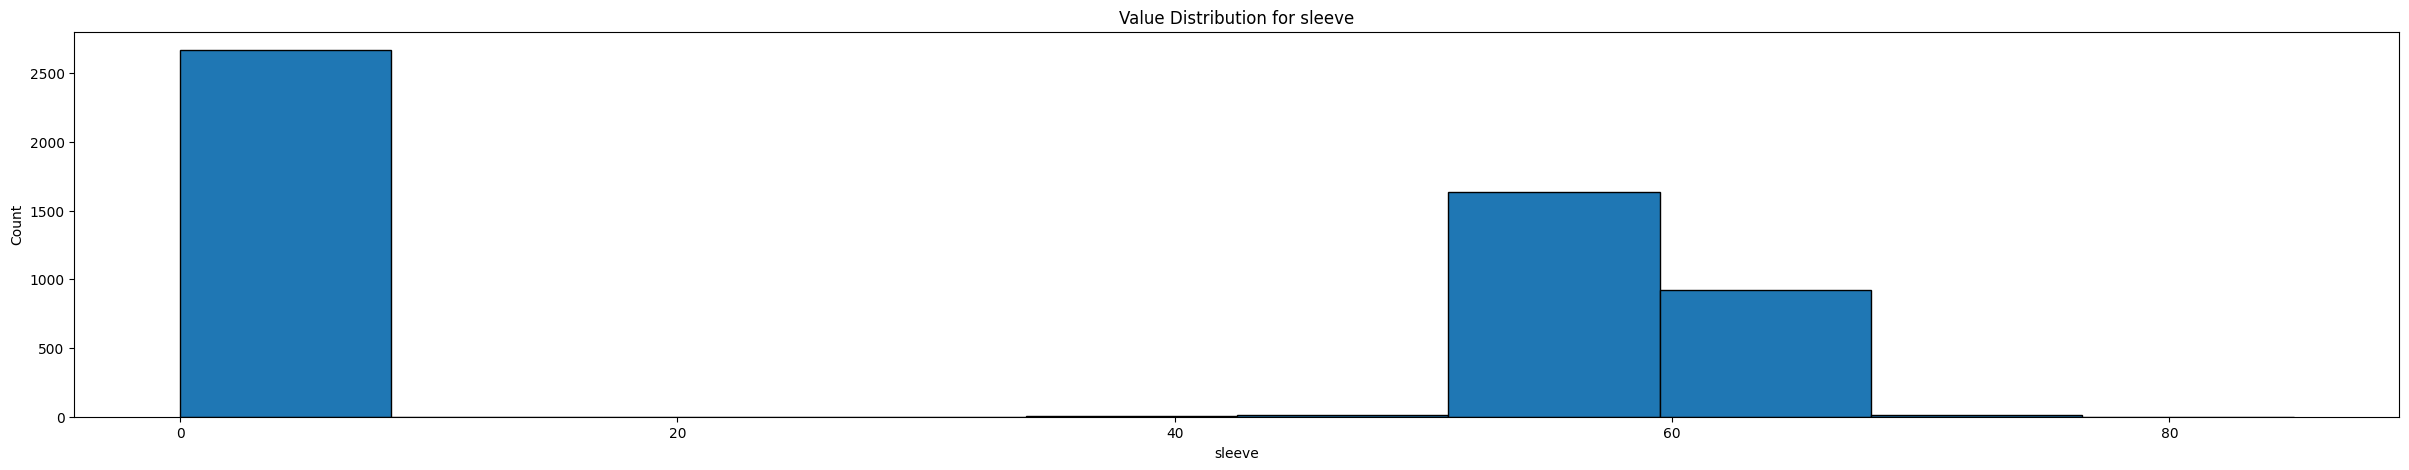

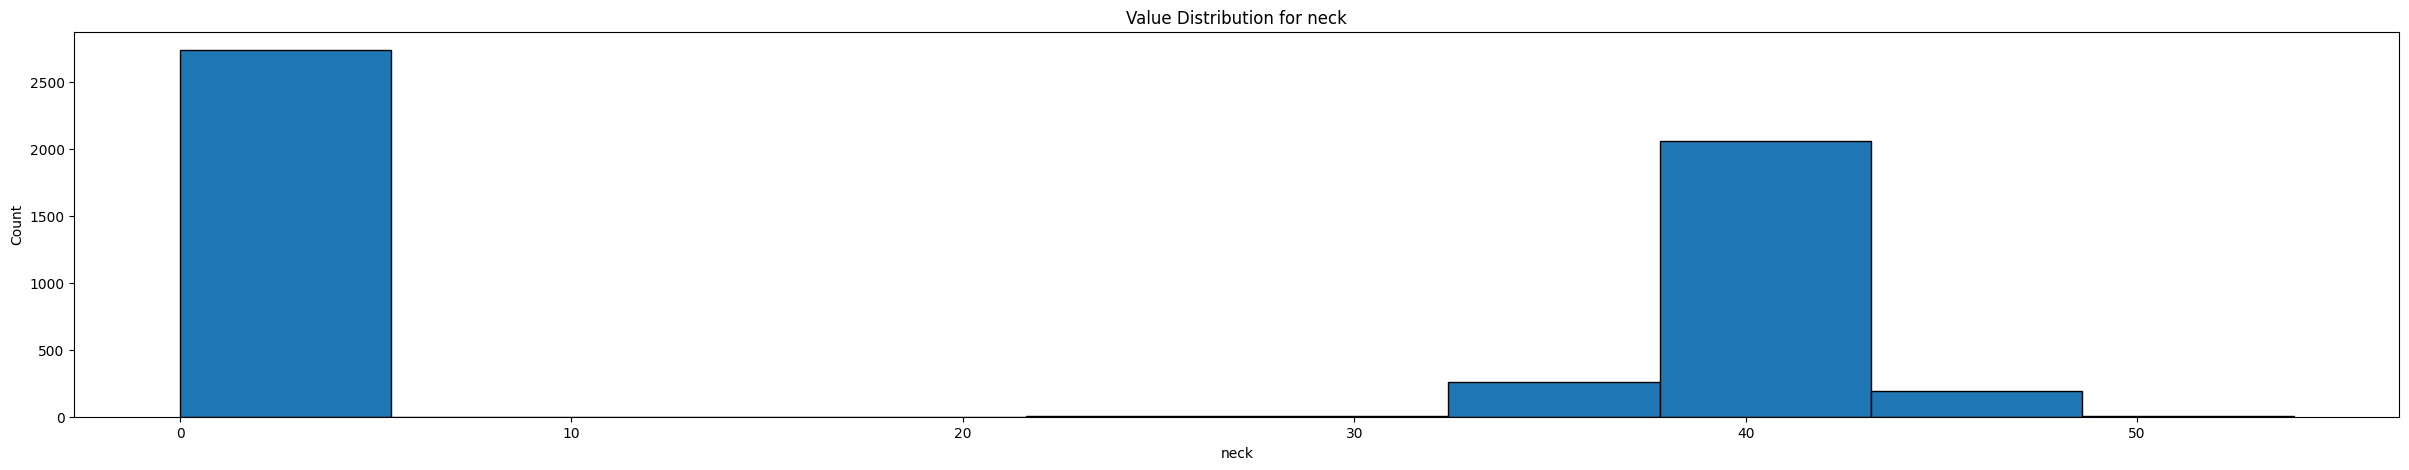

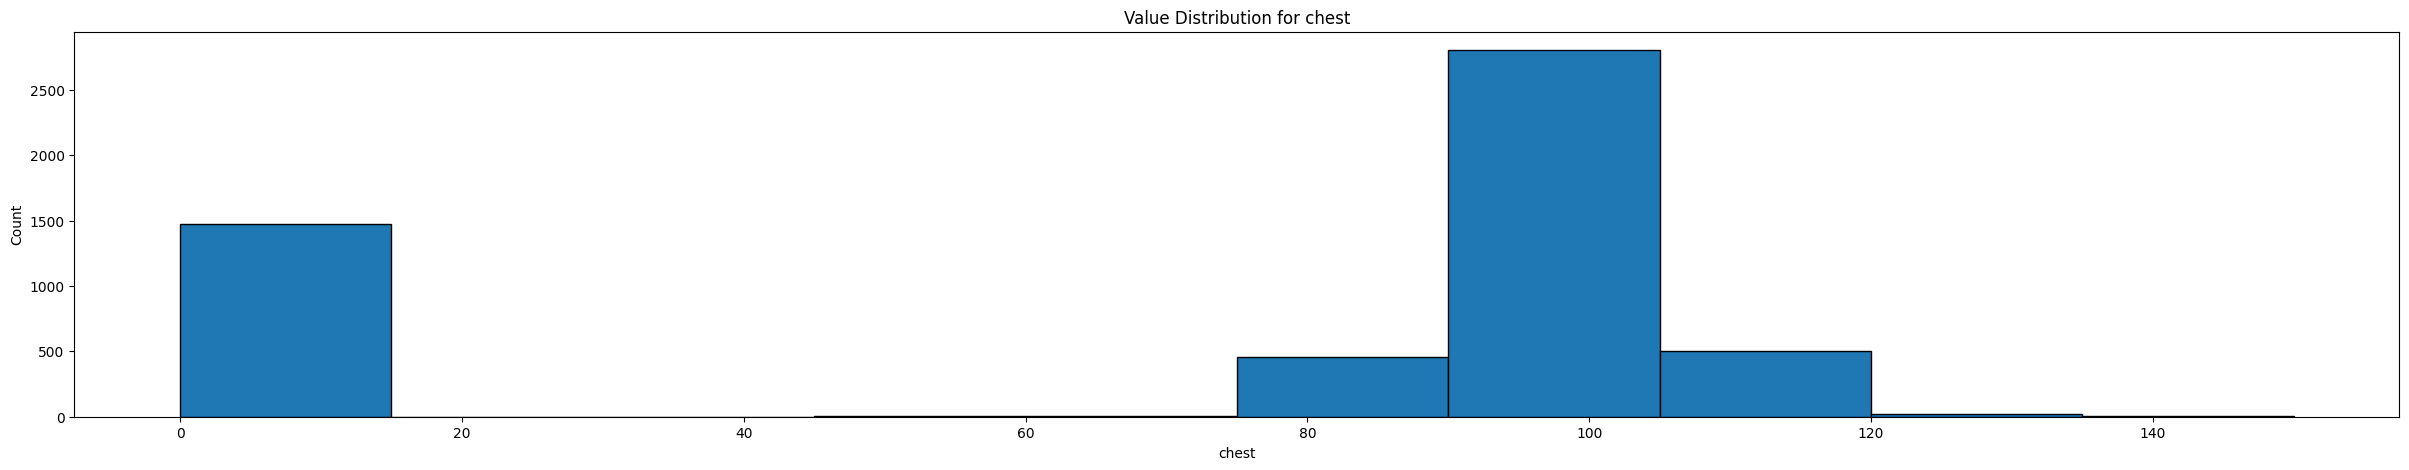

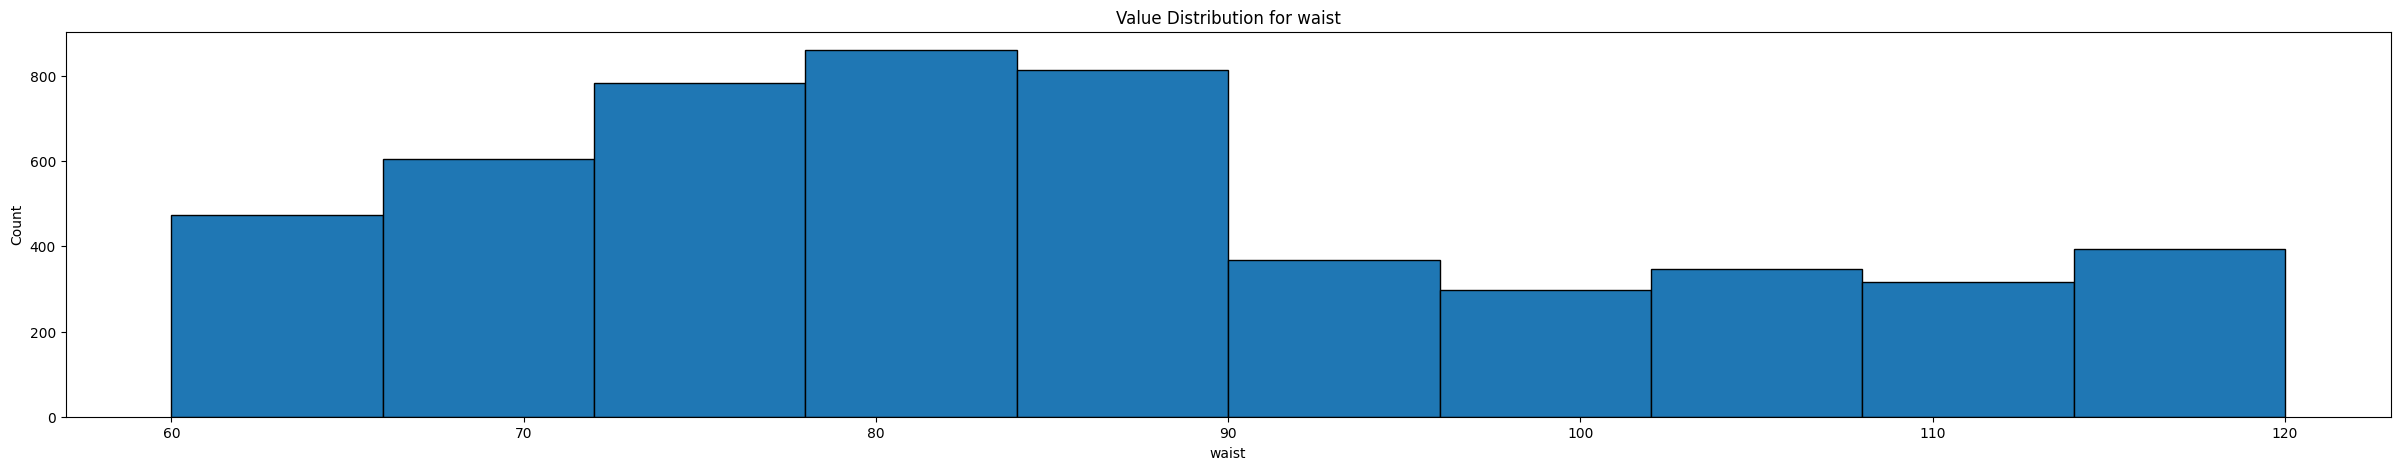

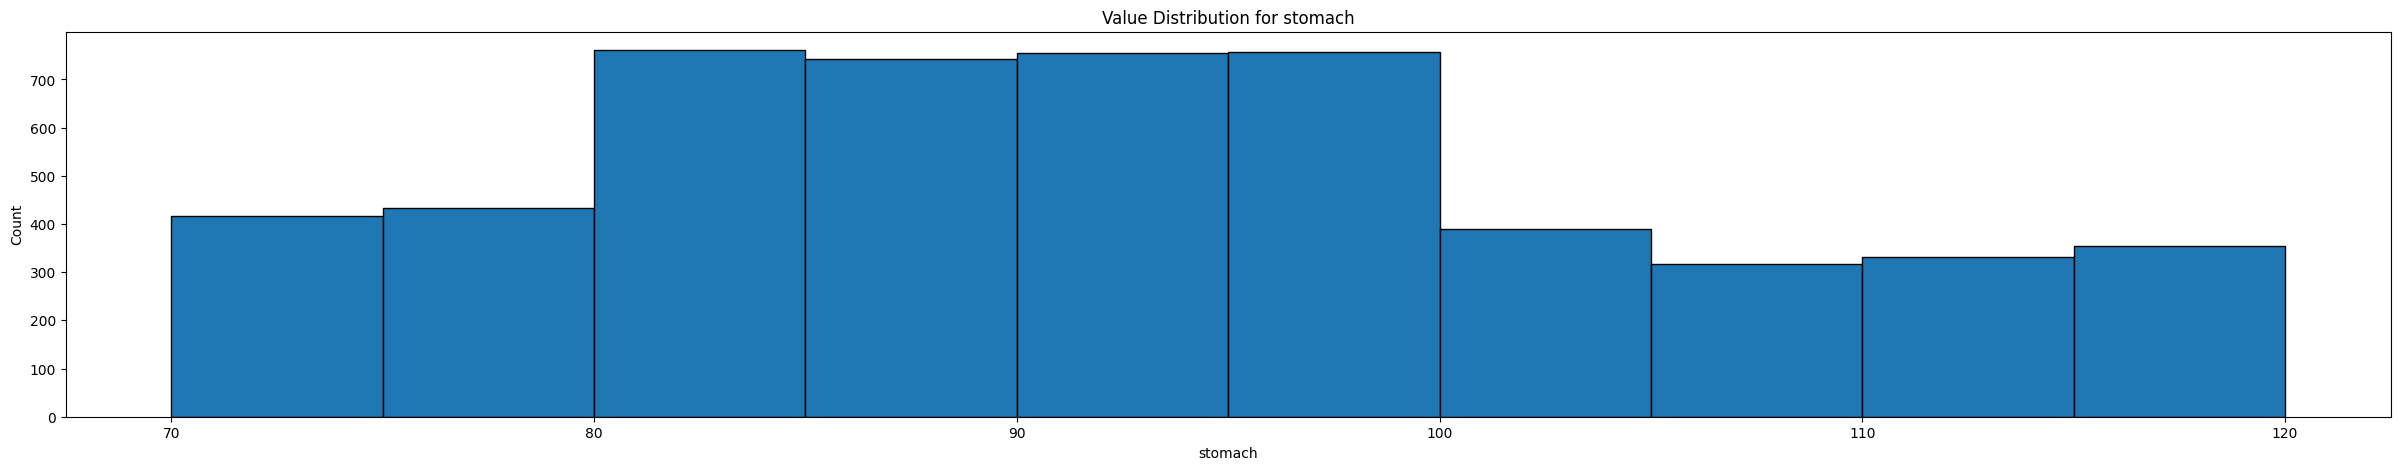

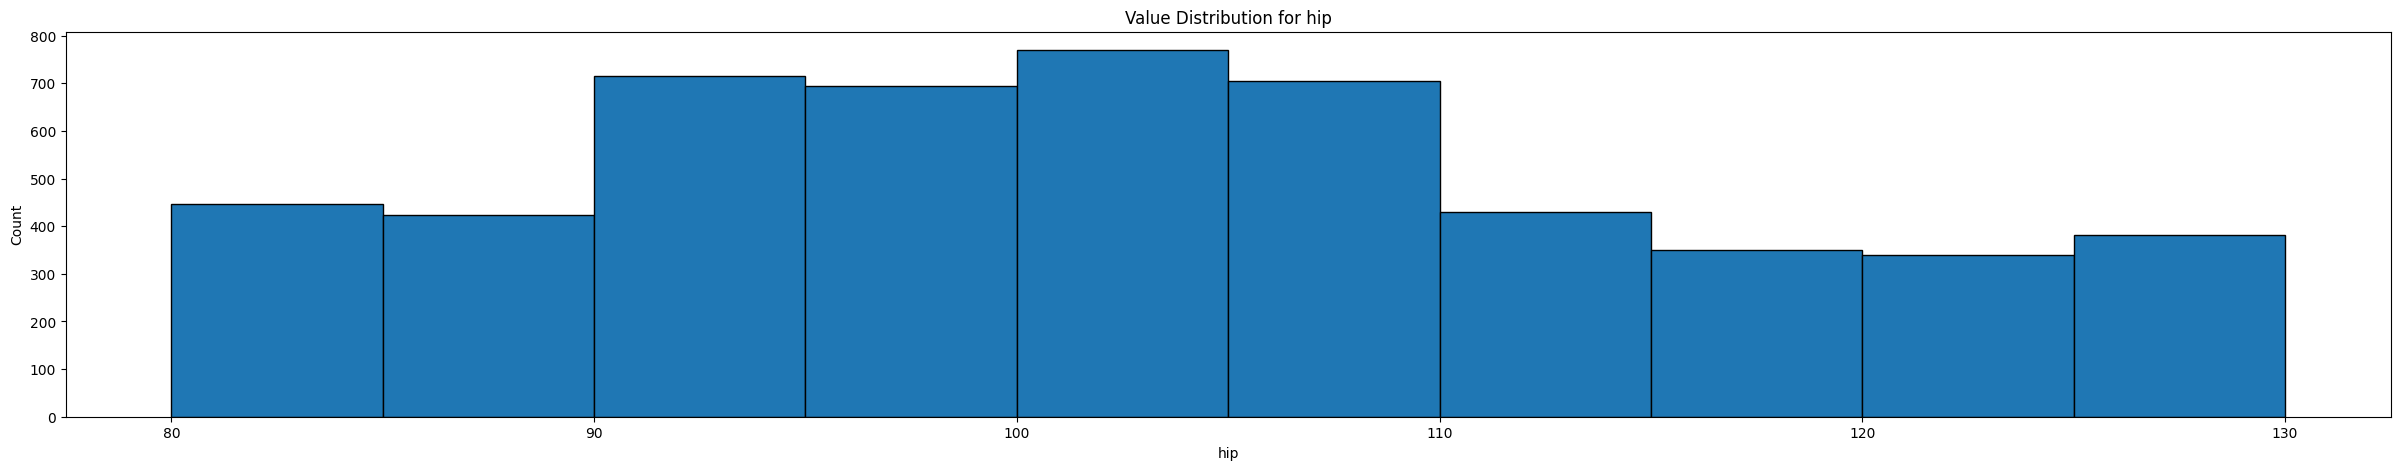

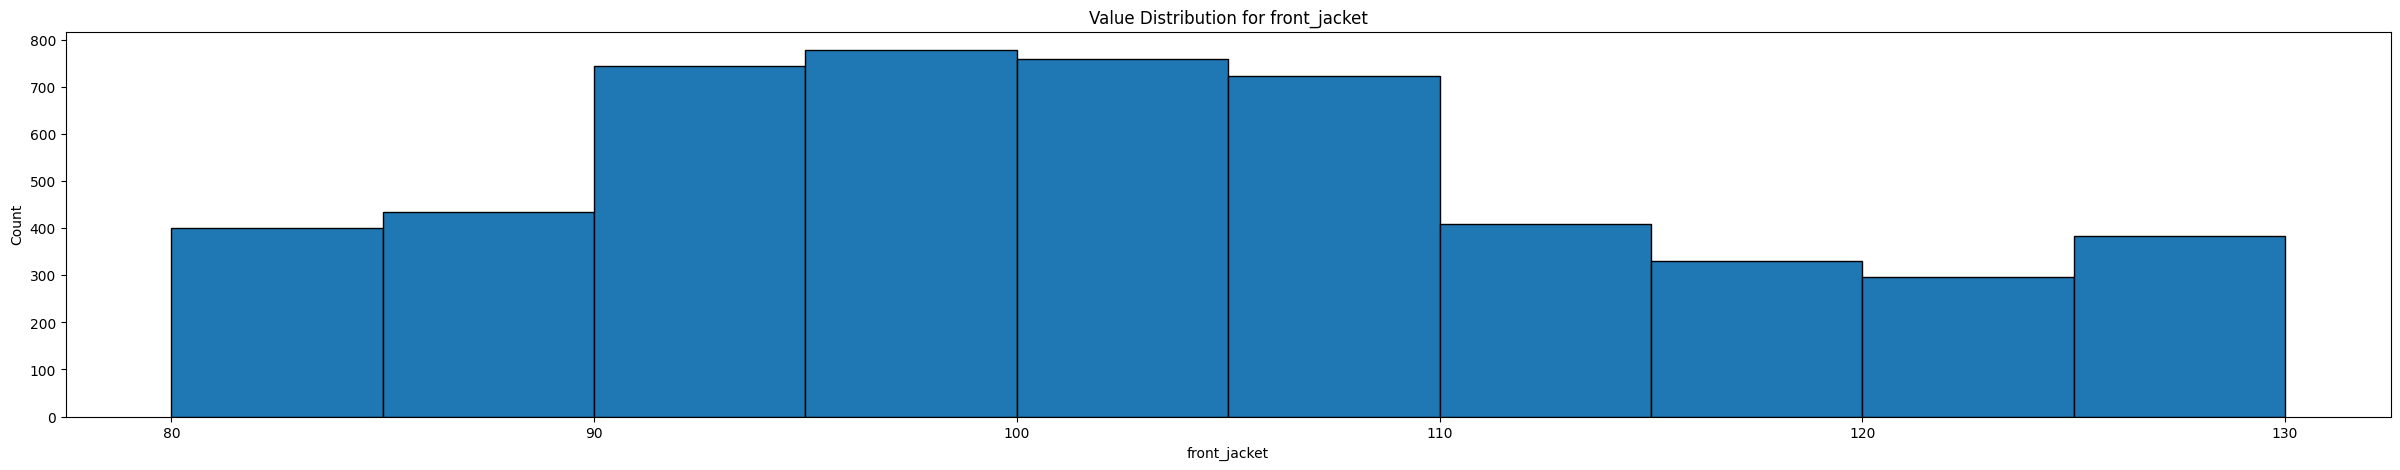

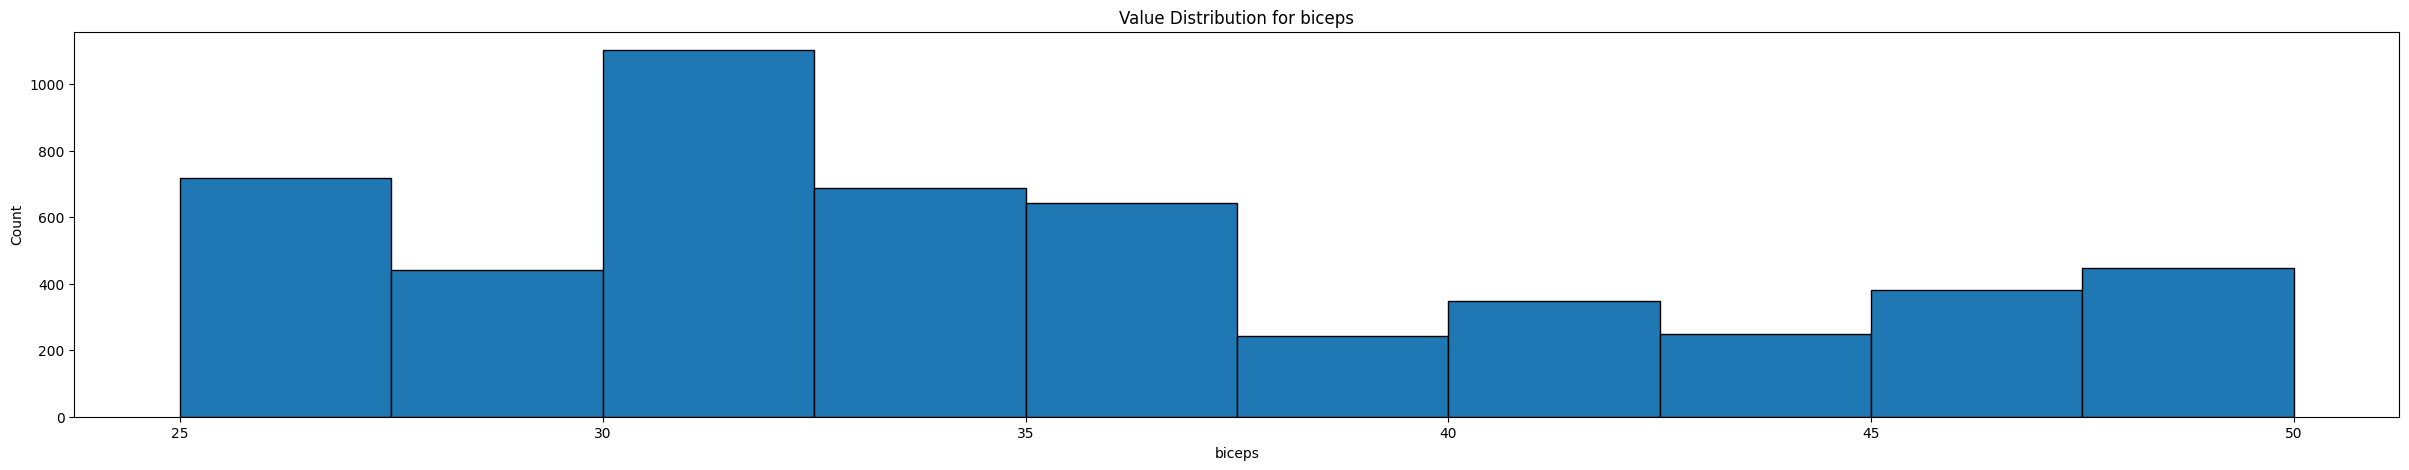

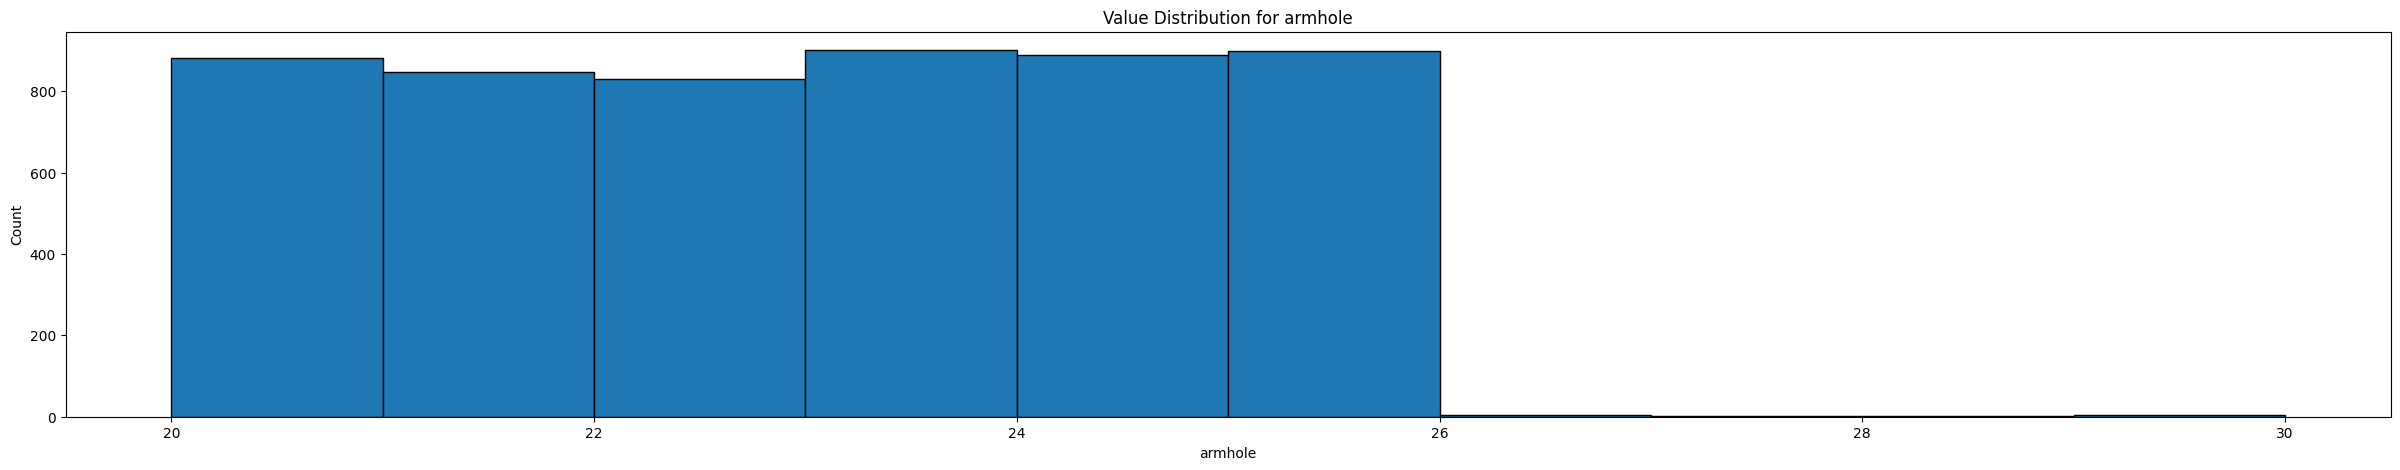

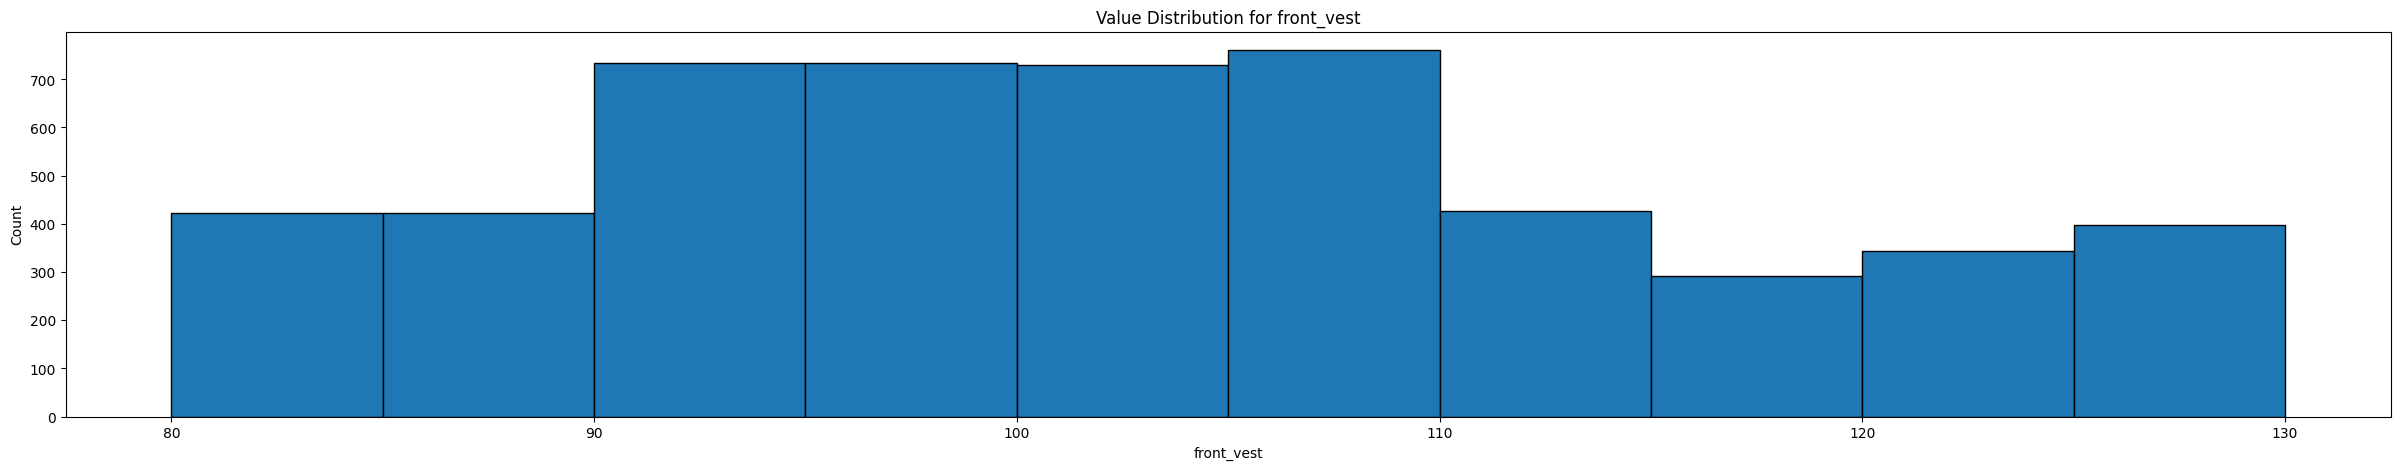

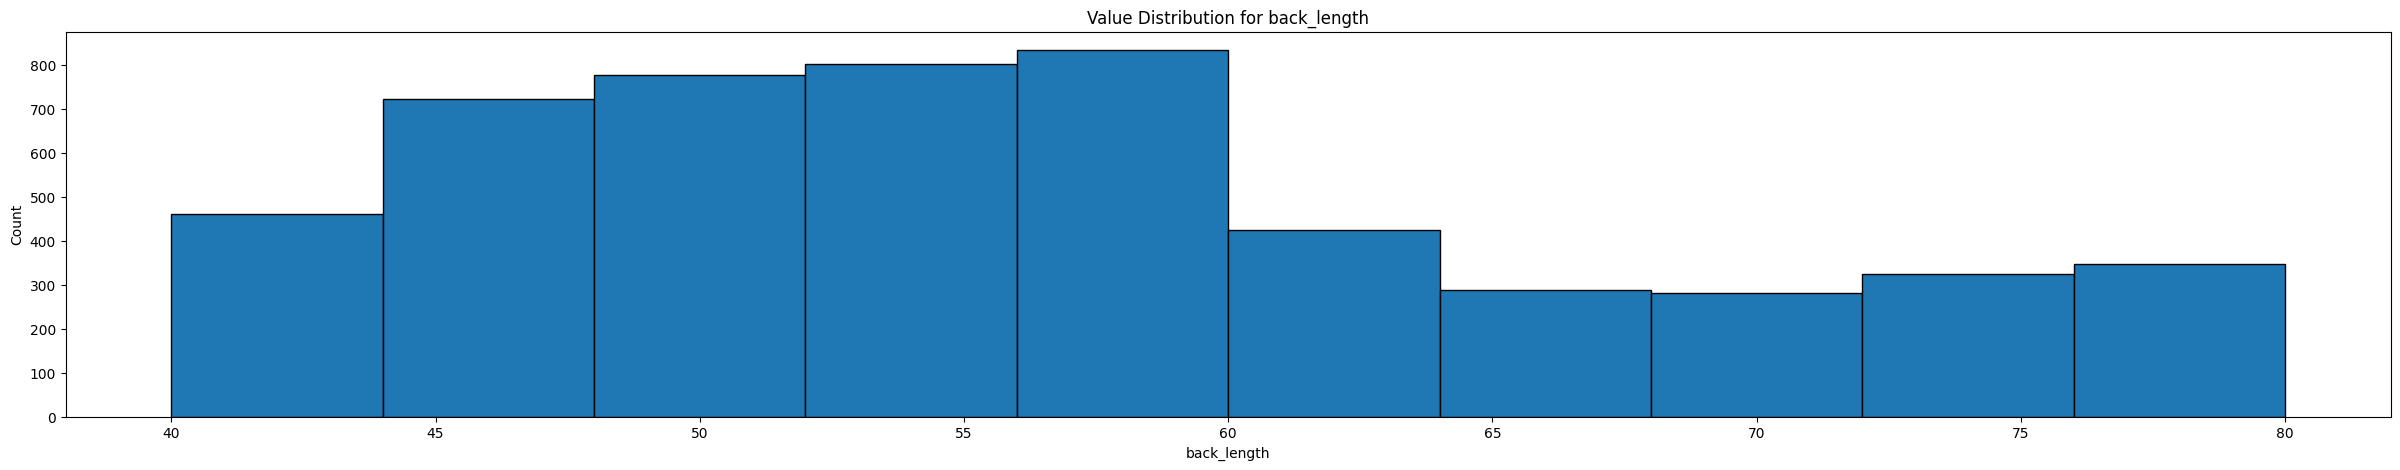

In [5]:
labels = output_columns

# Vẽ histogram cho từng cột
for label in labels:
    fig, ax = plt.subplots(figsize=(30, 5))

    # Vẽ histogram
    ax.hist(df[label].dropna(), bins=10, edgecolor='k')
    ax.set_xlabel(label)
    ax.set_ylabel('Count')
    ax.set_title('Value Distribution for ' + label)

    # Hiển thị biểu đồ
    plt.show()

PROCESSED DATA

In [6]:
df = pd.read_csv(Path(r"..\data\processed\dataset_measure.csv").resolve())

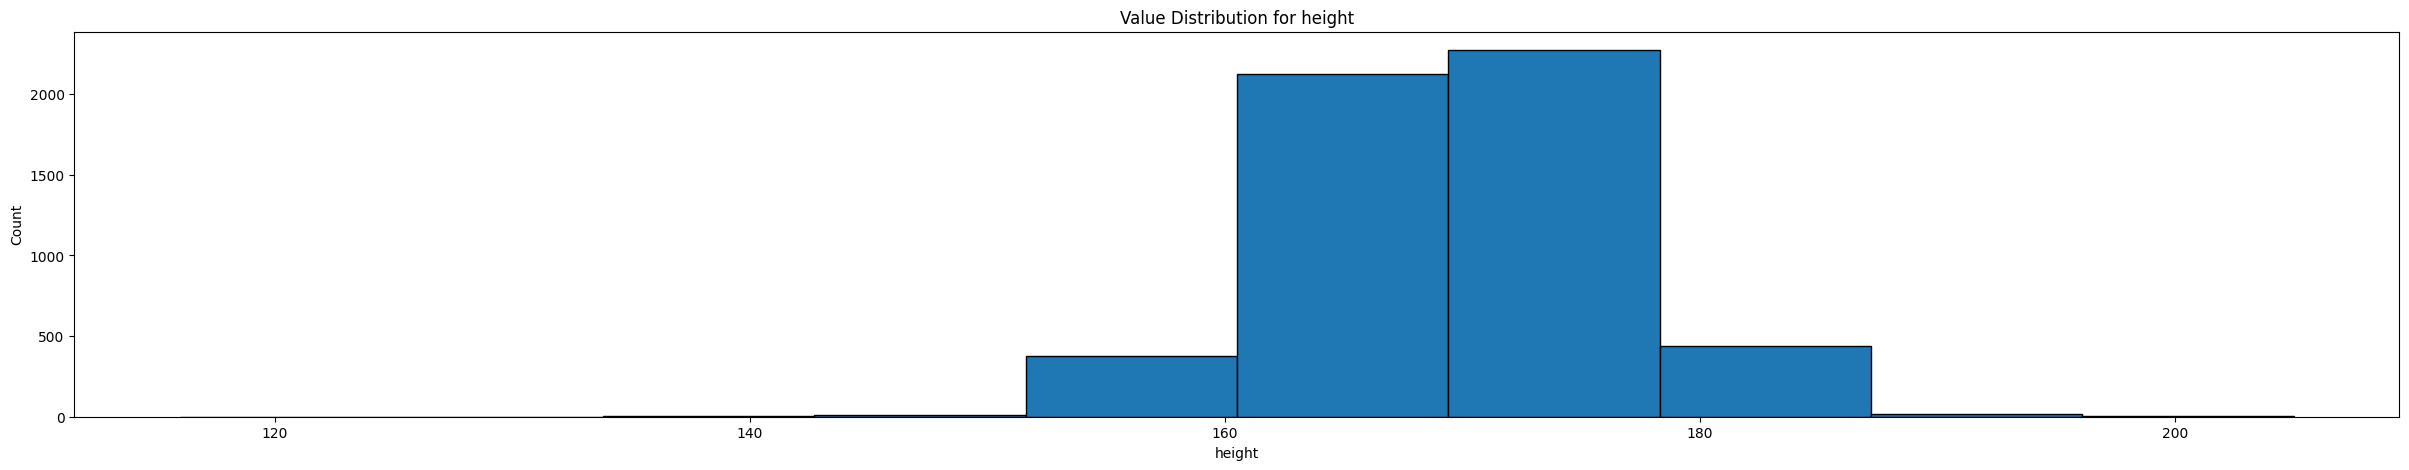

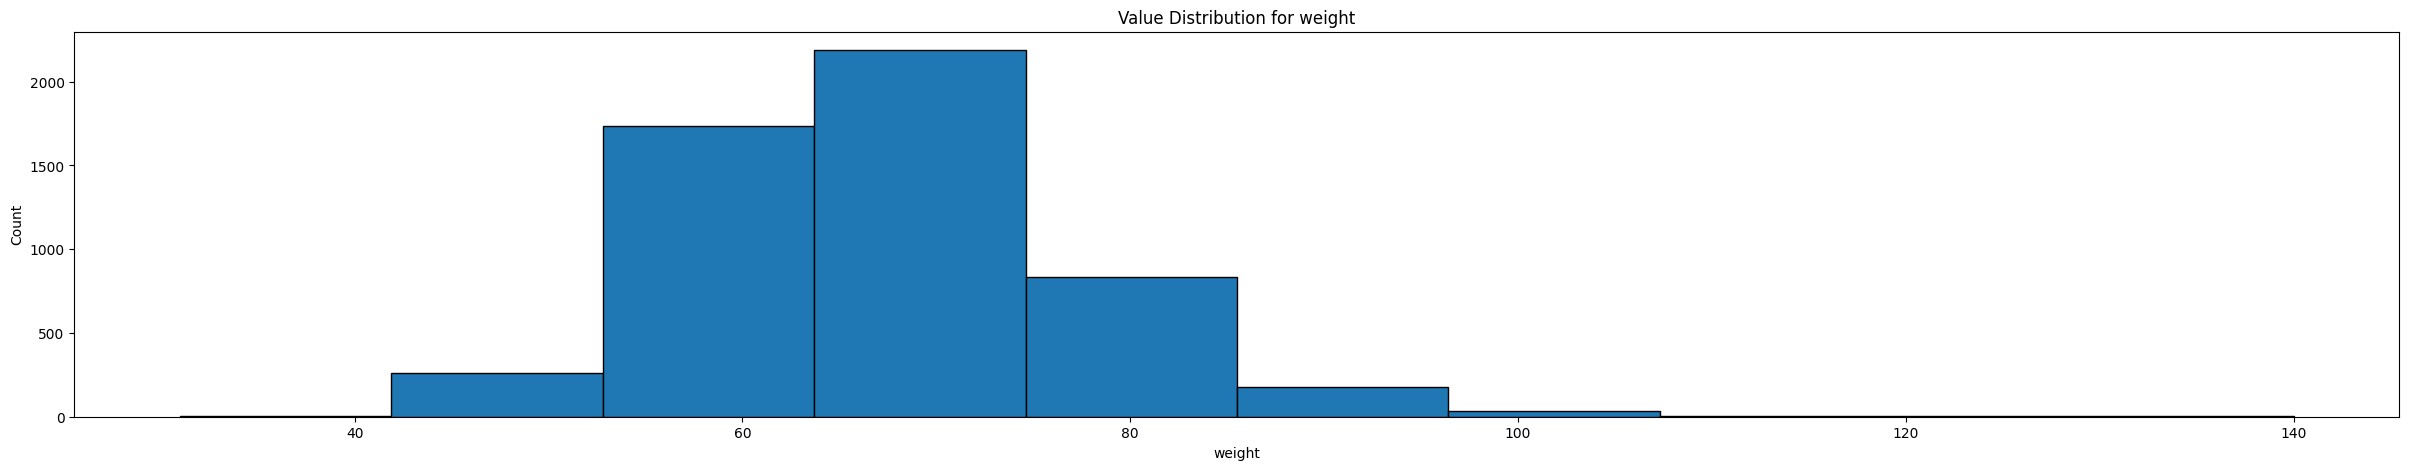

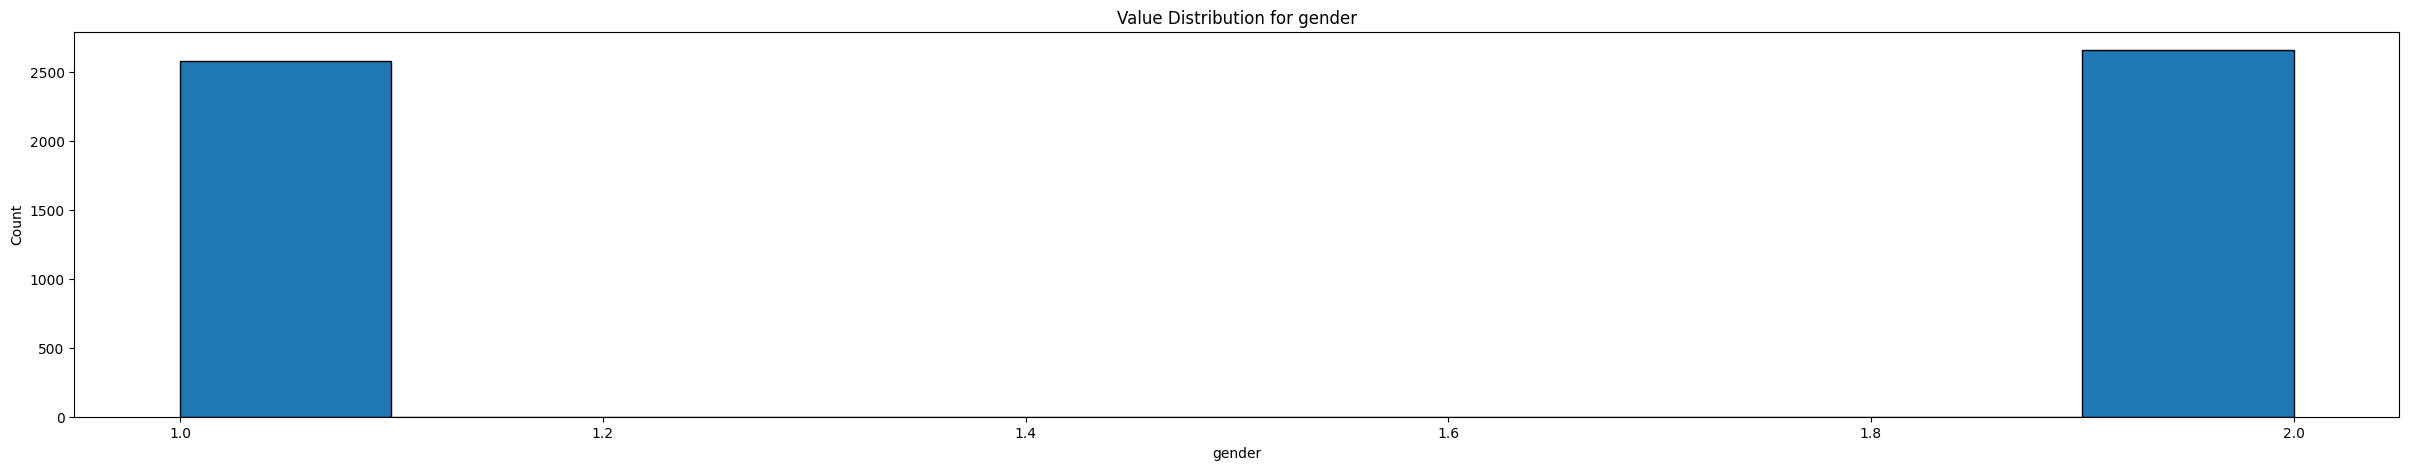

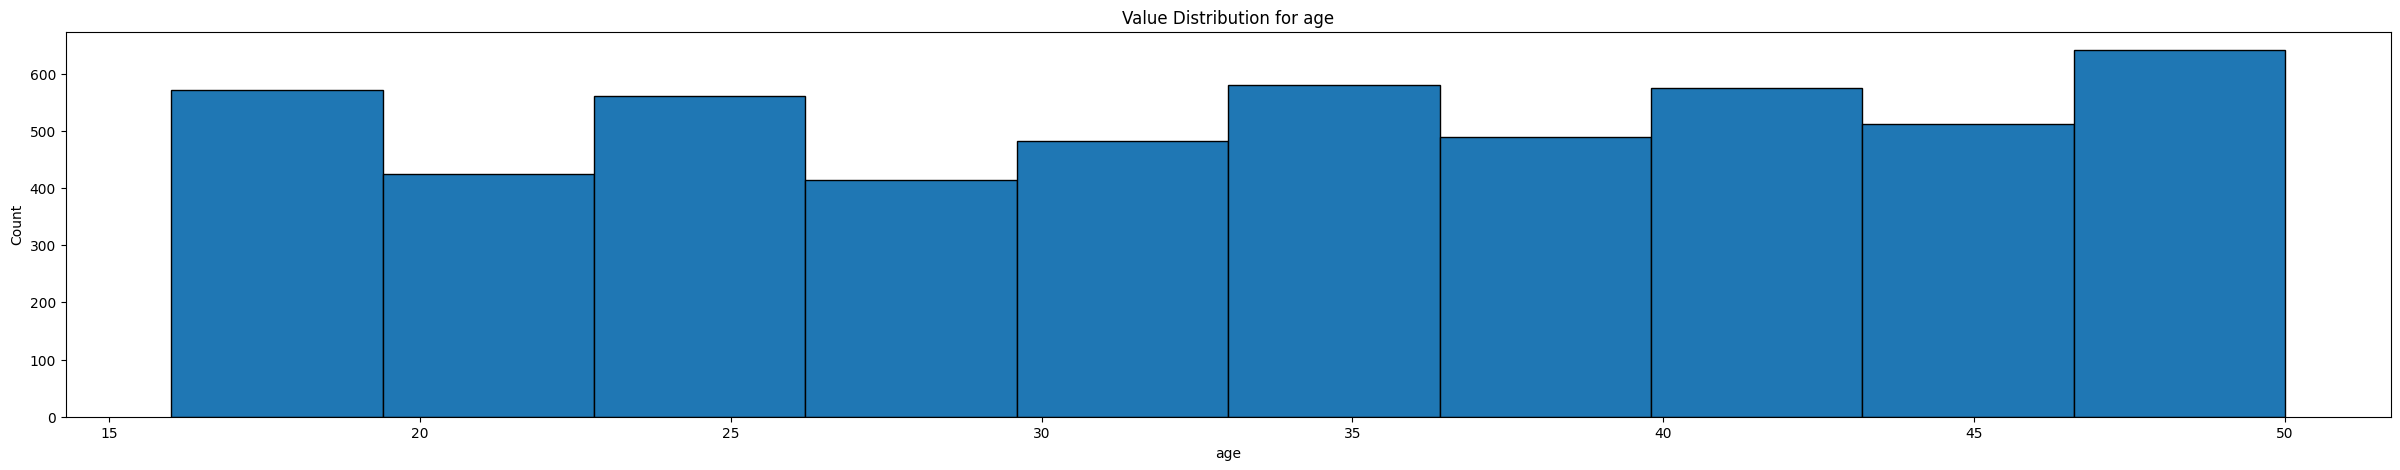

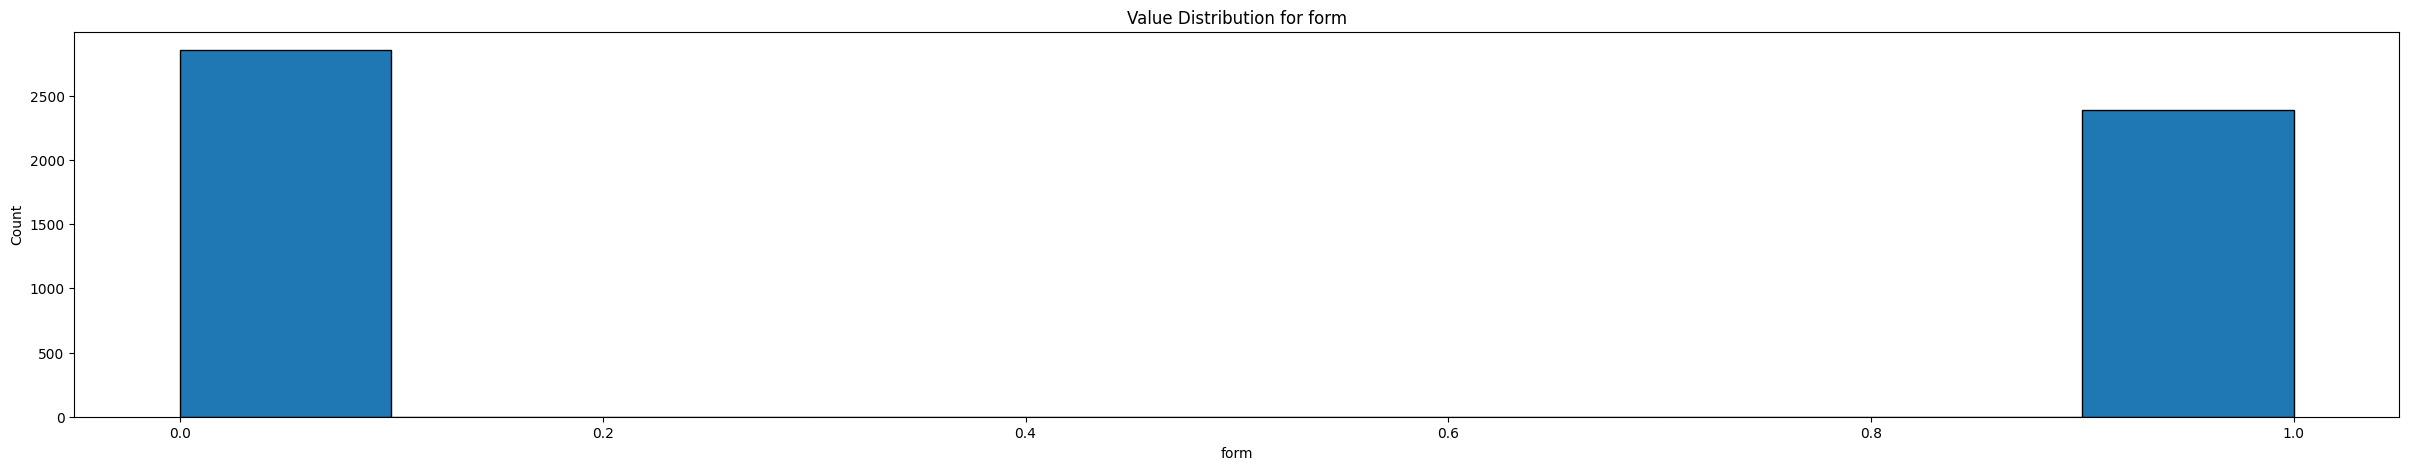

In [7]:
labels = input_columns

# Vẽ histogram cho từng cột
for label in labels:
    fig, ax = plt.subplots(figsize=(30, 5))

    # Vẽ histogram
    ax.hist(df[label].dropna(), bins=10, edgecolor='k')
    ax.set_xlabel(label)
    ax.set_ylabel('Count')
    ax.set_title('Value Distribution for ' + label)

    # Hiển thị biểu đồ
    plt.show()

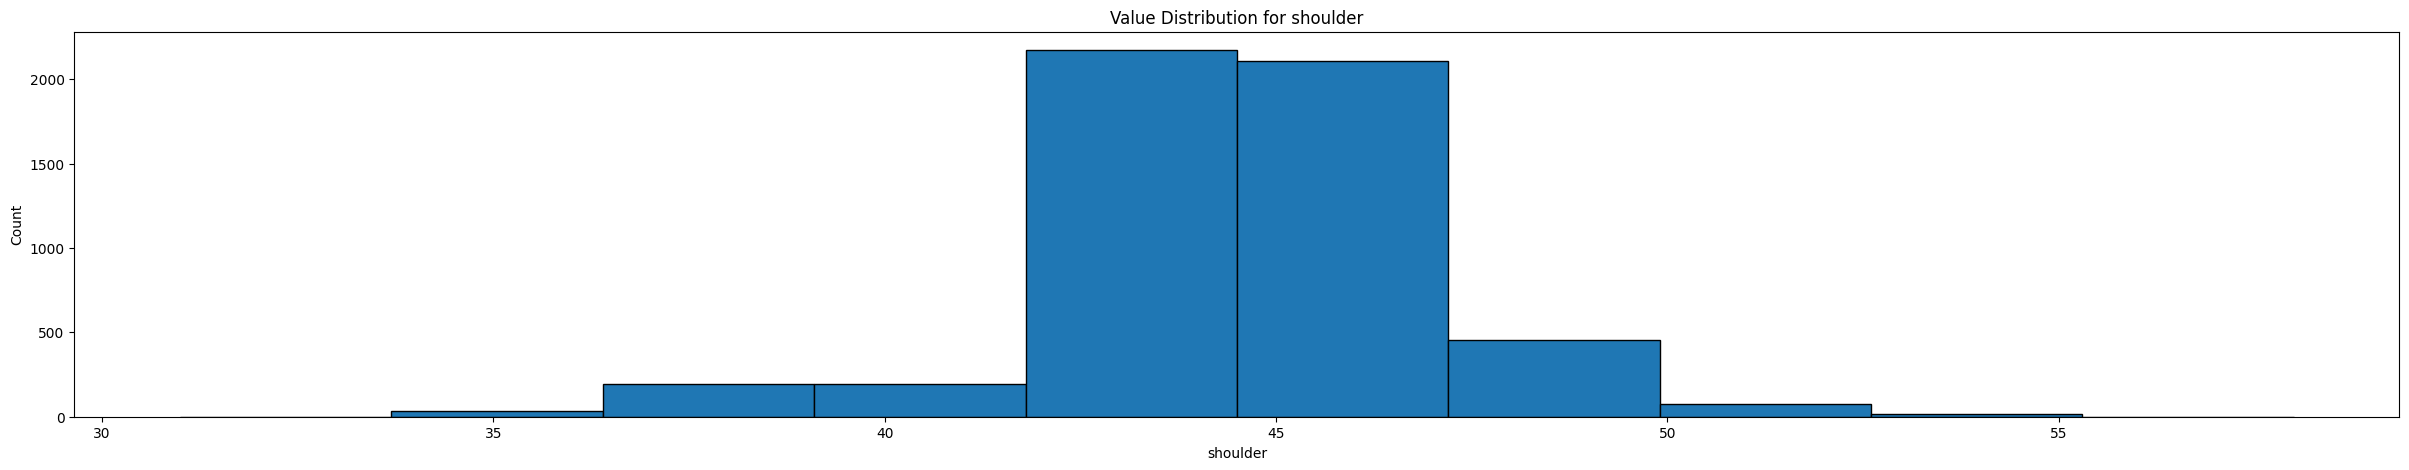

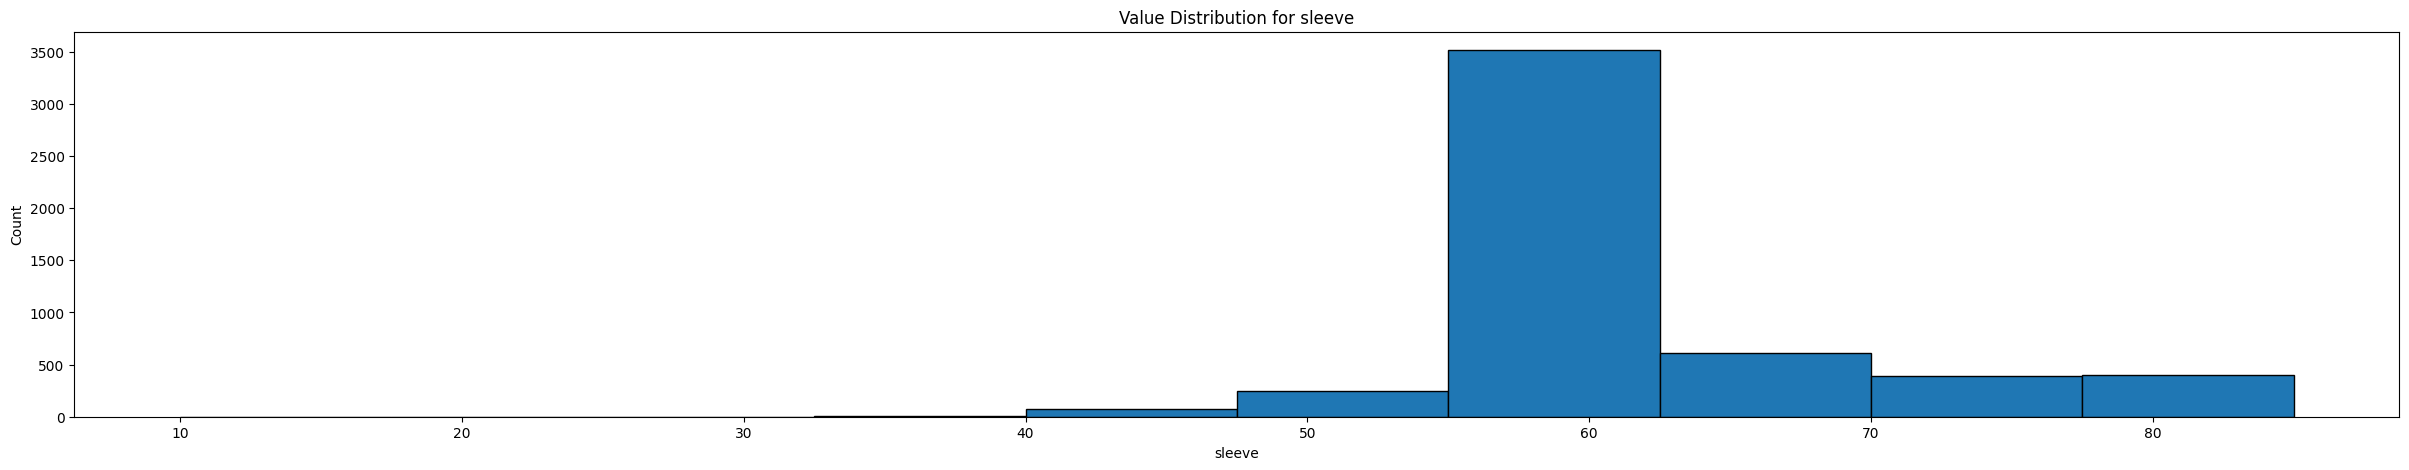

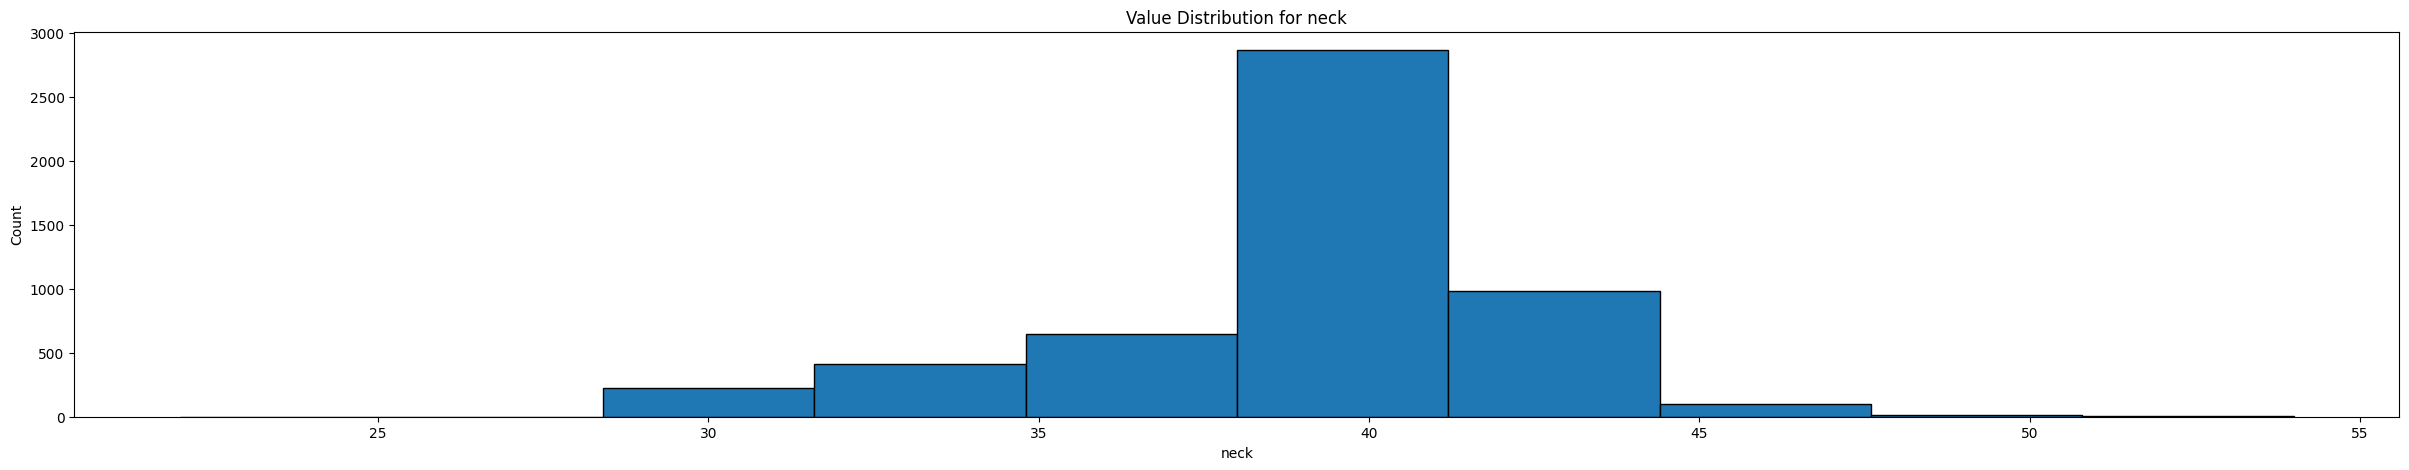

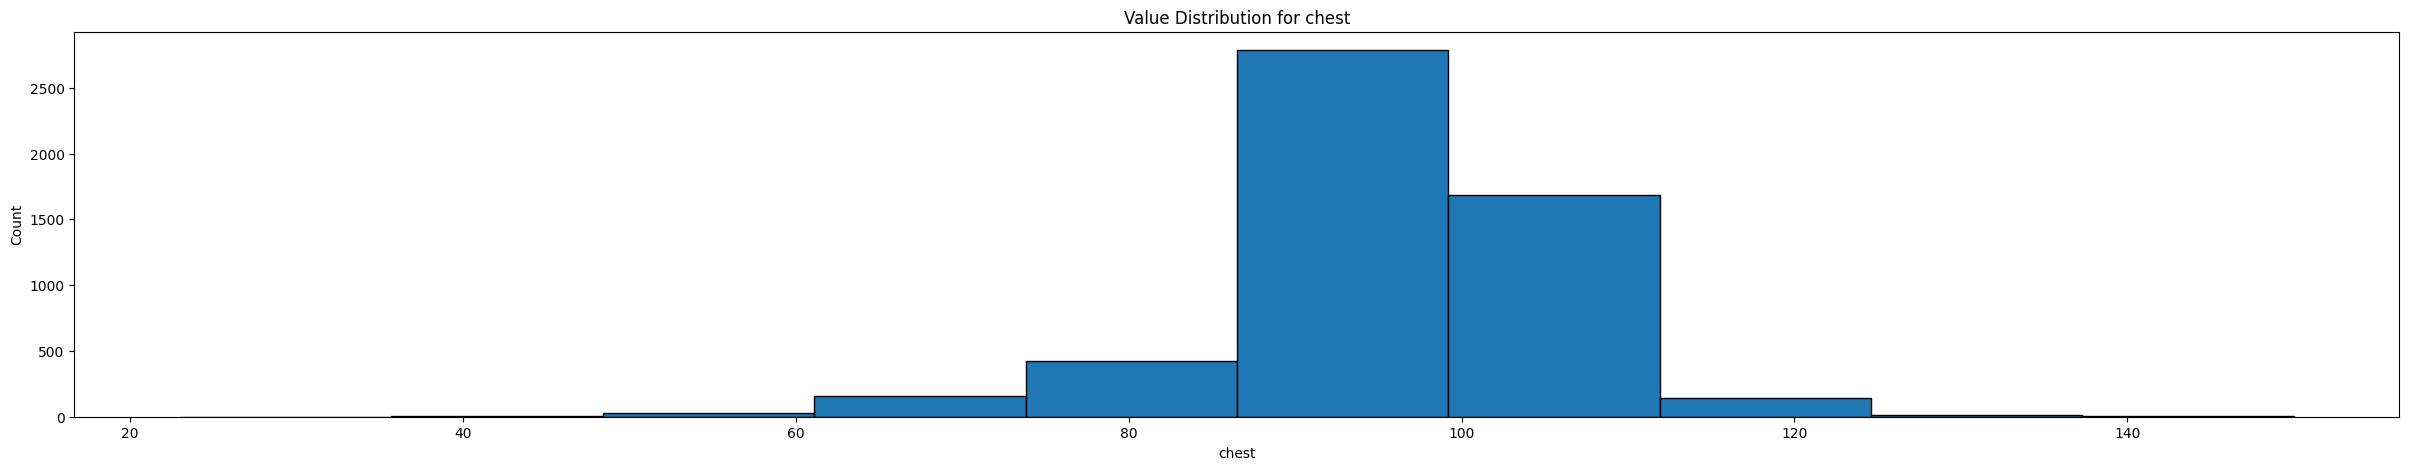

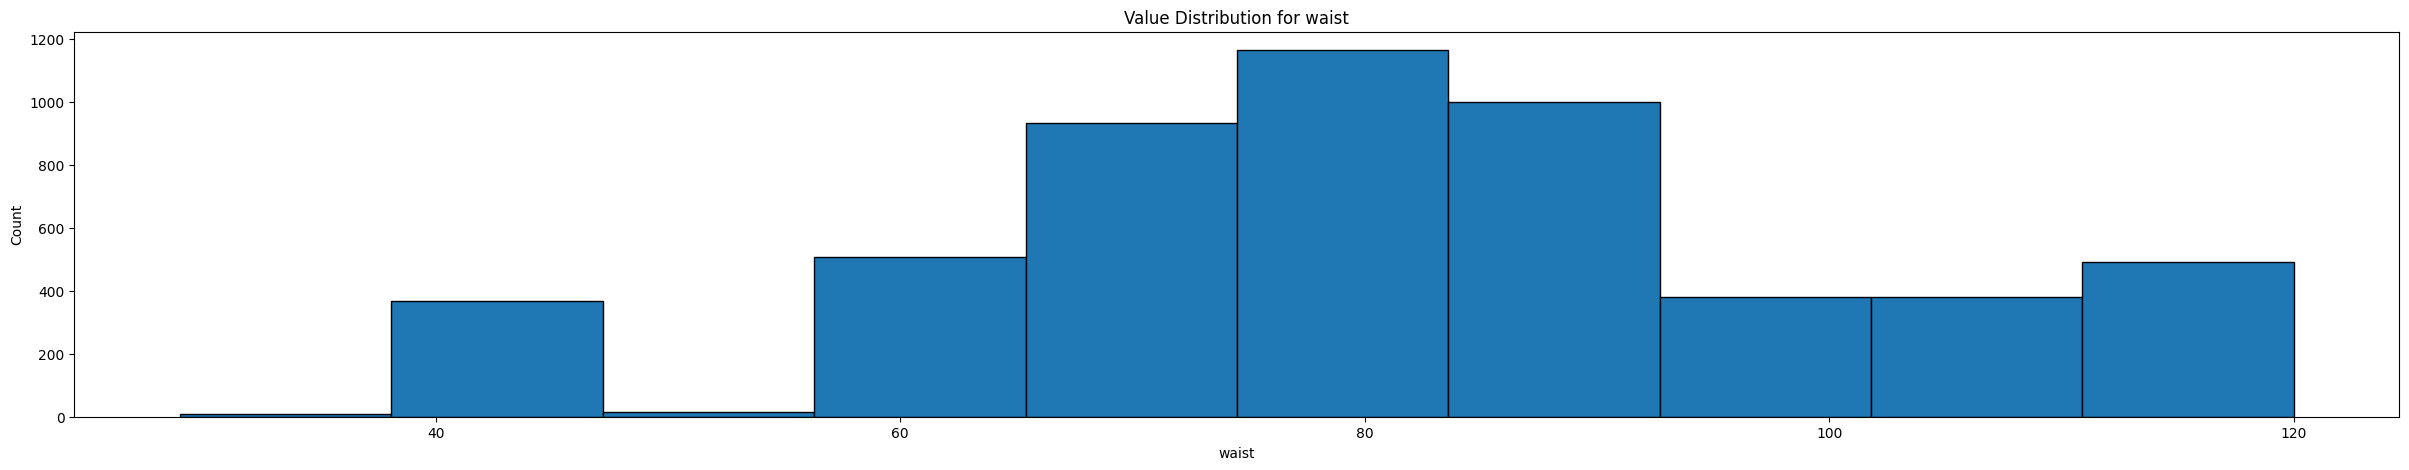

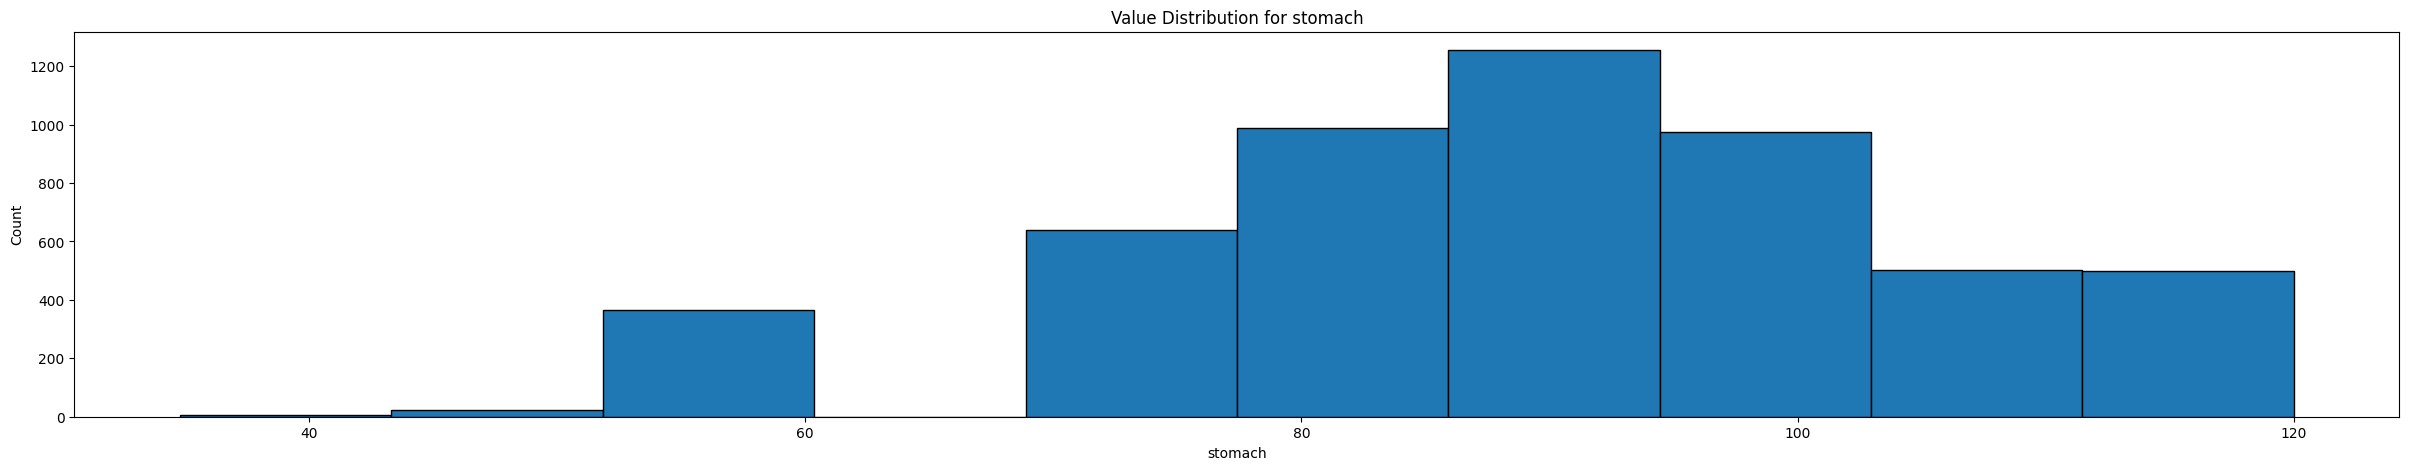

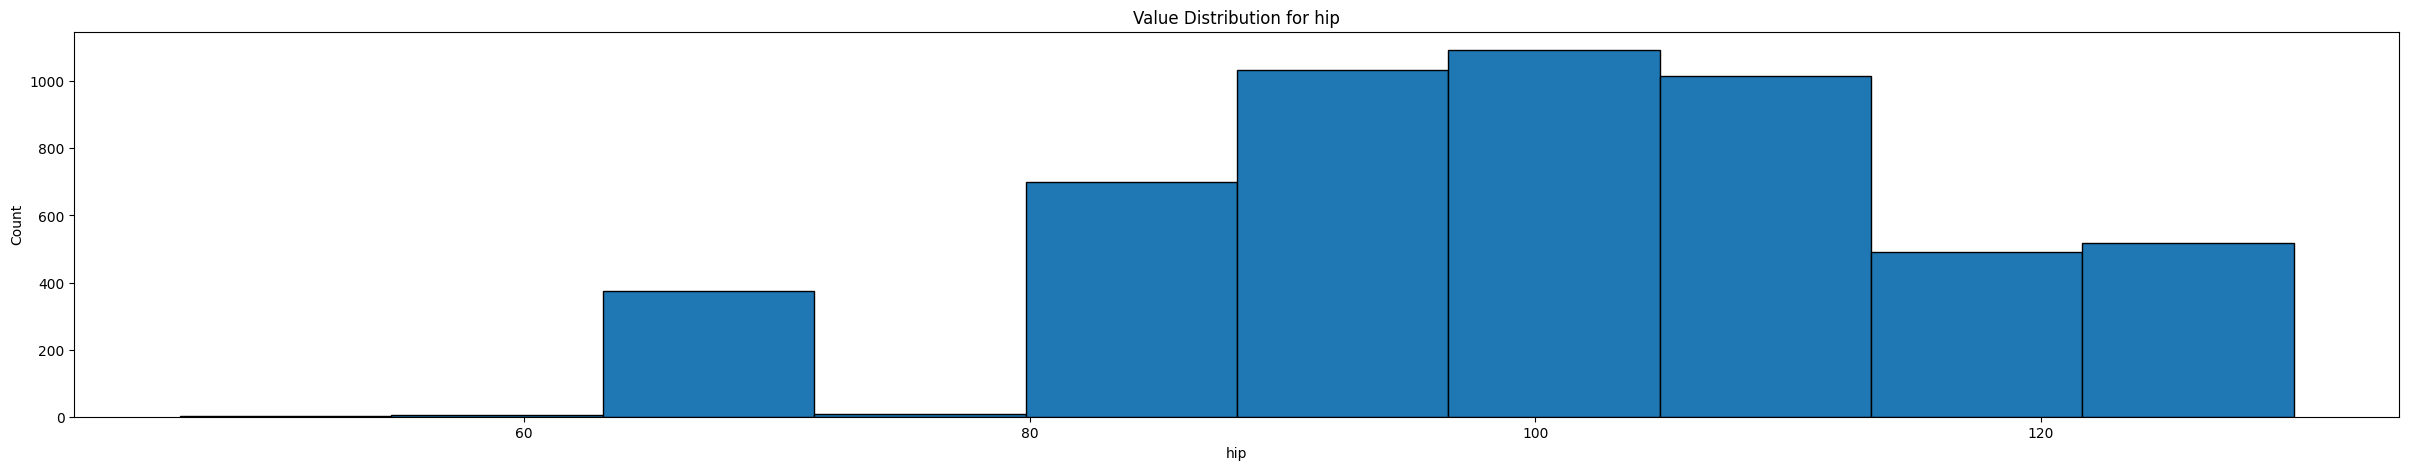

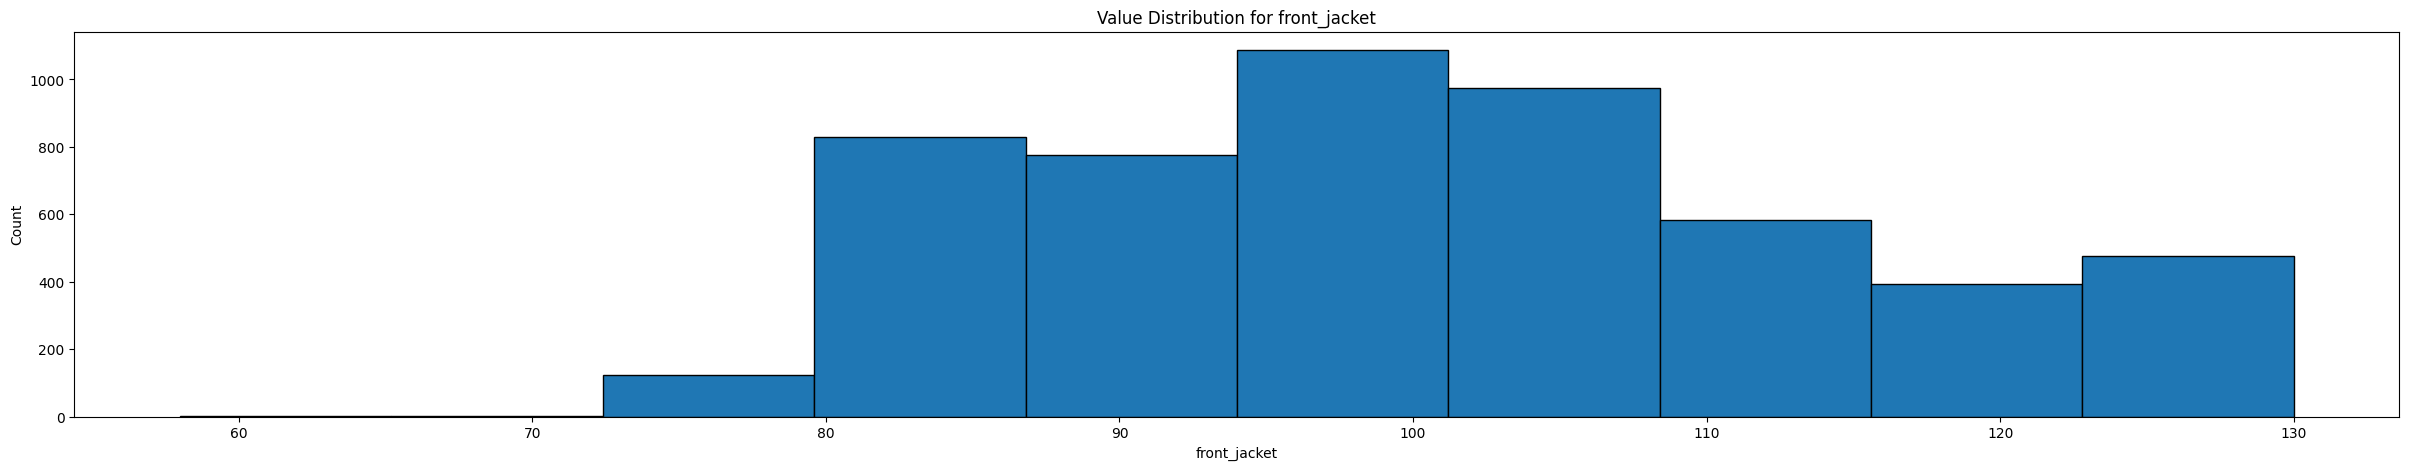

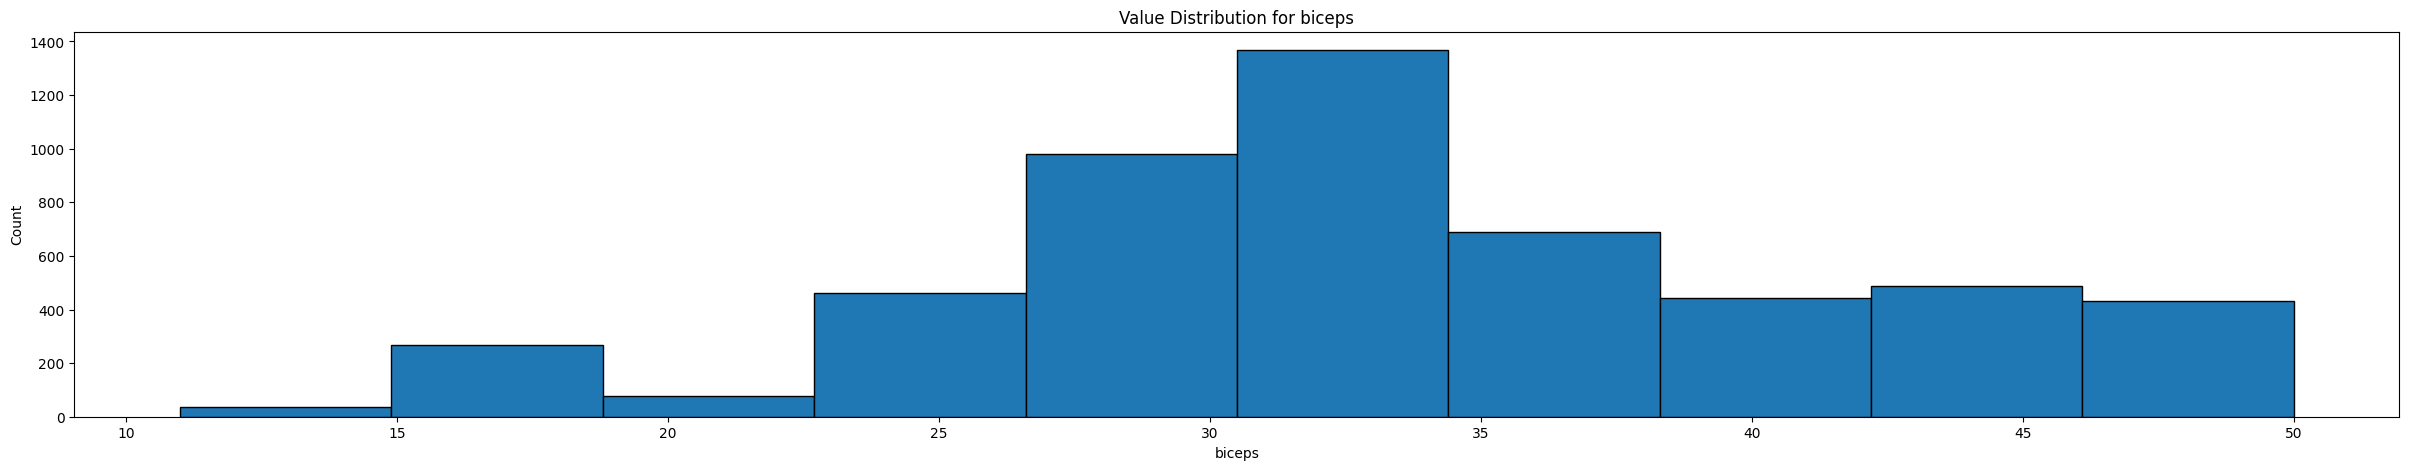

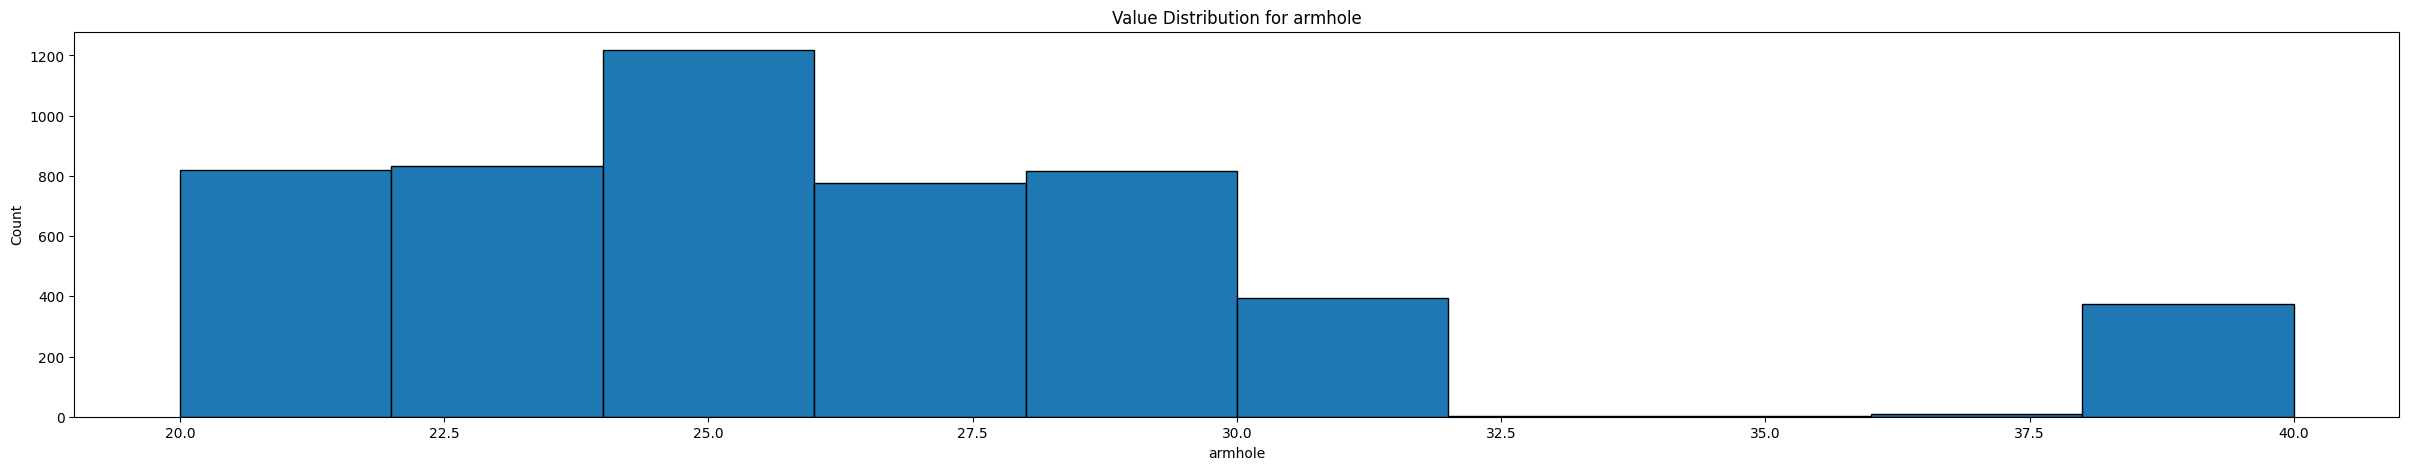

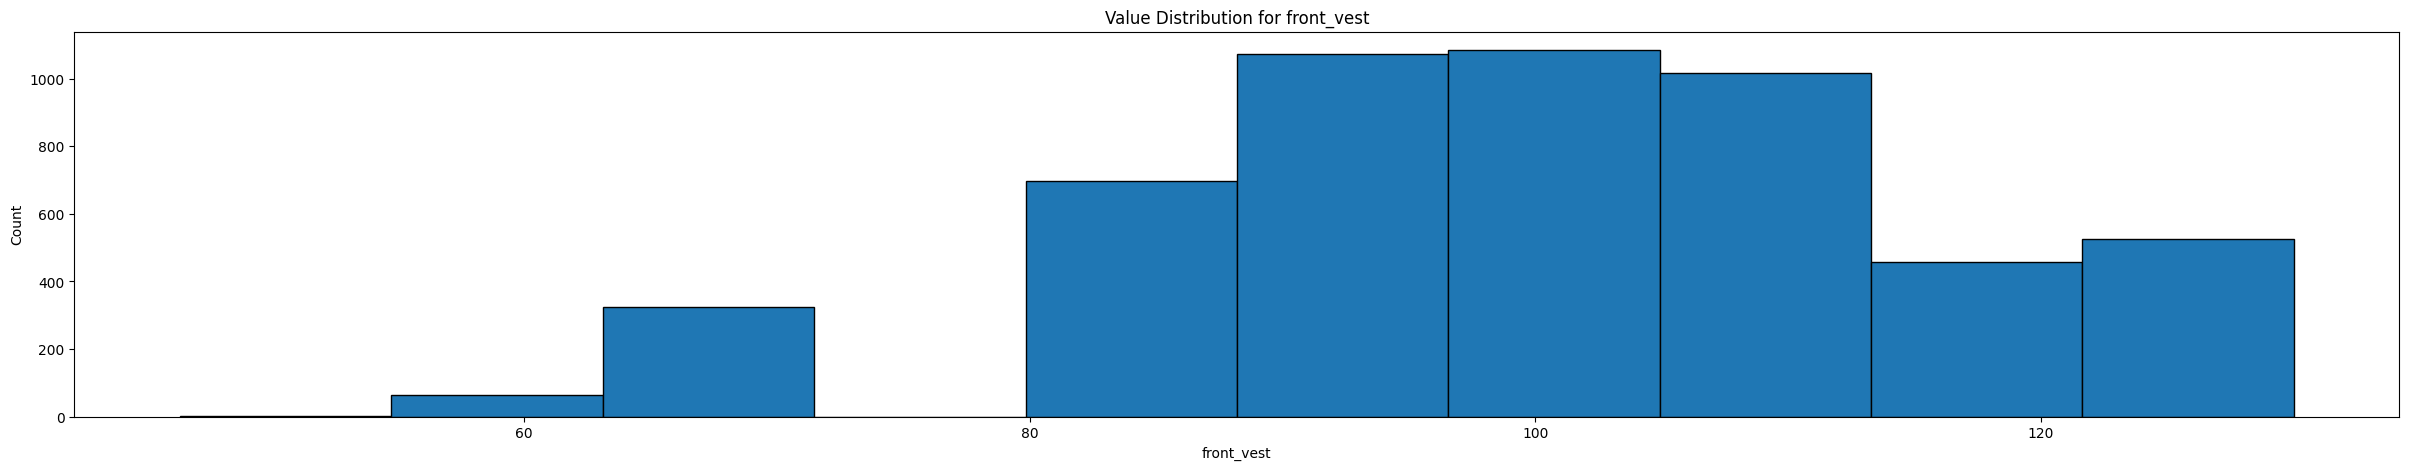

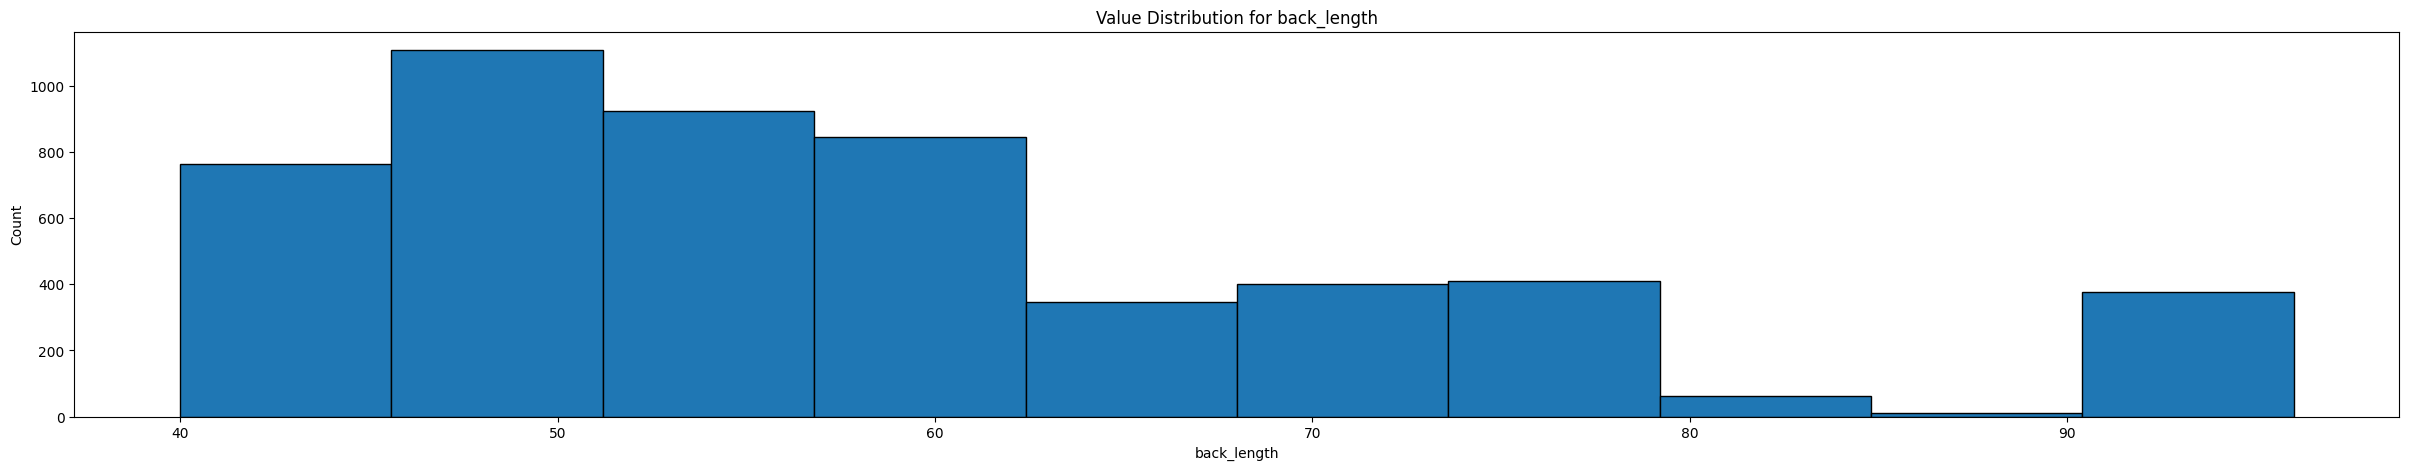

In [8]:
labels = output_columns

# Vẽ histogram cho từng cột
for label in labels:
    fig, ax = plt.subplots(figsize=(30, 5))

    # Vẽ histogram
    ax.hist(df[label].dropna(), bins=10, edgecolor='k')
    ax.set_xlabel(label)
    ax.set_ylabel('Count')
    ax.set_title('Value Distribution for ' + label)

    # Hiển thị biểu đồ
    plt.show()

EVALUATION

In [9]:
metrics = pd.read_csv(Path(r"..\results\metrics\metric.csv").resolve())

In [10]:
metrics

,Input,Output,MAE,MSE,RMSE,R2
0,"height, weight, gender, age, form, shoulder","sleeve, neck, chest, waist, stomach, hip, fron...",7.381990,105.420028,10.267426,0.884574
1,"height, weight, gender, age, form, shoulder, s...","neck, chest, waist, stomach, hip, front_jacket...",7.375935,101.279340,10.063764,0.897442
2,"height, weight, gender, age, form, shoulder, s...","chest, waist, stomach, hip, front_jacket, bice...",7.976100,111.730872,10.570282,0.883107
3,"height, weight, gender, age, form, shoulder, s...","waist, stomach, hip, front_jacket, biceps, arm...",8.366776,118.918523,10.904977,0.882100
4,"height, weight, gender, age, form, shoulder, s...","stomach, hip, front_jacket, biceps, armhole, f...",7.238365,88.616773,9.413648,0.918963
5,"height, weight, gender, age, form, shoulder, s...","hip, front_jacket, biceps, armhole, front_vest...",6.714899,78.090156,8.836863,0.933633
6,"height, weight, gender, age, form, shoulder, s...","front_jacket, biceps, armhole, front_vest, bac...",6.617355,77.239473,8.788599,0.933251
7,"height, weight, gender, age, form, shoulder, s...","biceps, armhole, front_vest, back_length",6.030670,67.437405,8.212028,0.931469
8,"height, weight, gender, age, form, shoulder, s...","armhole, front_vest, back_length",6.532040,78.924401,8.883941,0.927290
9,"height, weight, gender, age, form, shoulder, s...","front_vest, back_length",8.263527,100.952467,10.047510,0.844386


In [11]:
test = pd.read_csv(Path(r"..\results\dataframe\test.csv").resolve())
pred = pd.read_csv(Path(r"..\results\dataframe\pred.csv").resolve())

In [12]:
figure_path = Path(r"..\results\figures").resolve()

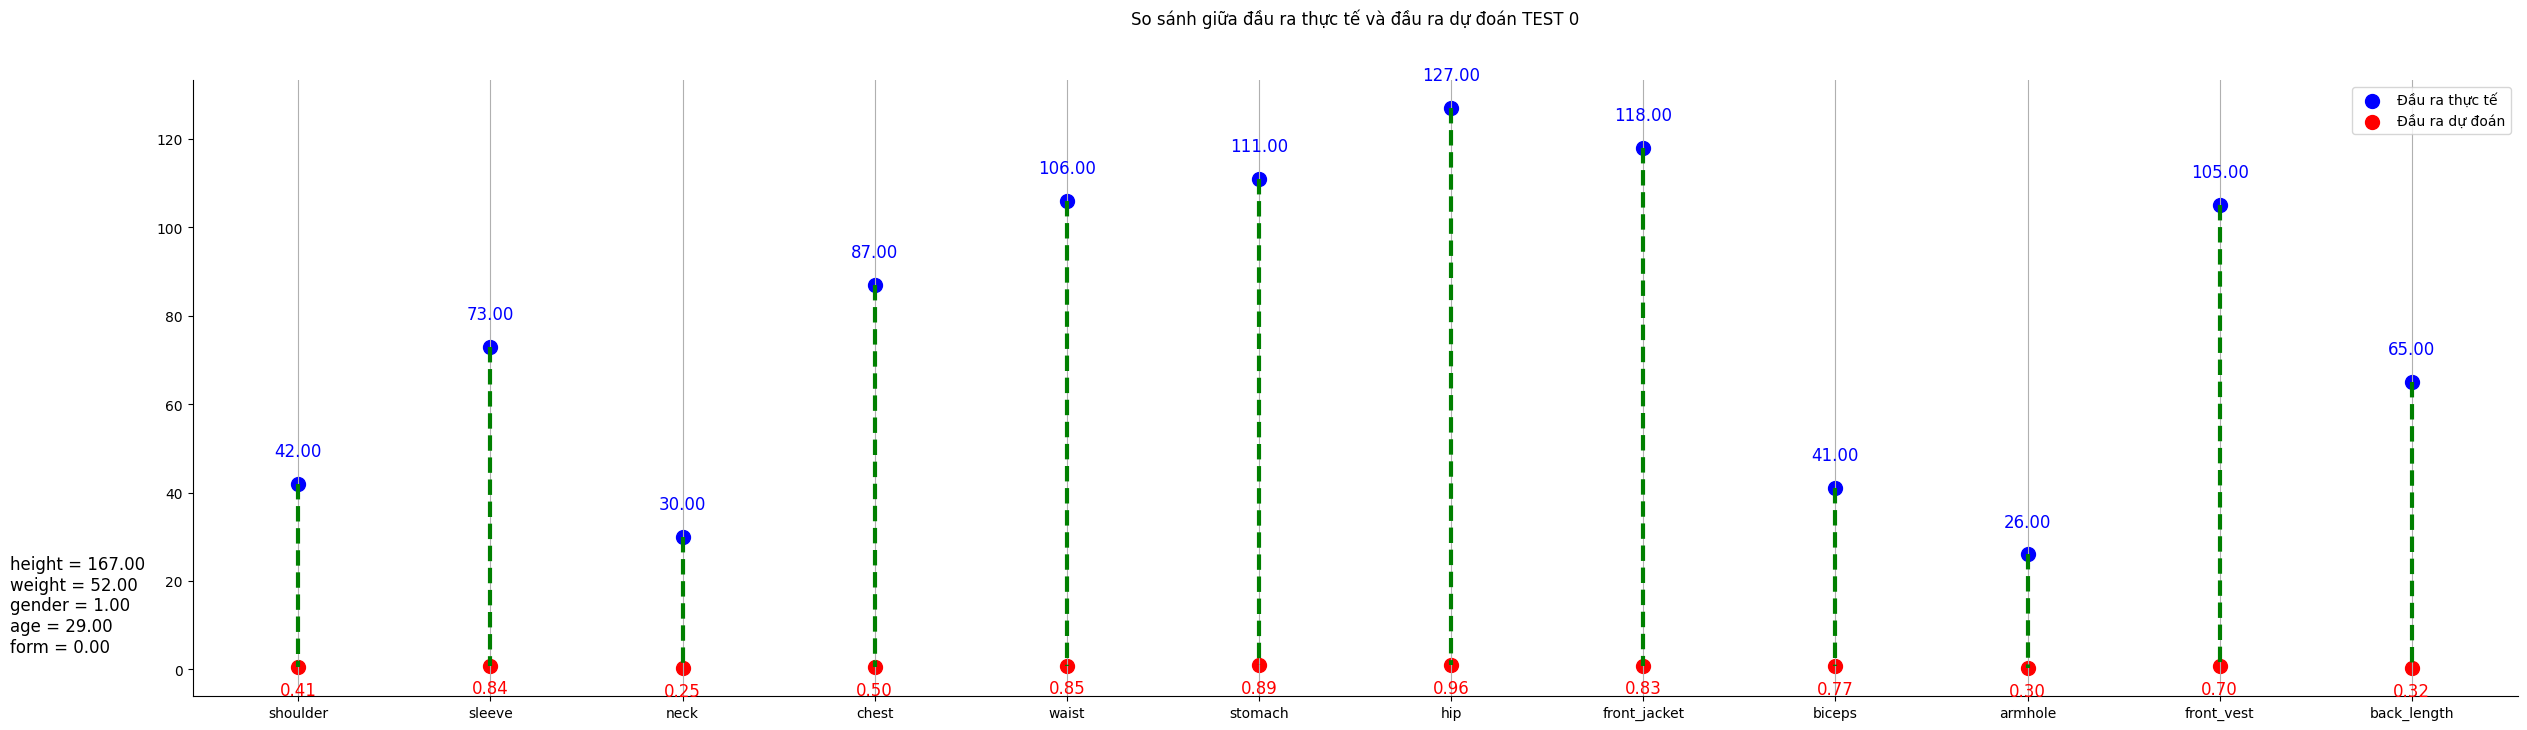

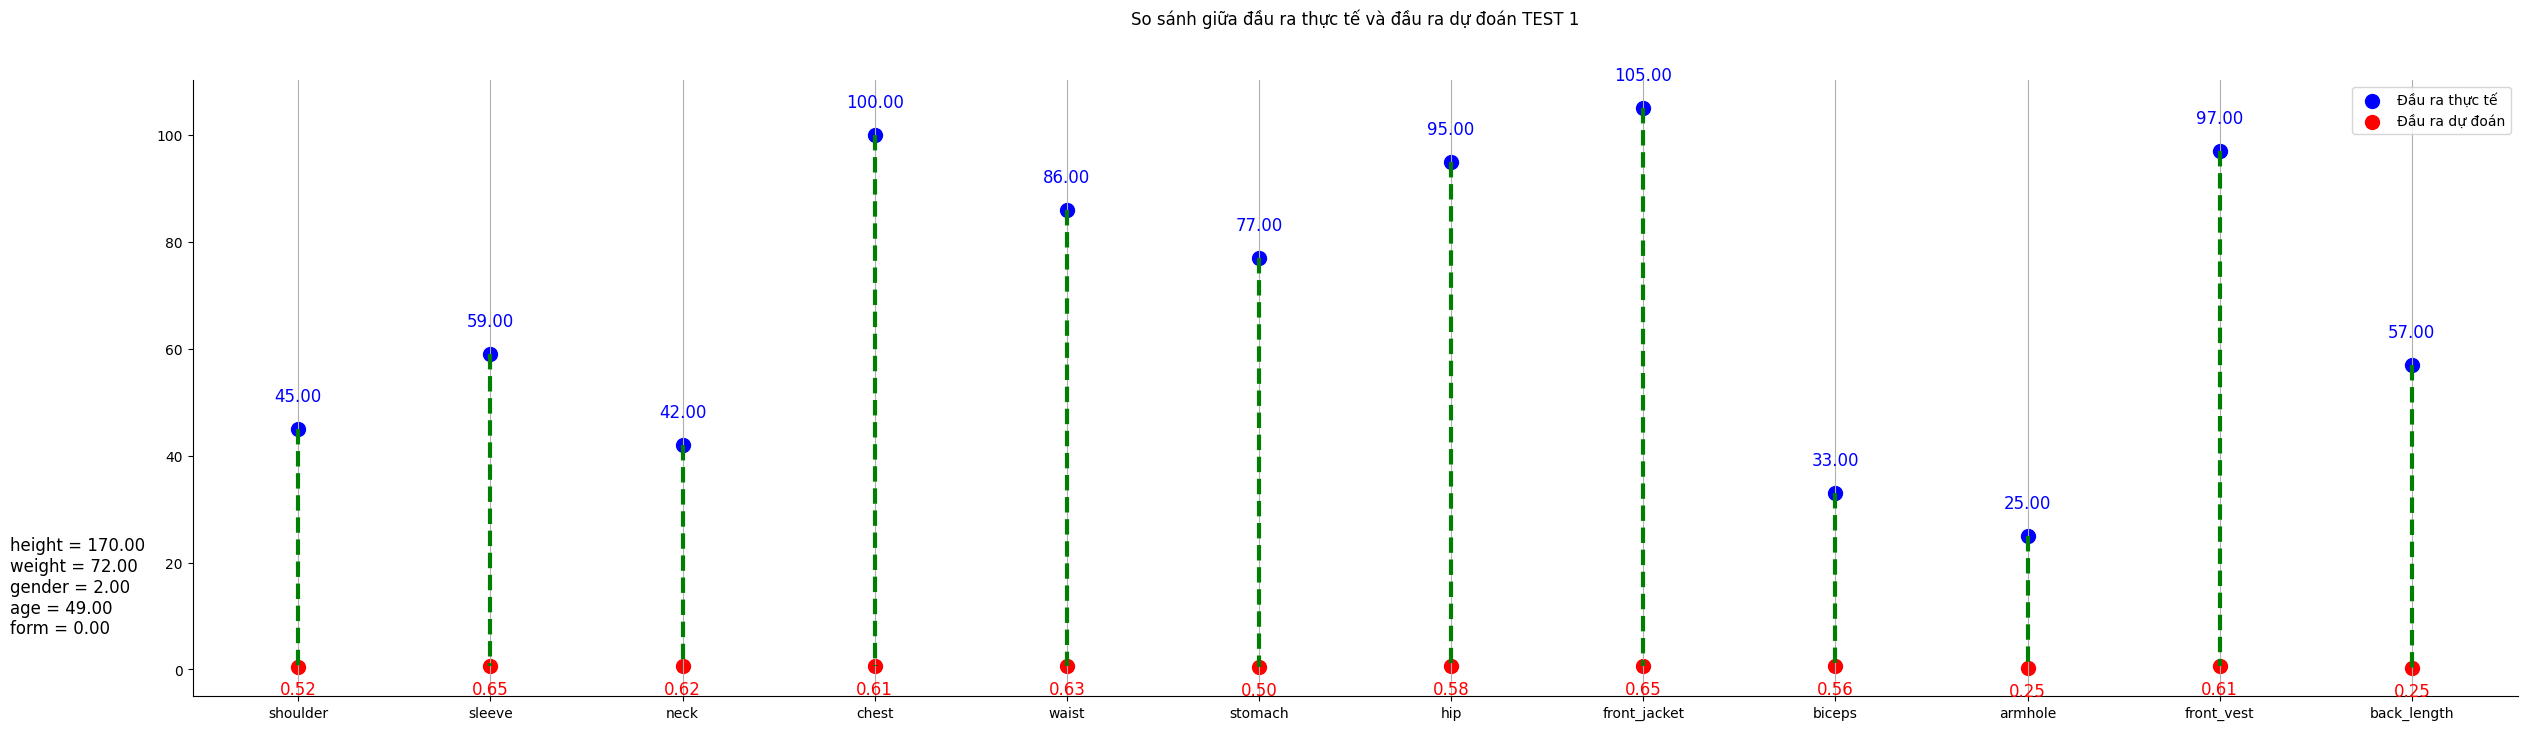

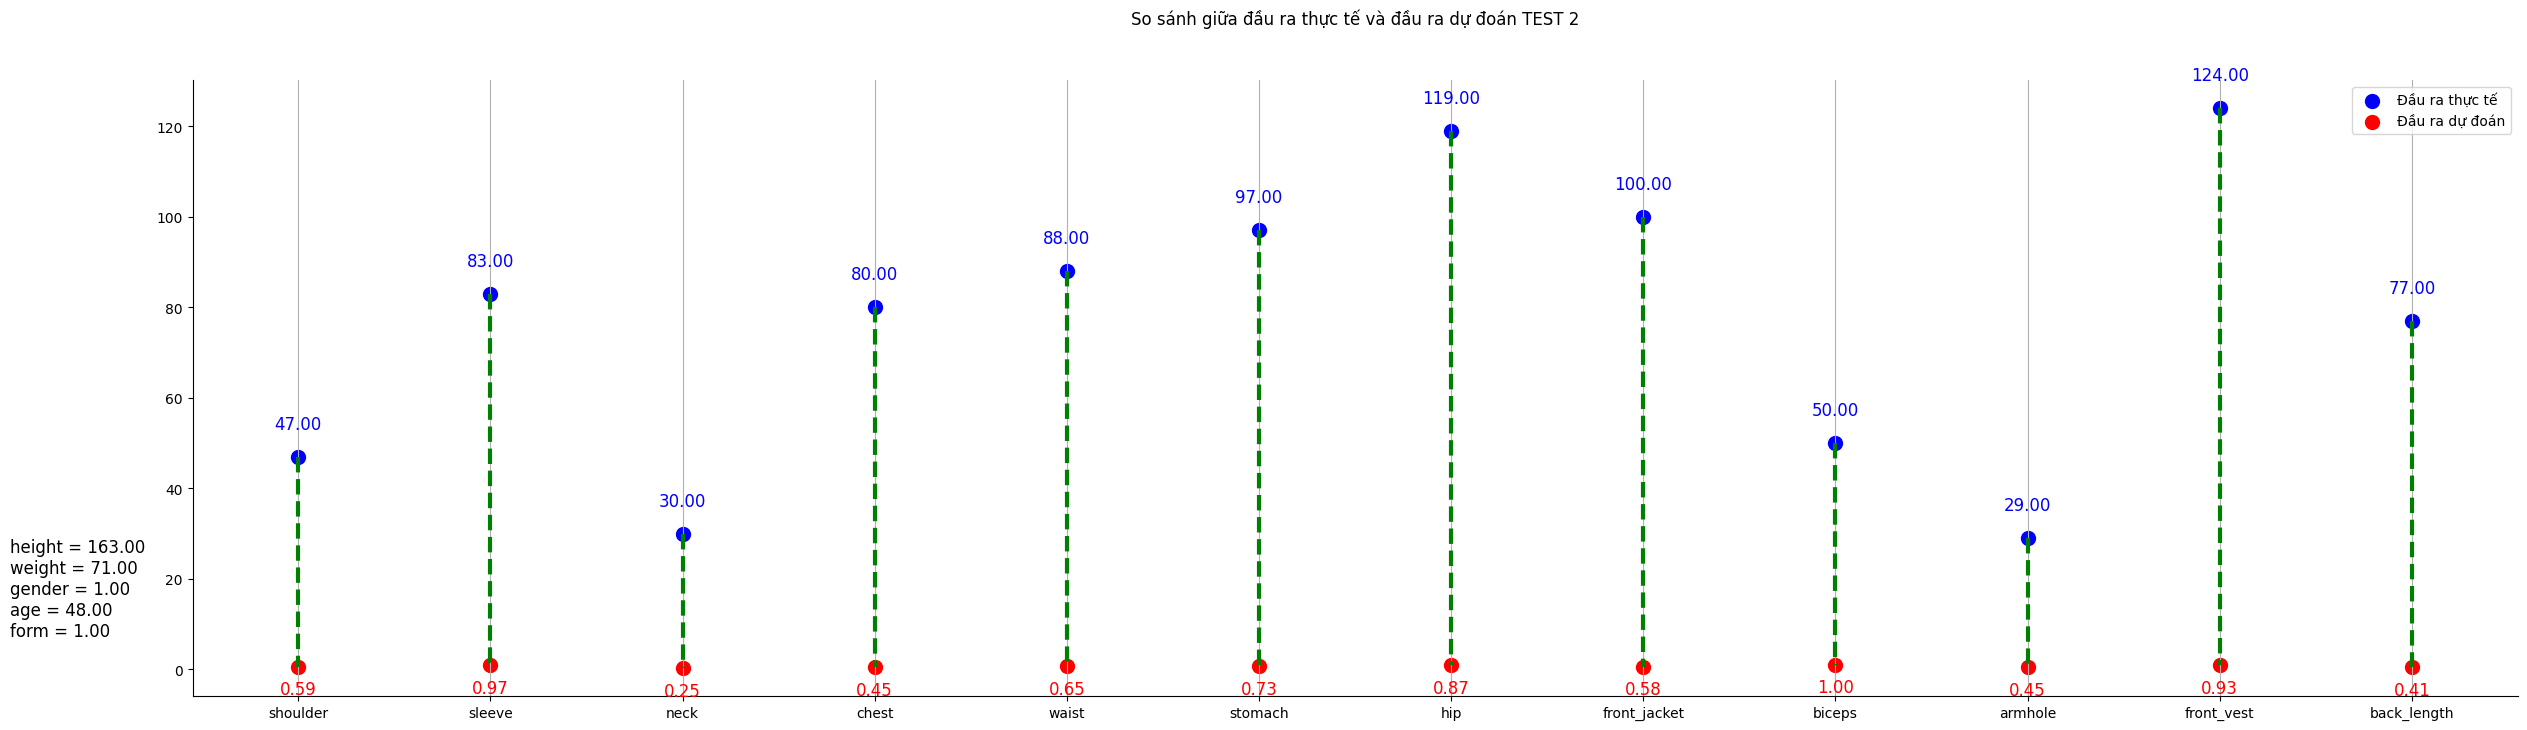

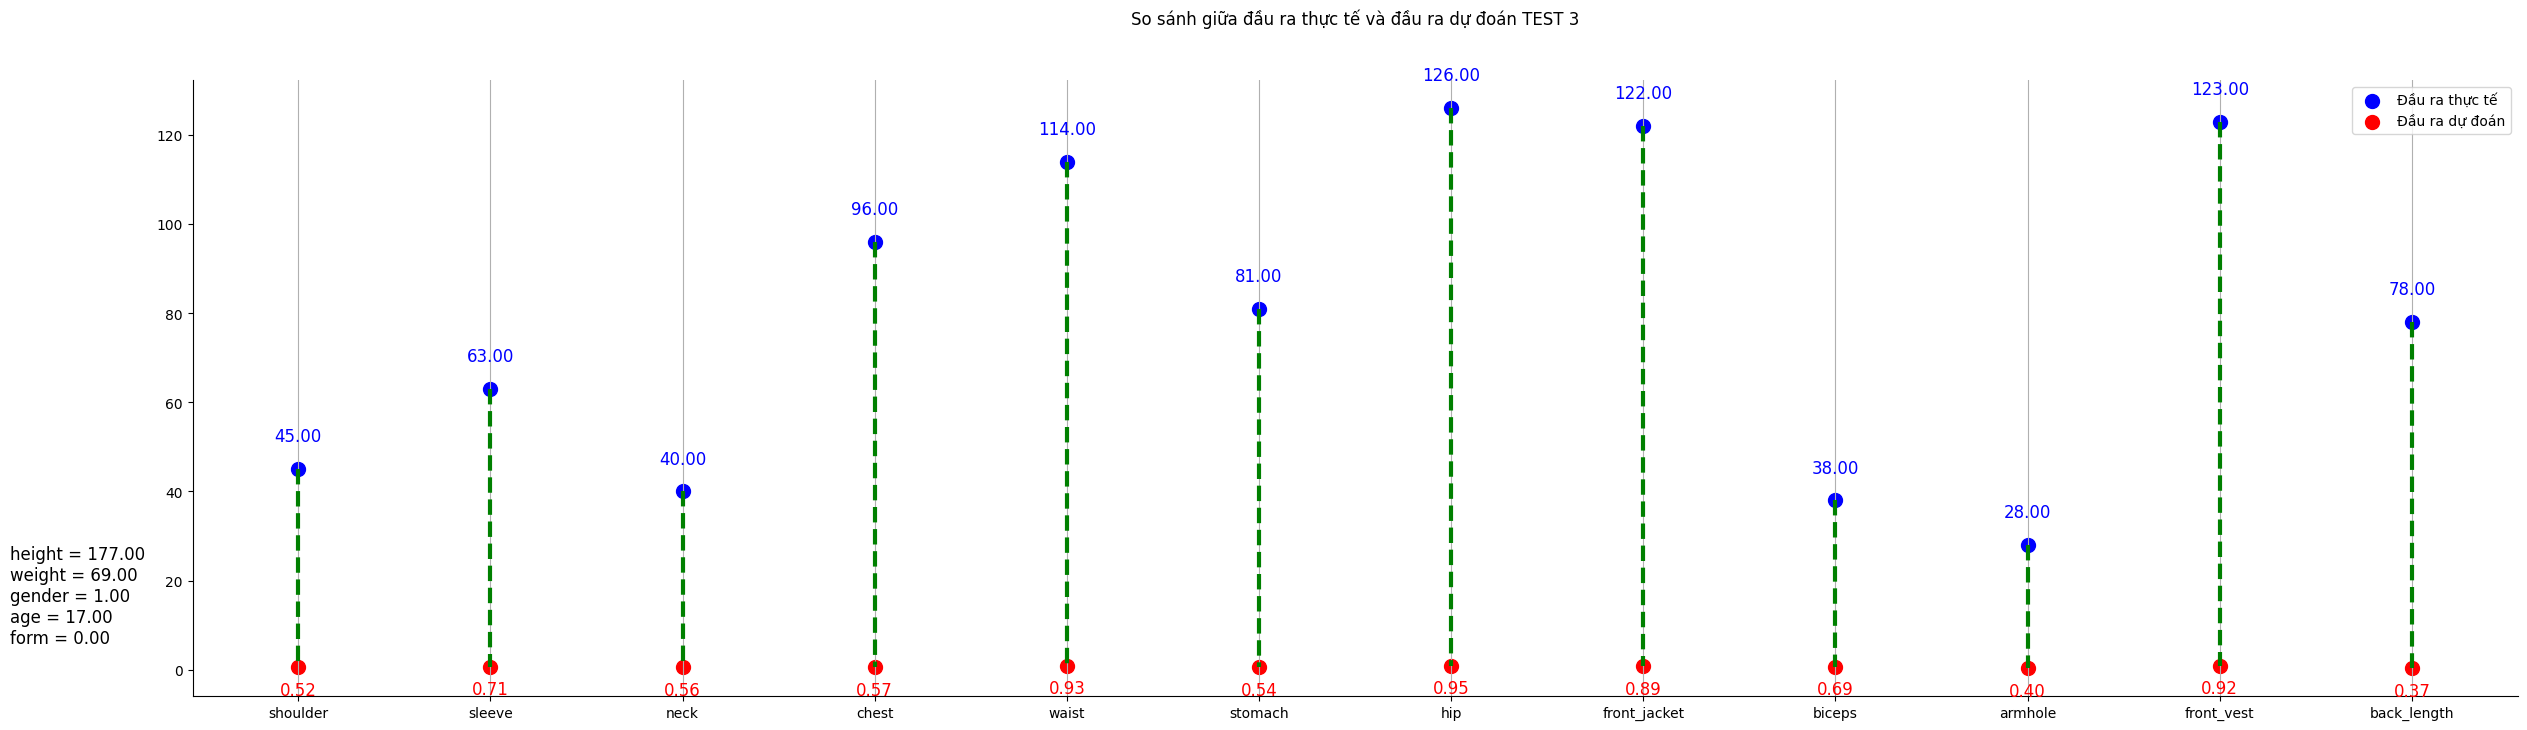

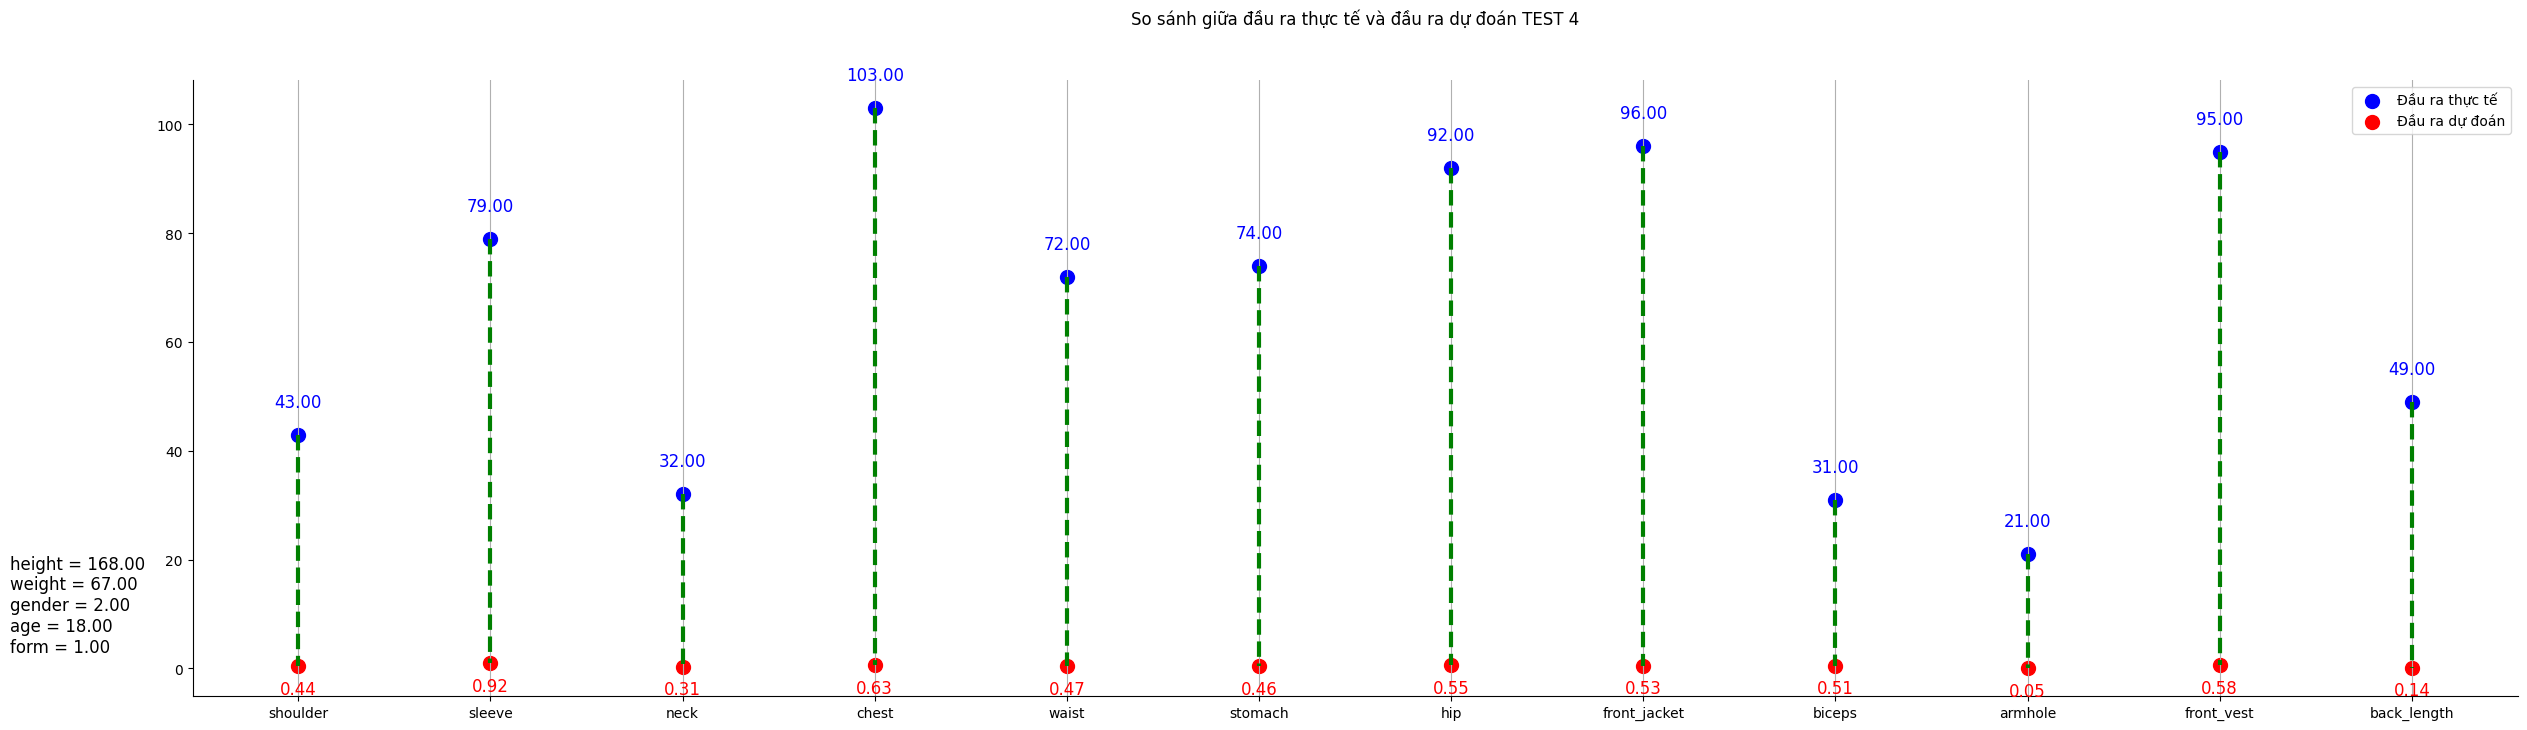

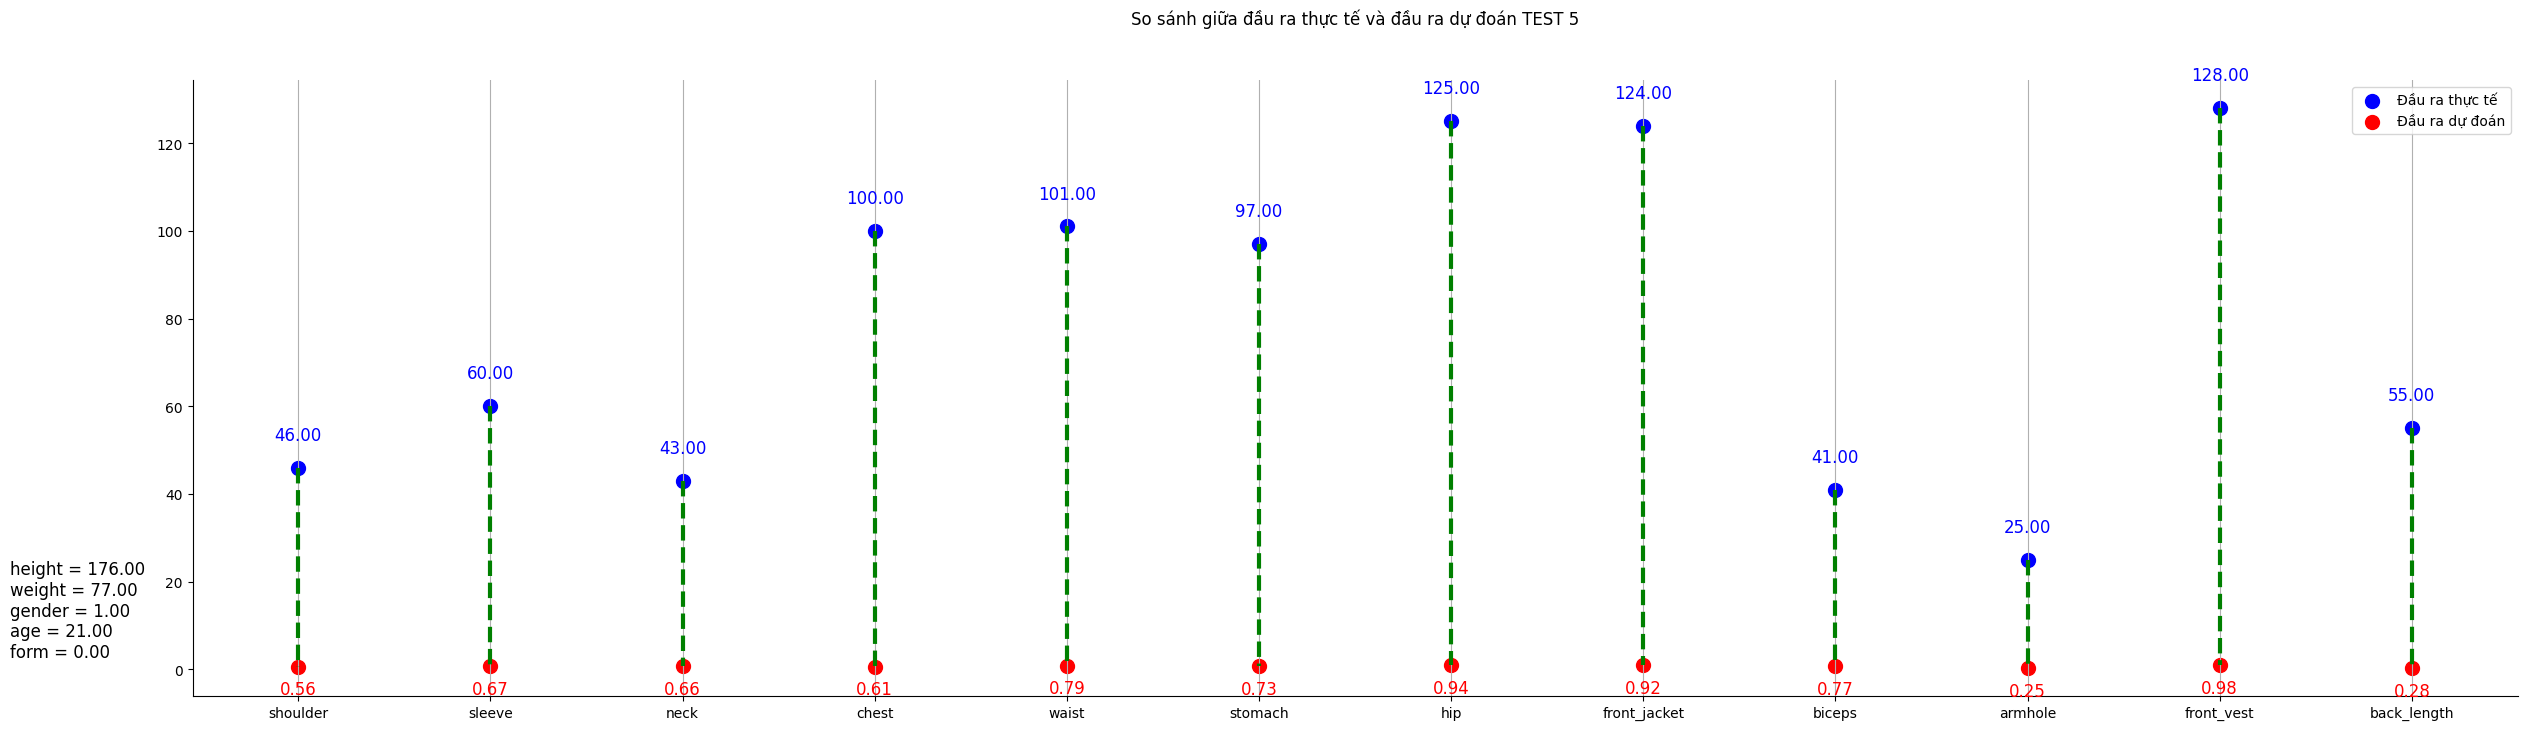

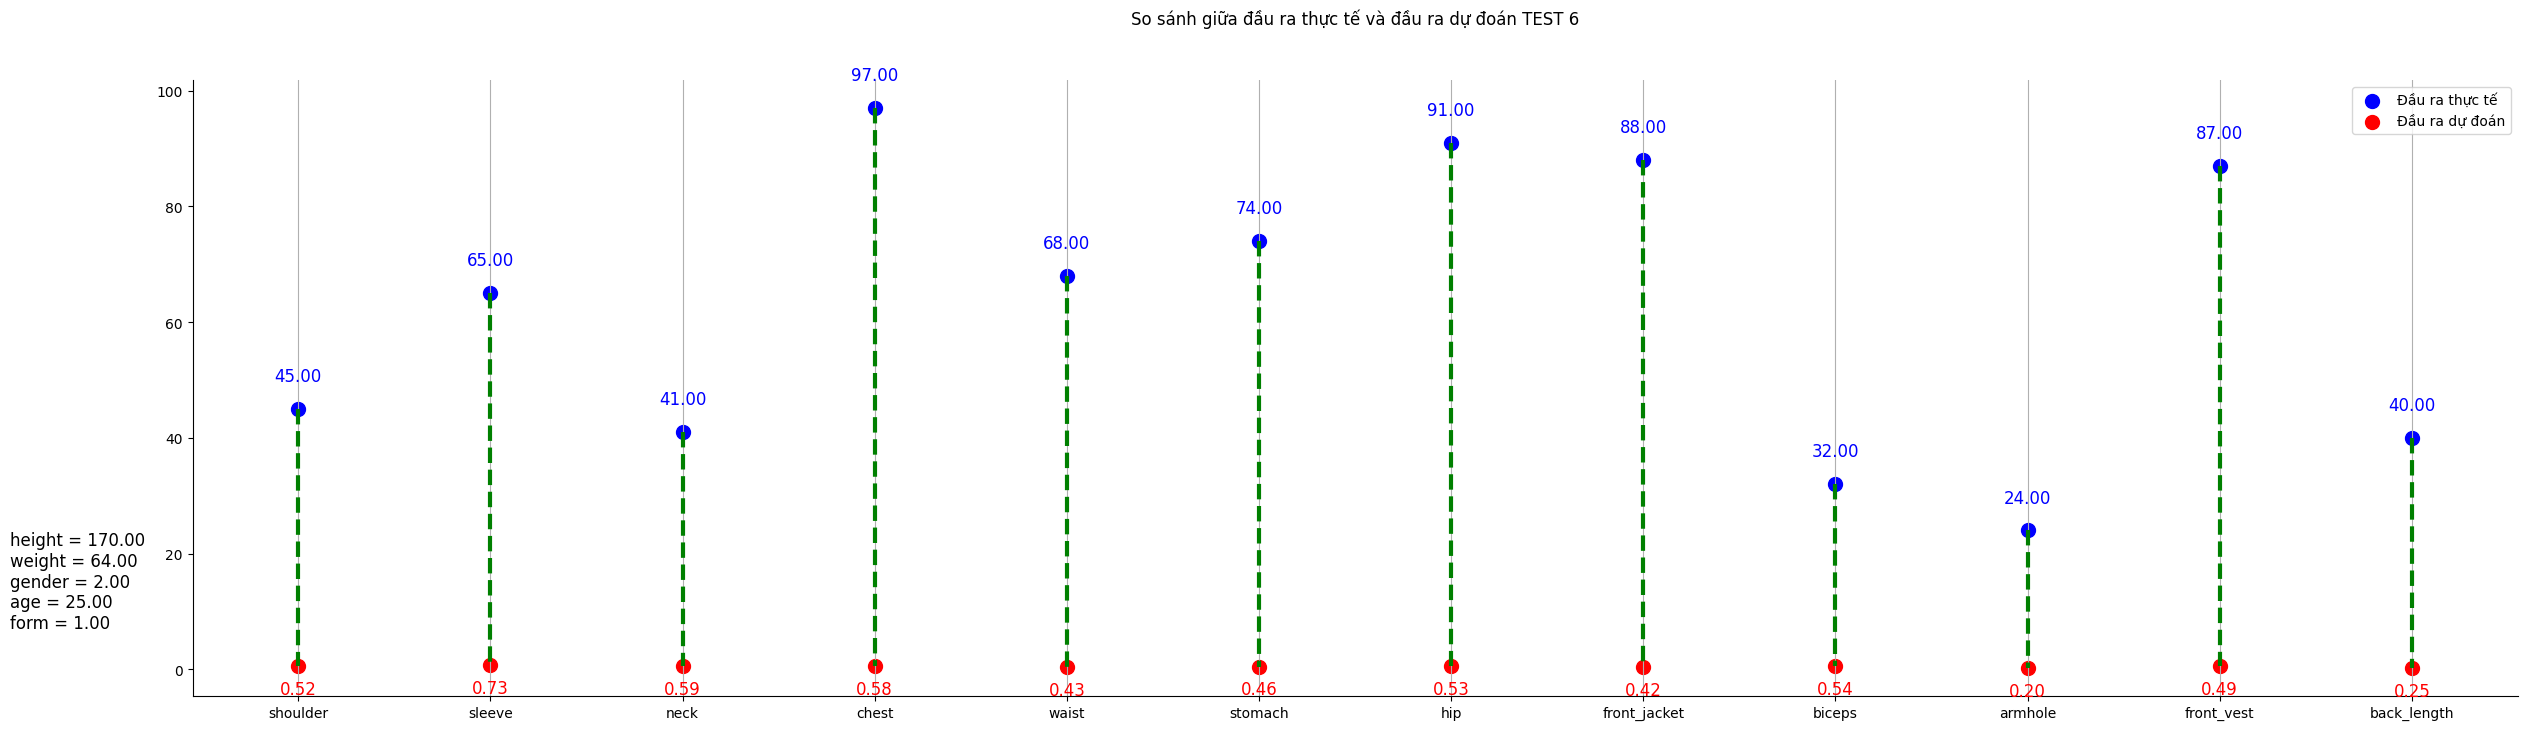

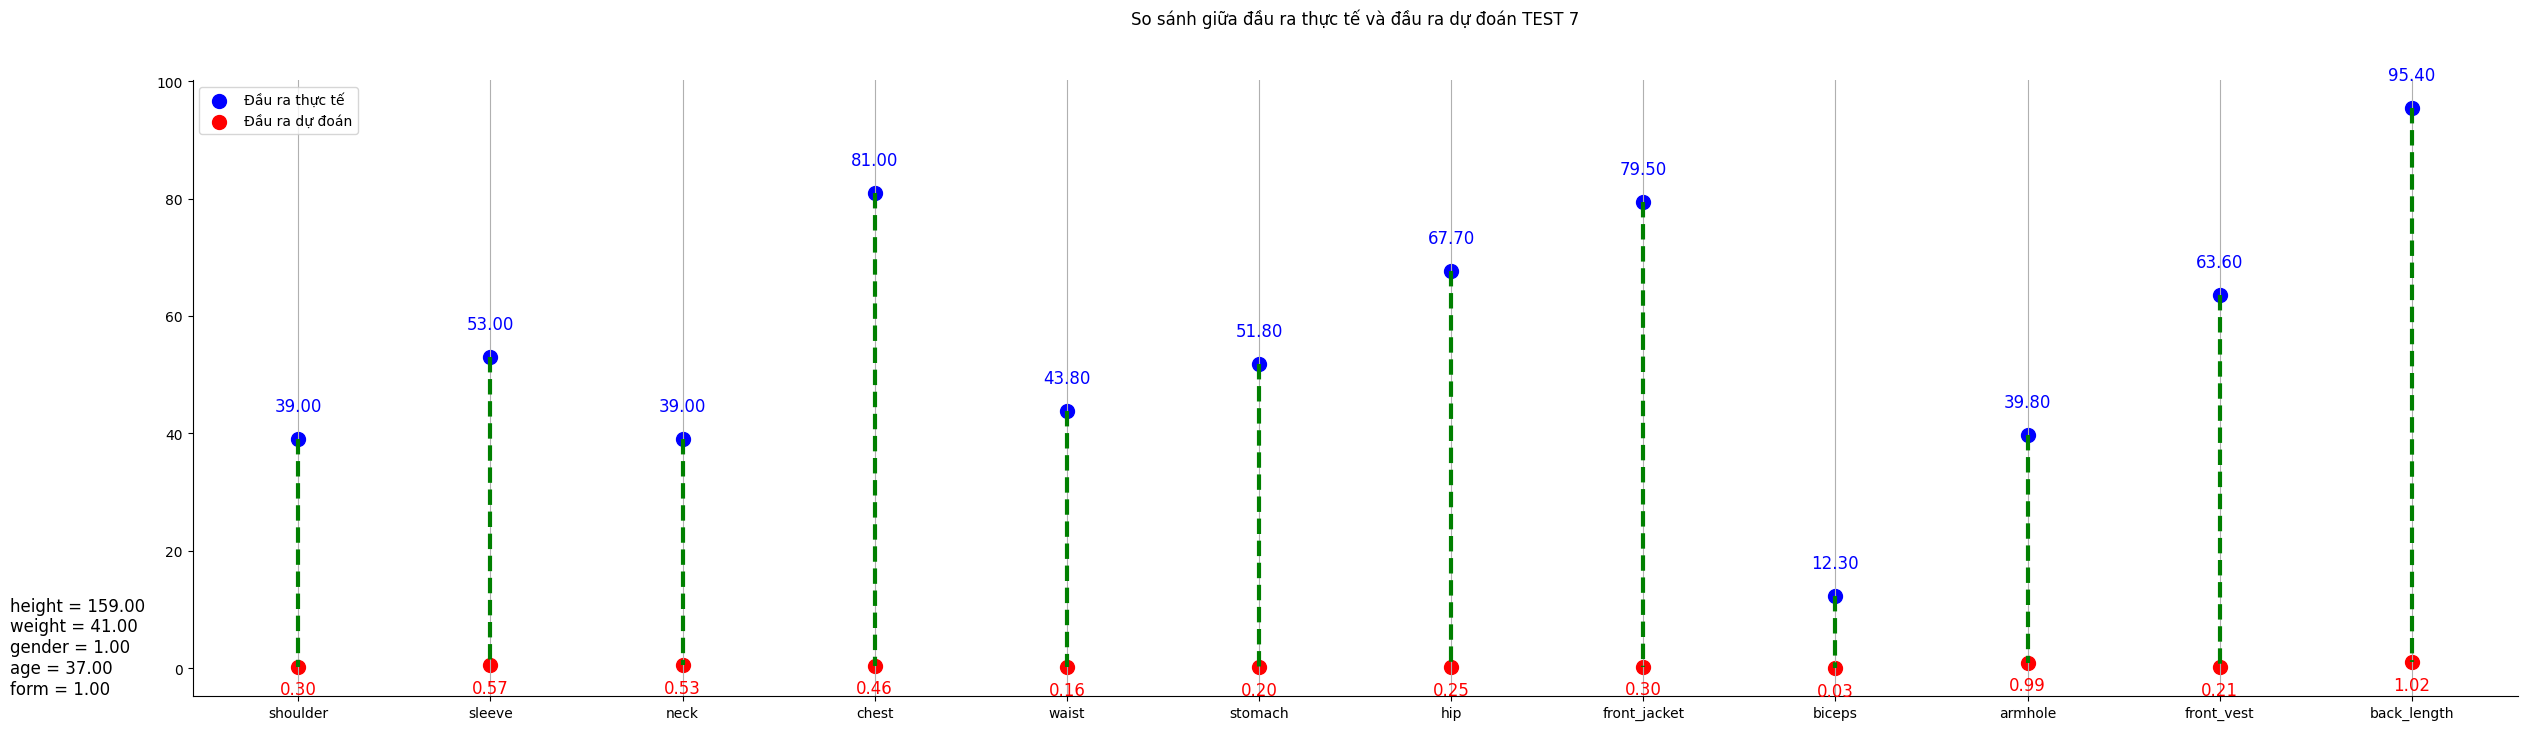

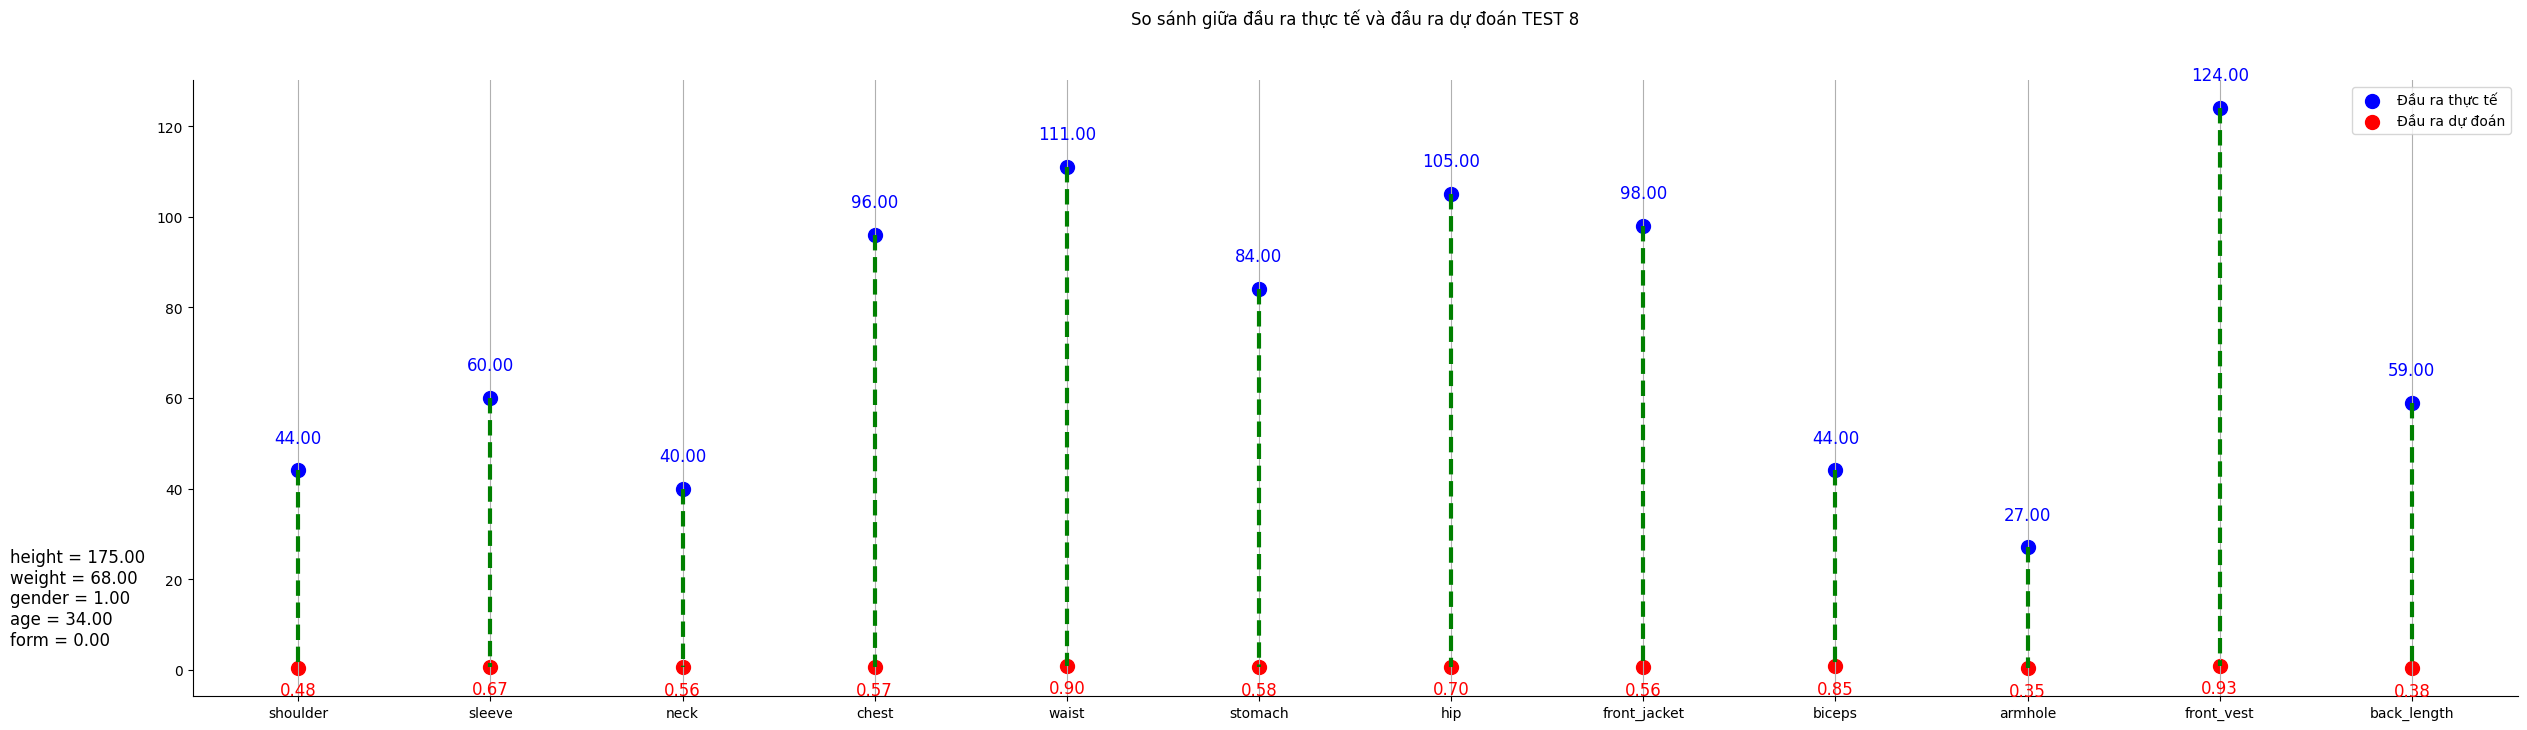

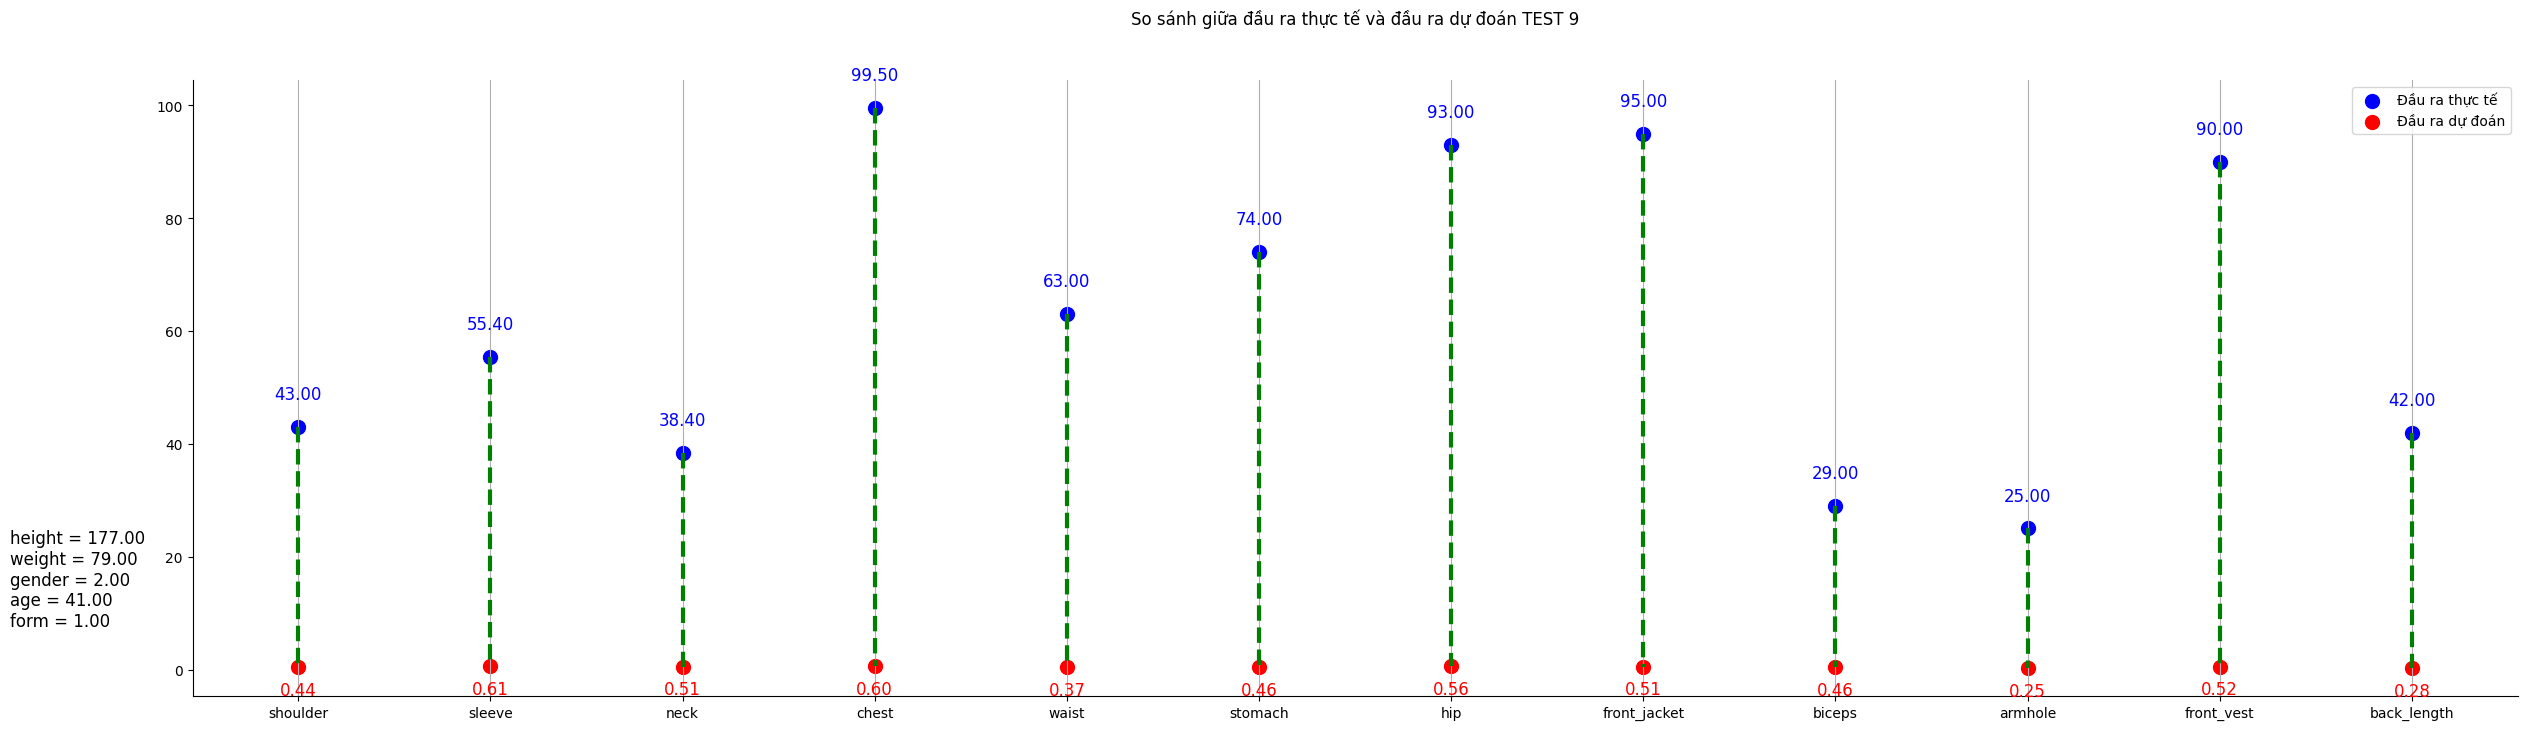

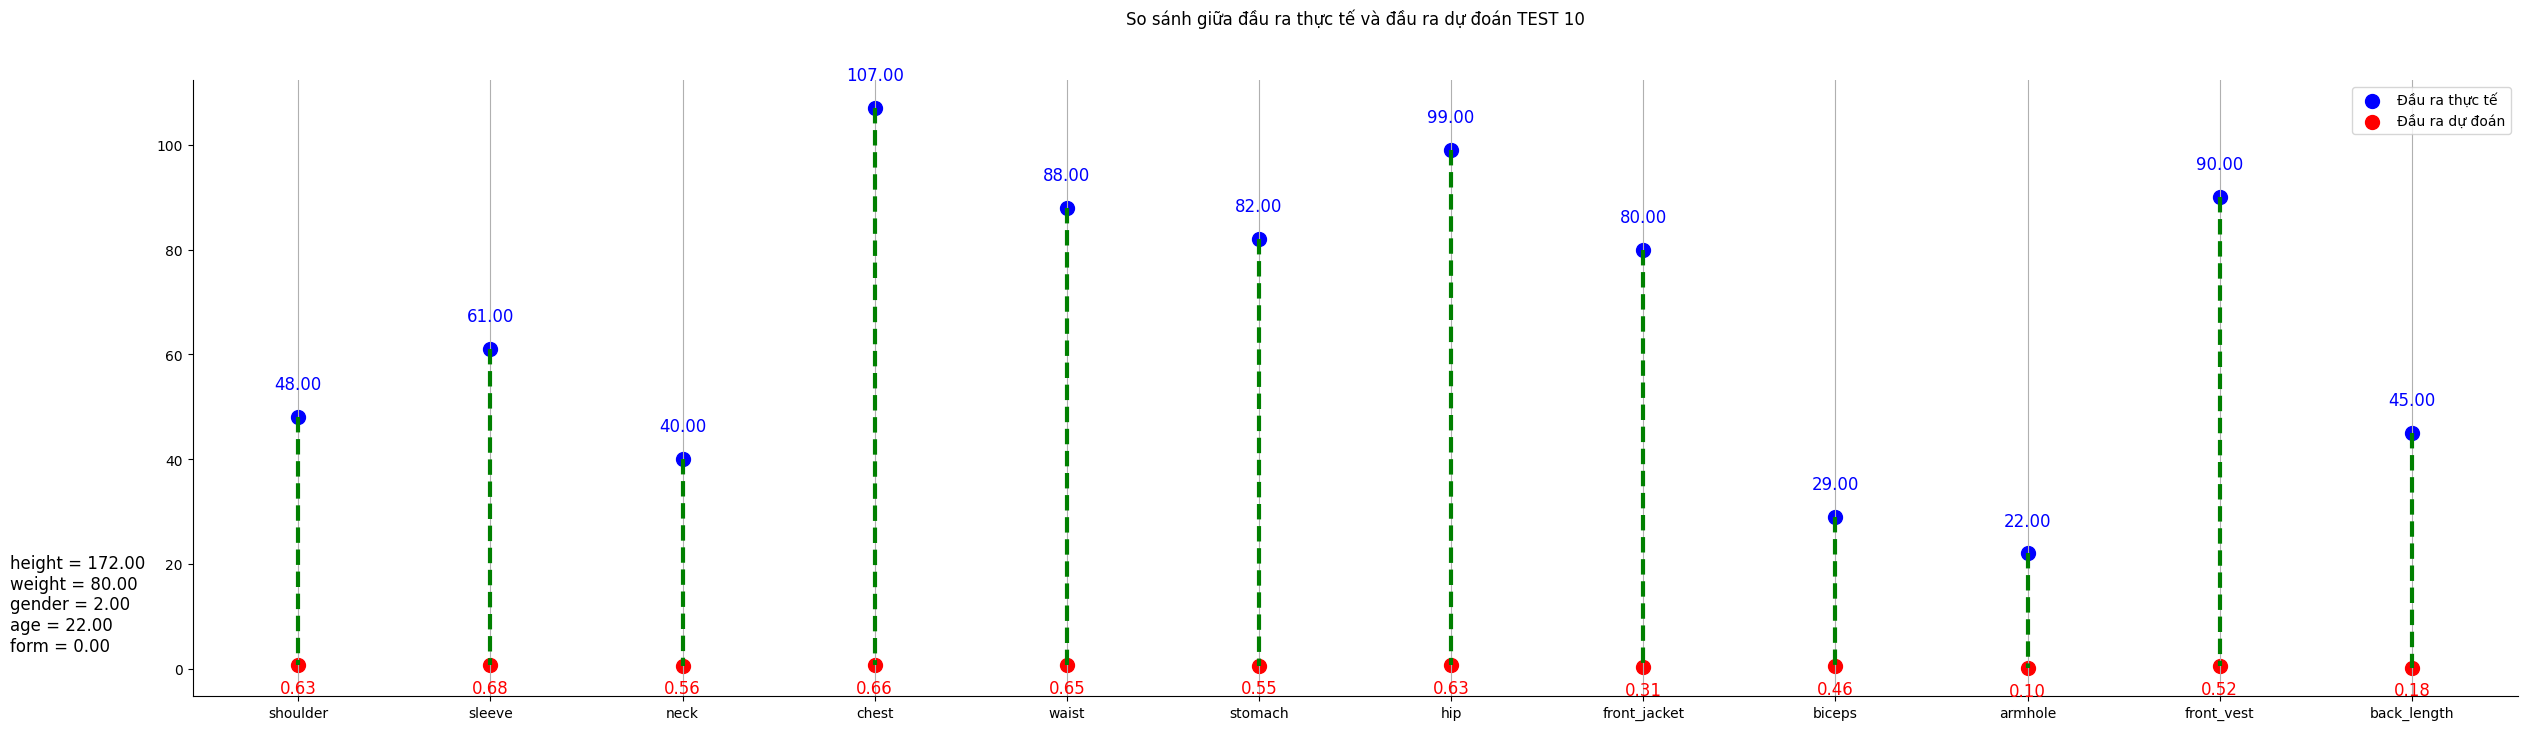

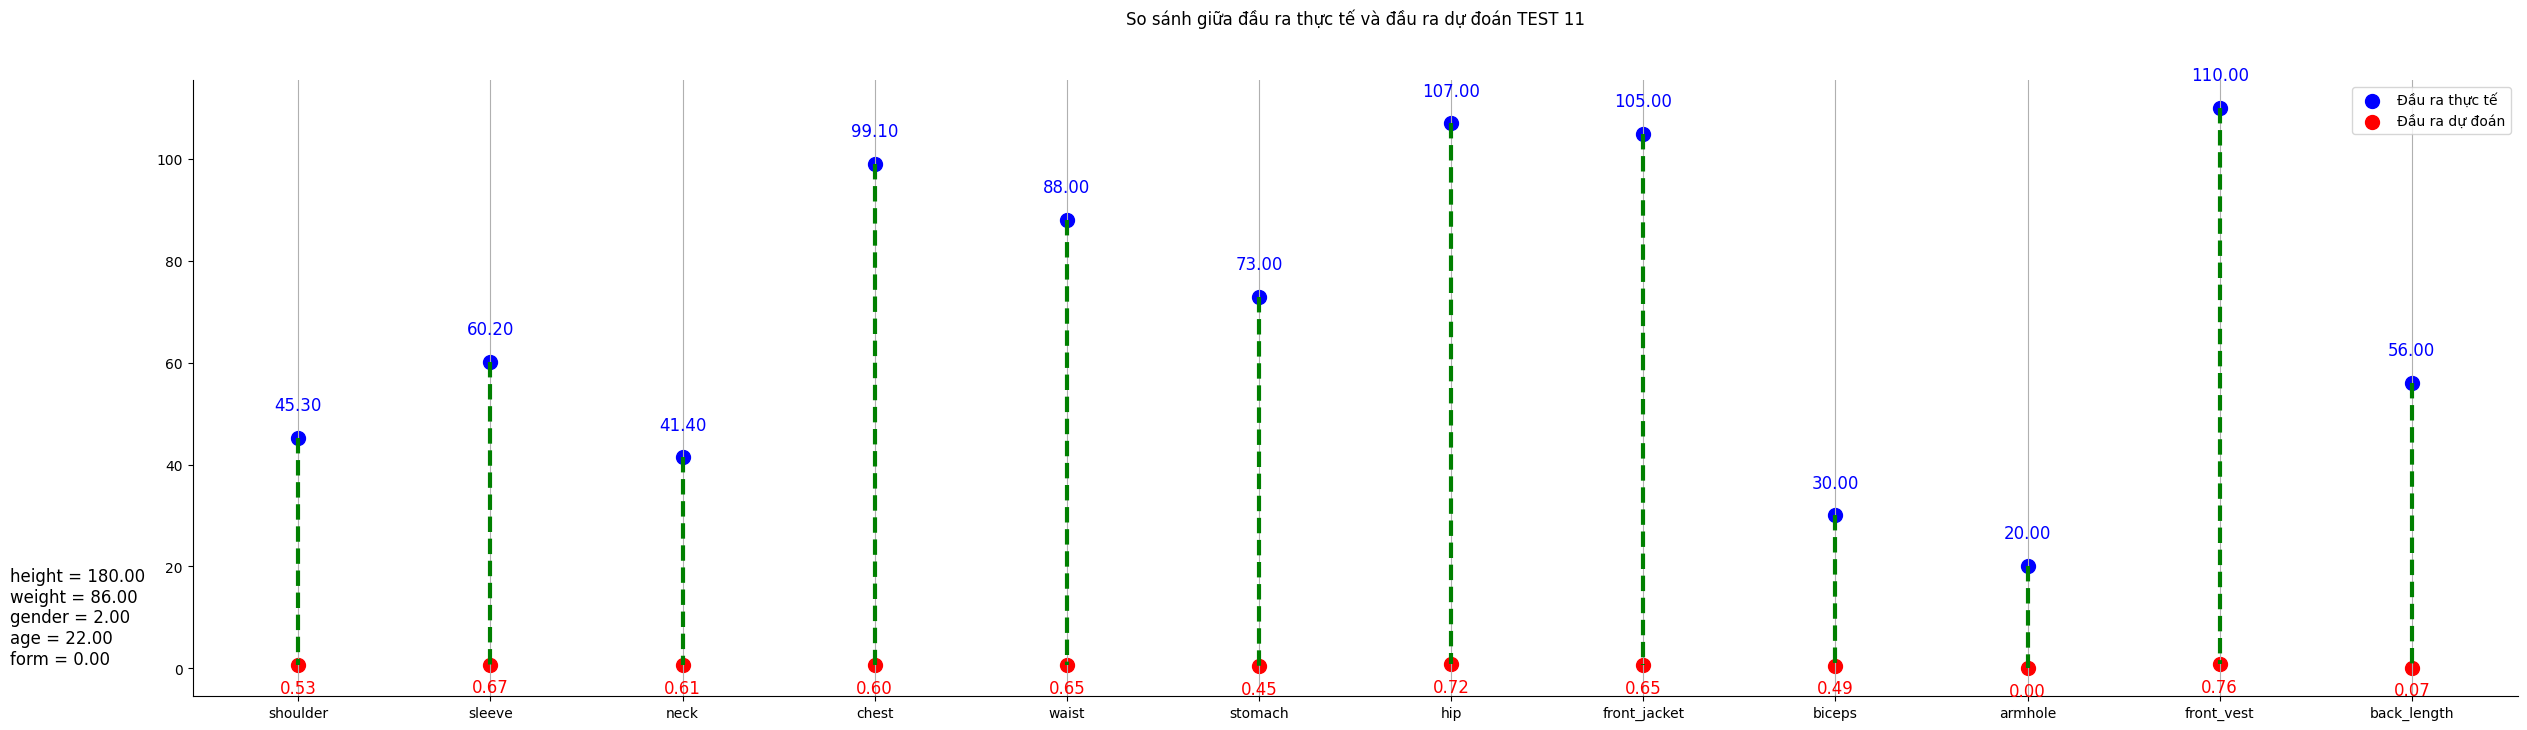

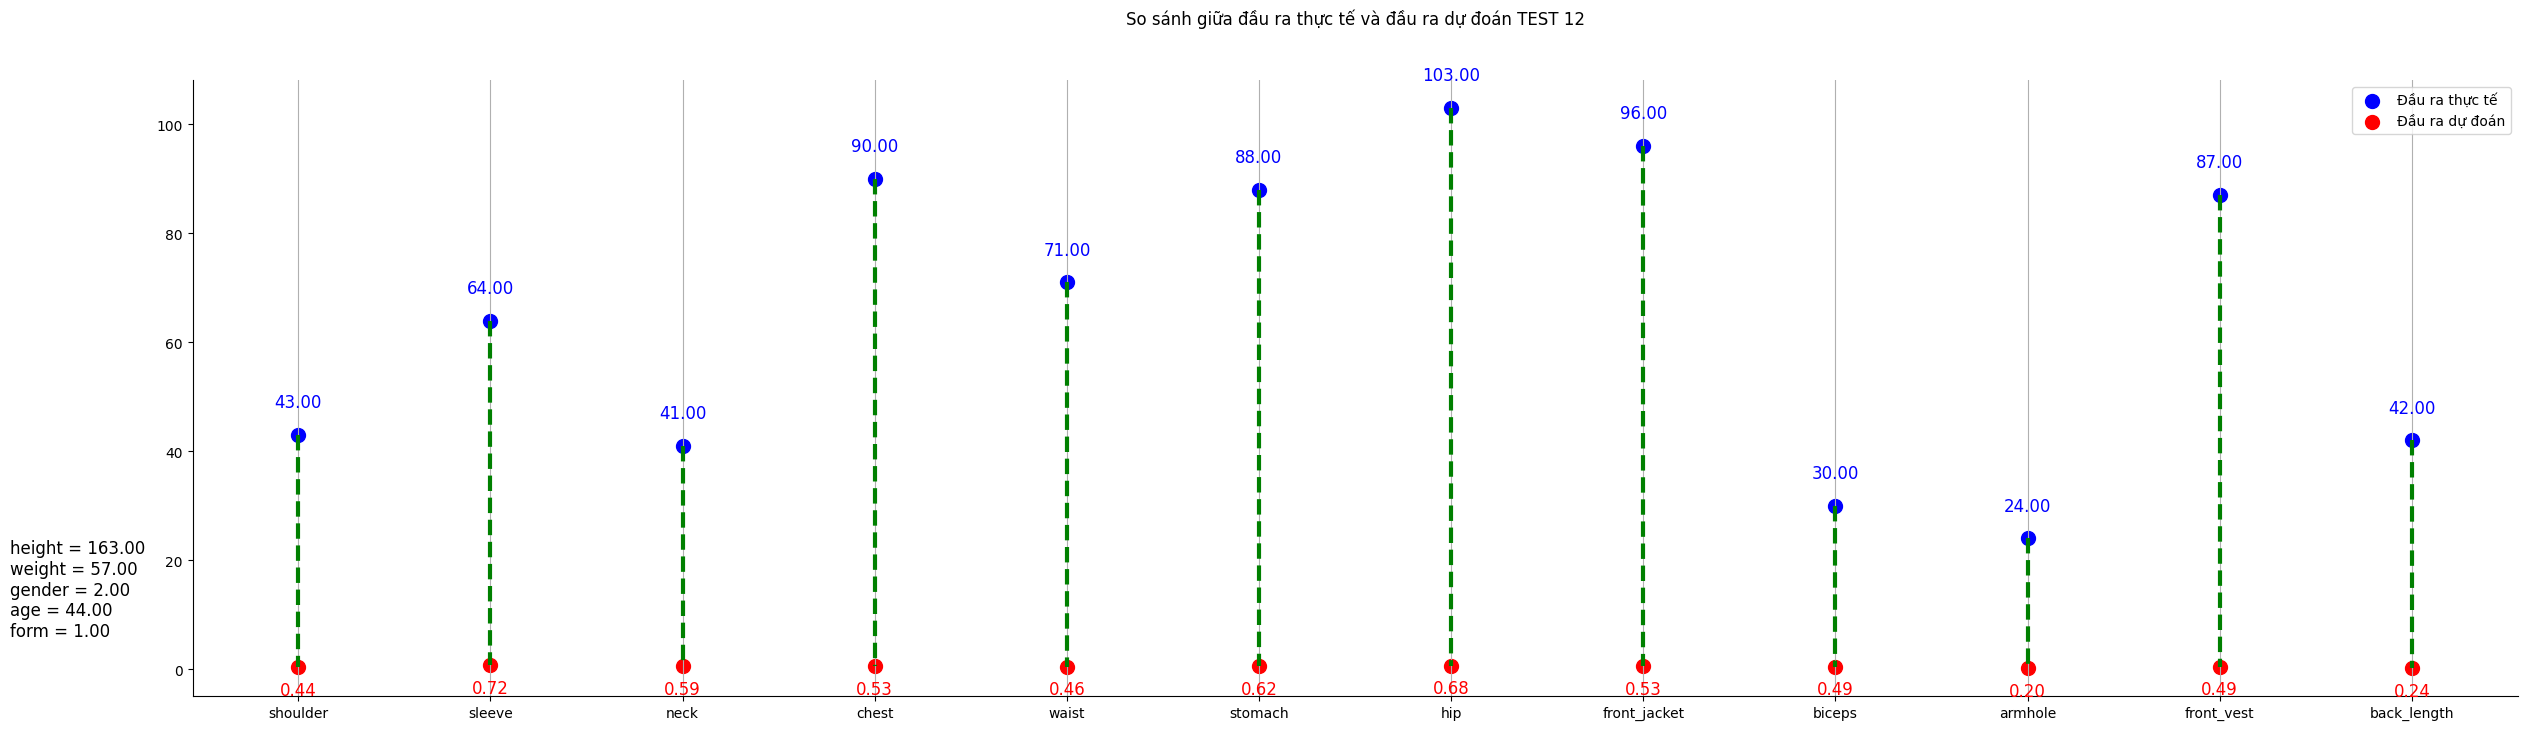

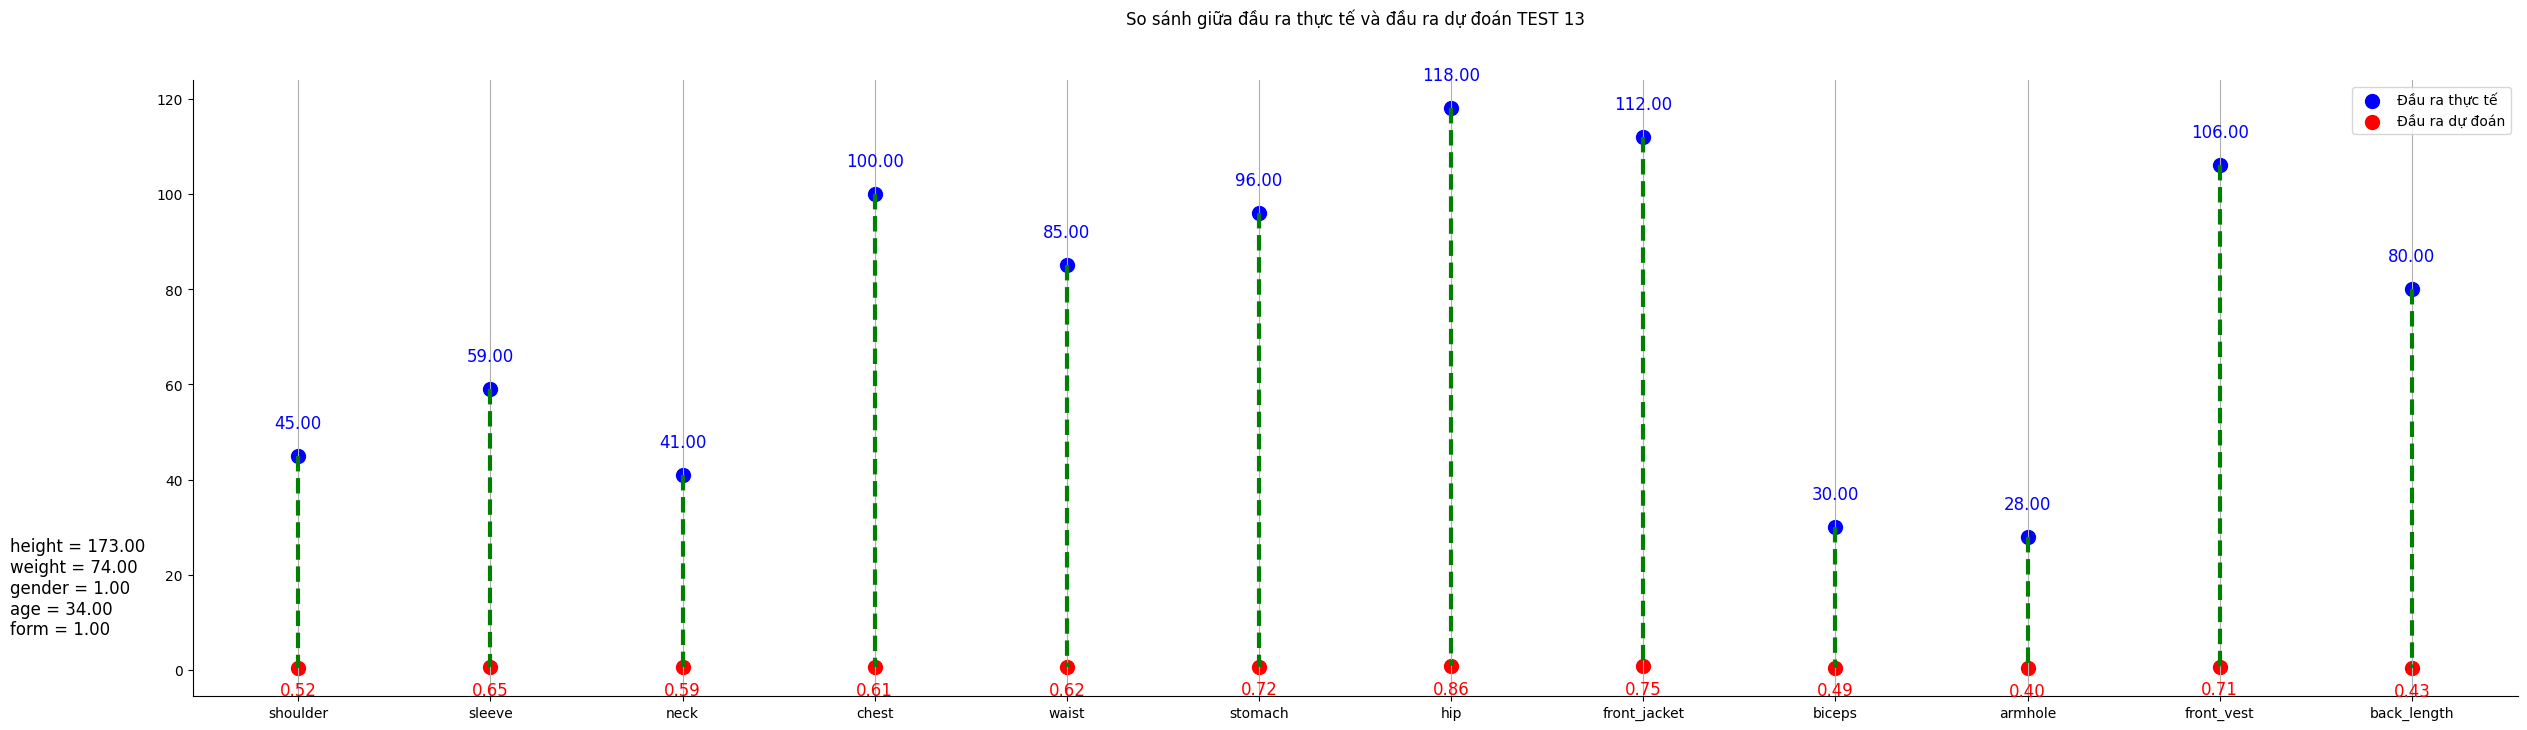

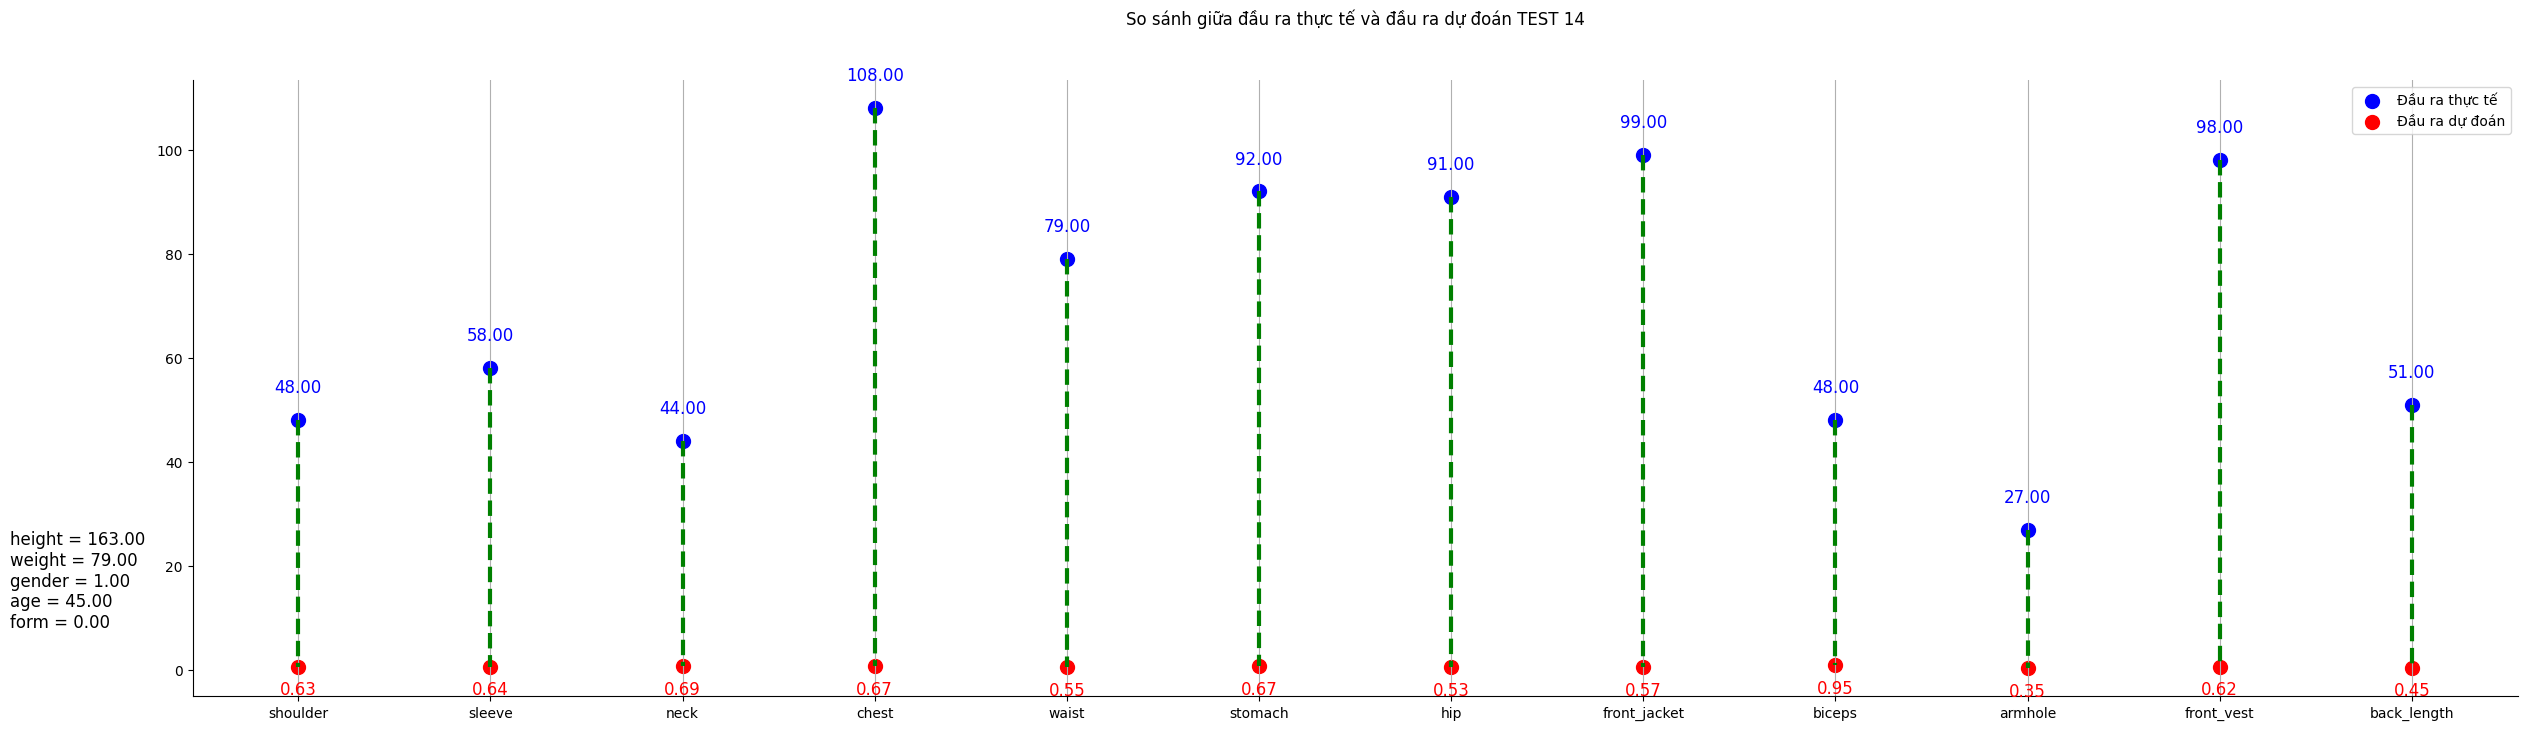

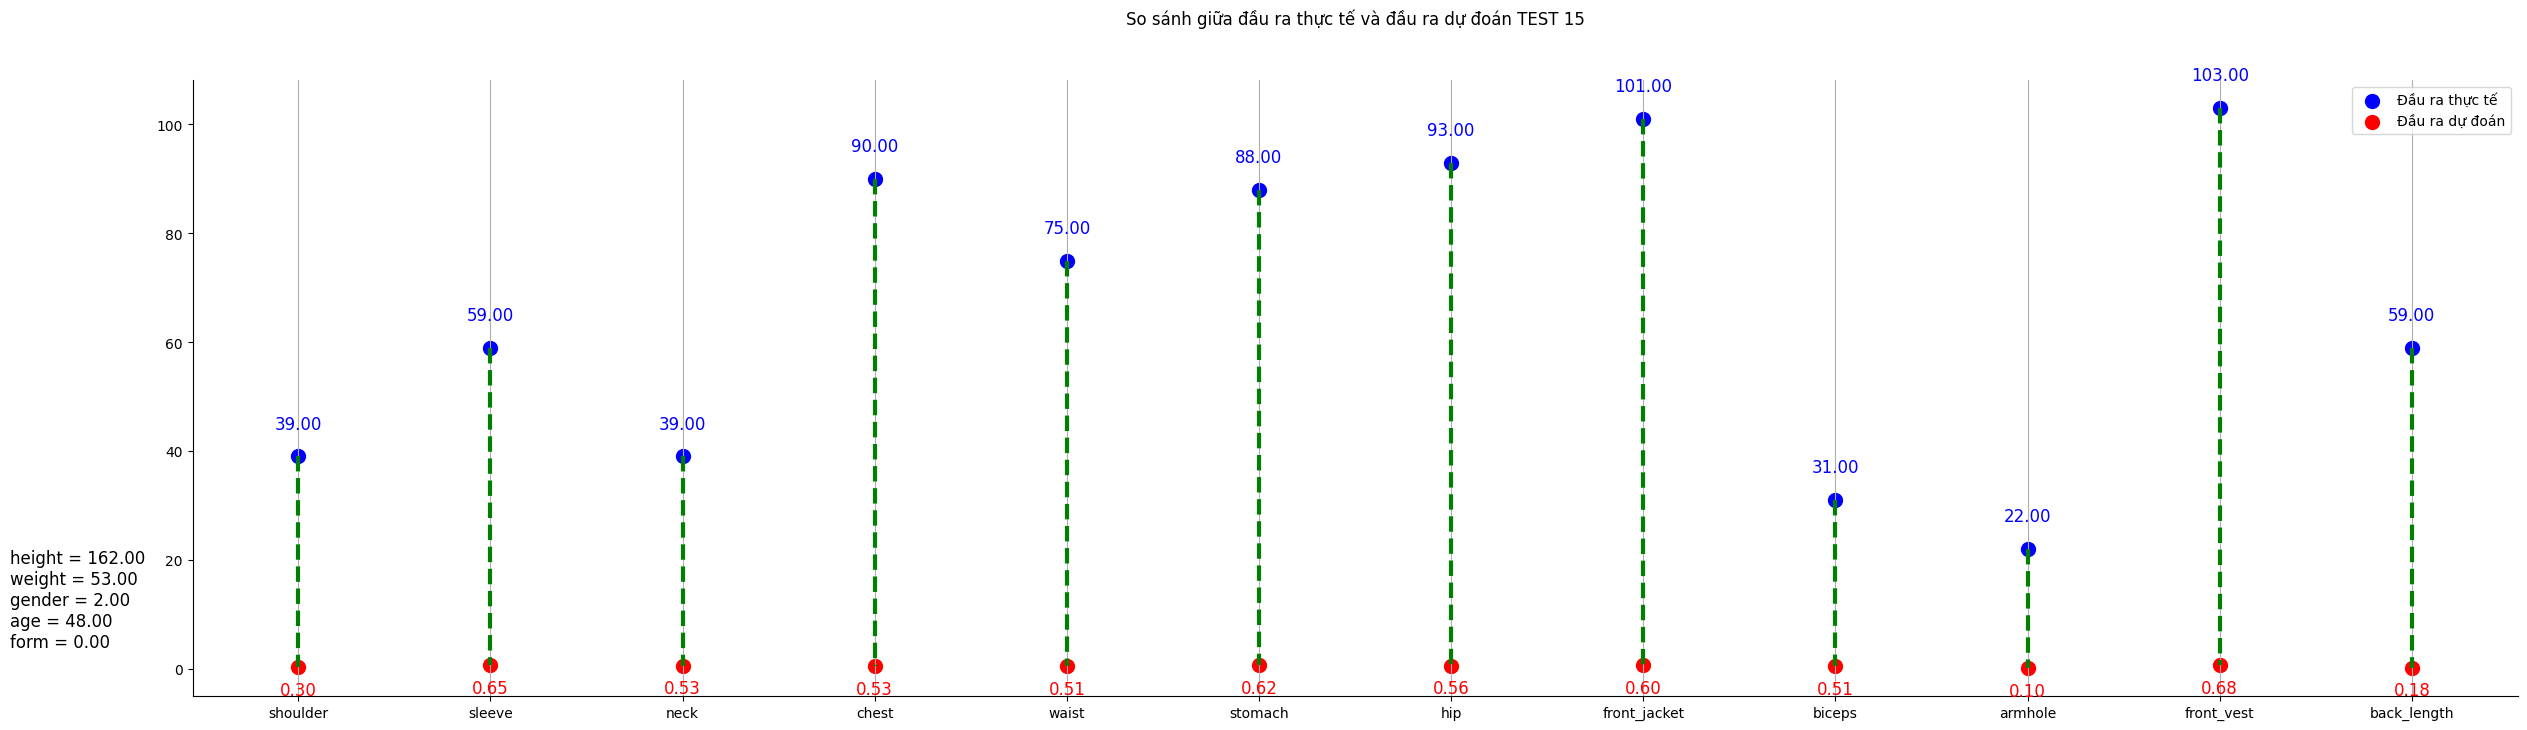

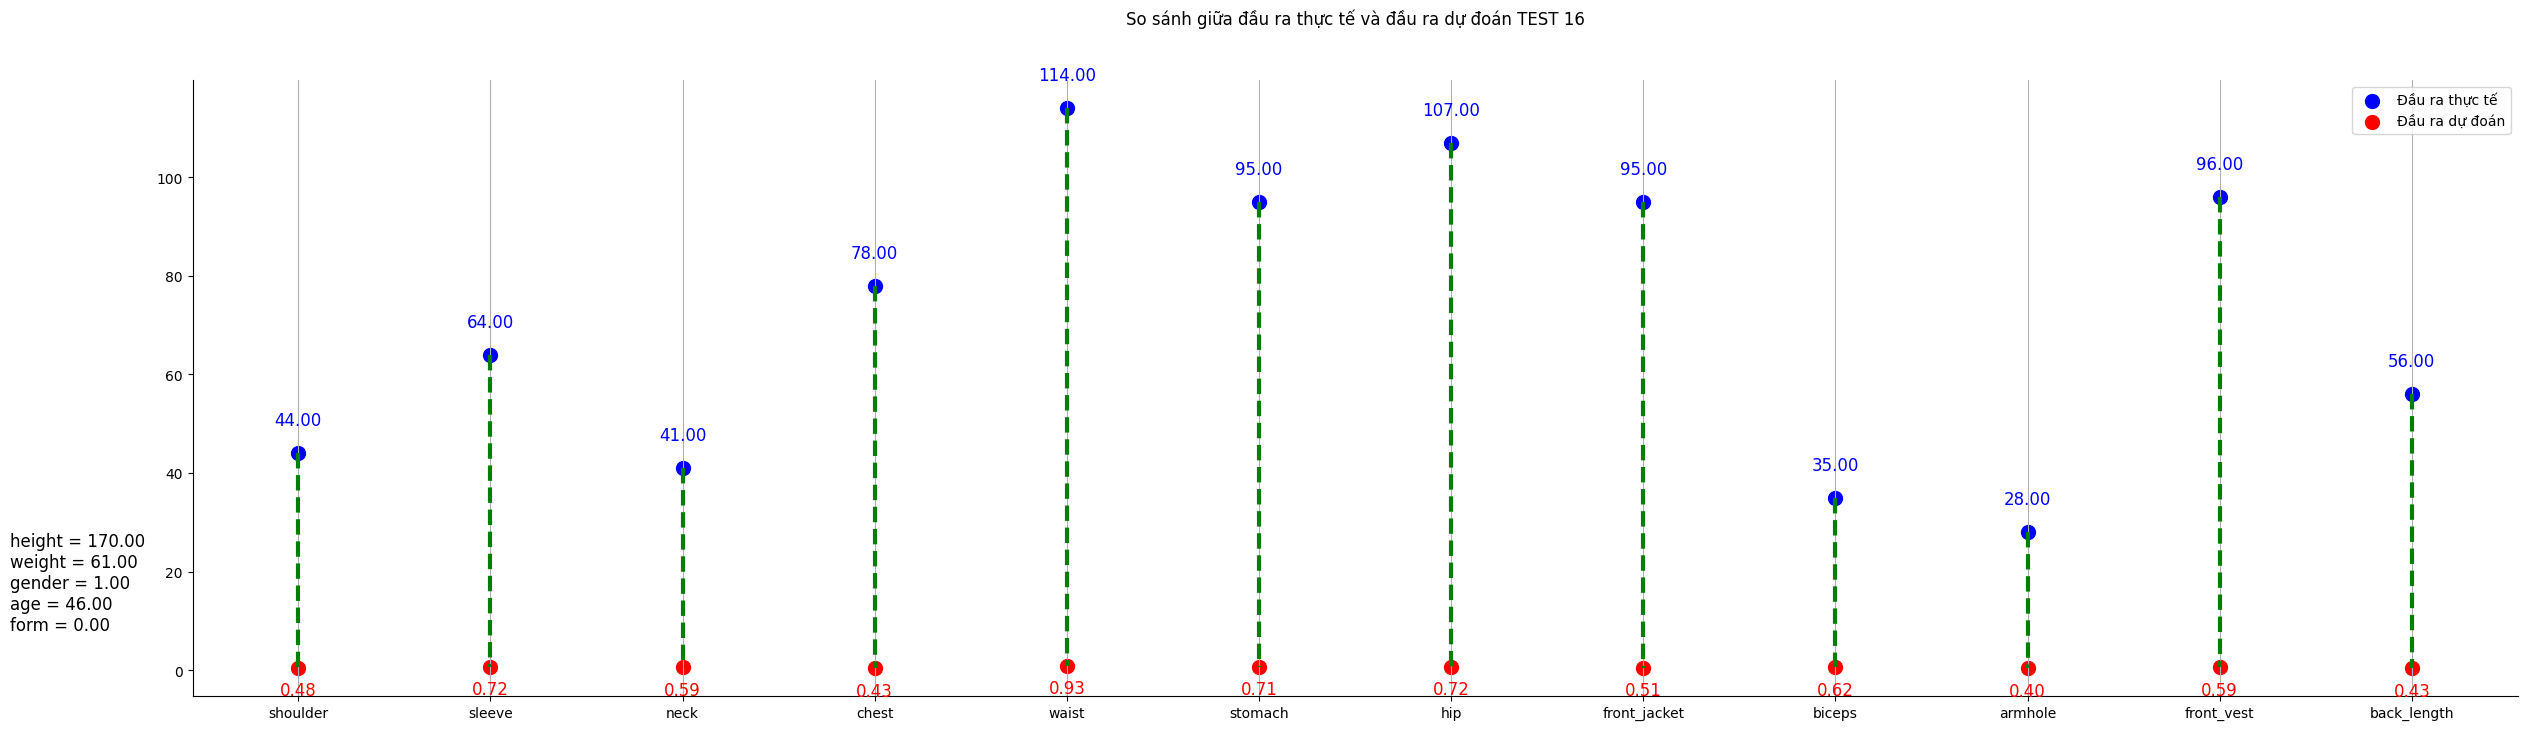

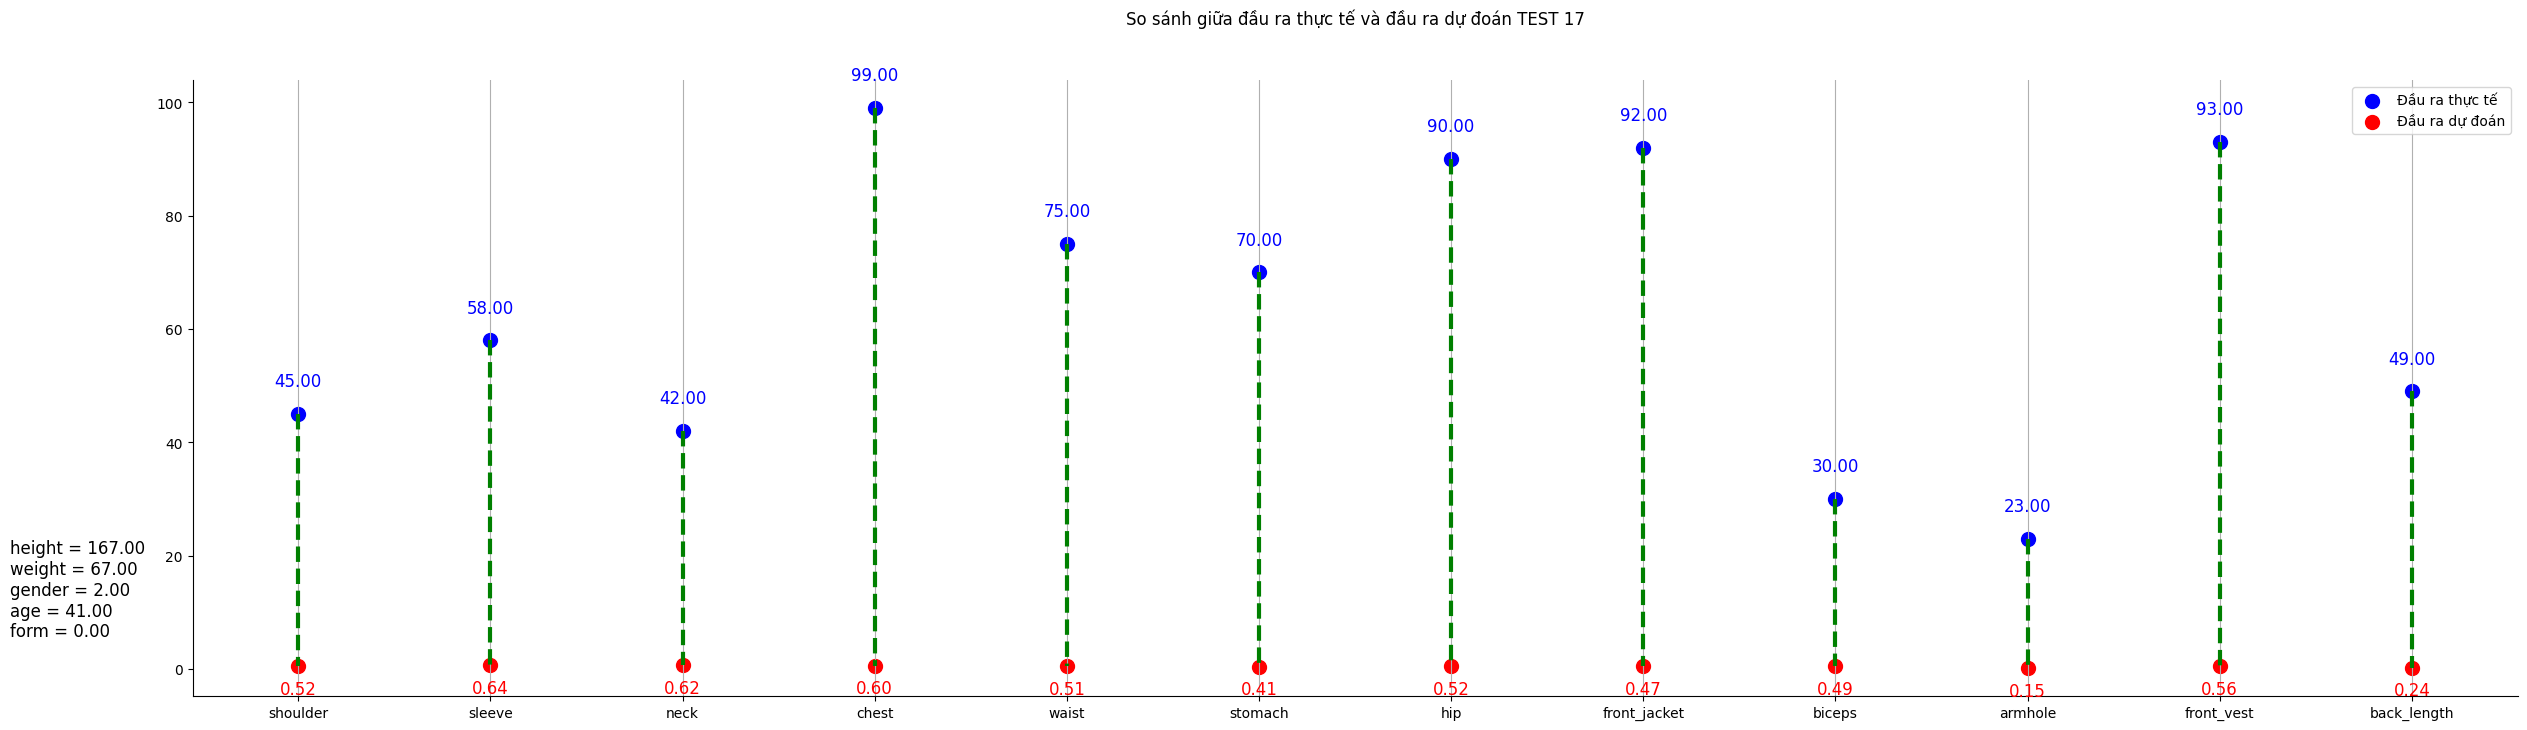

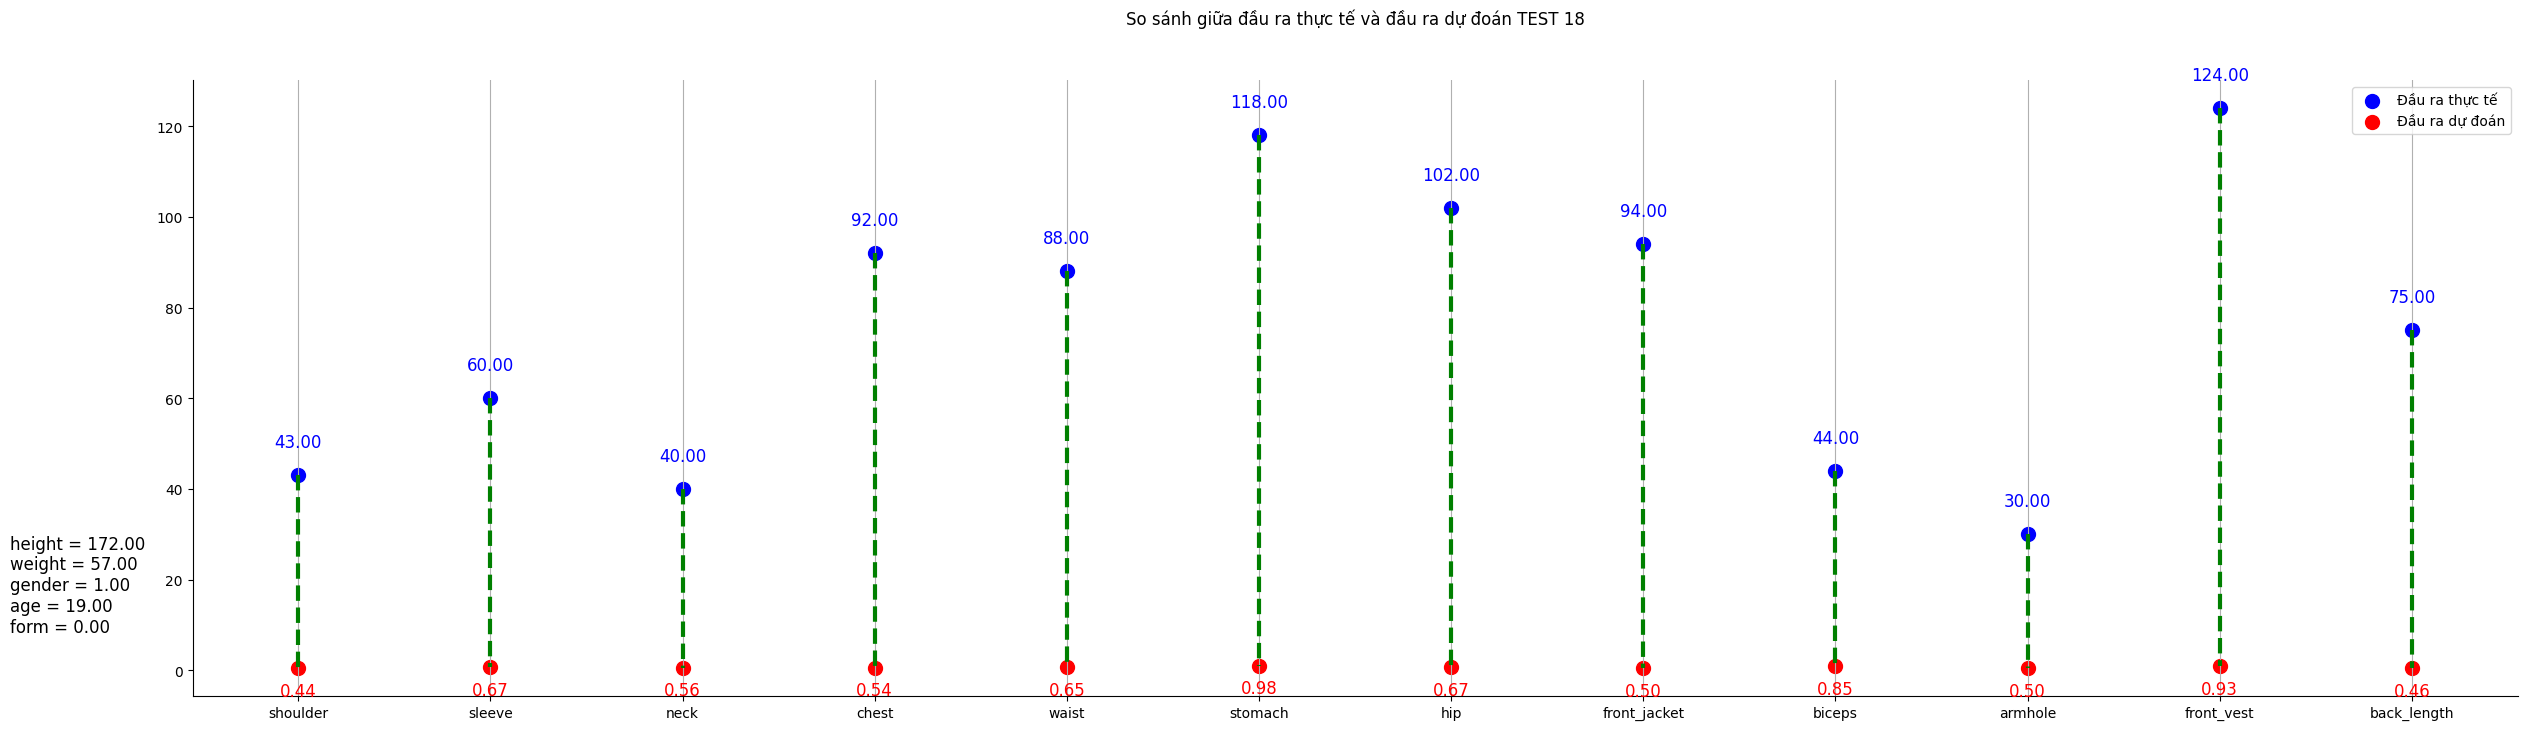

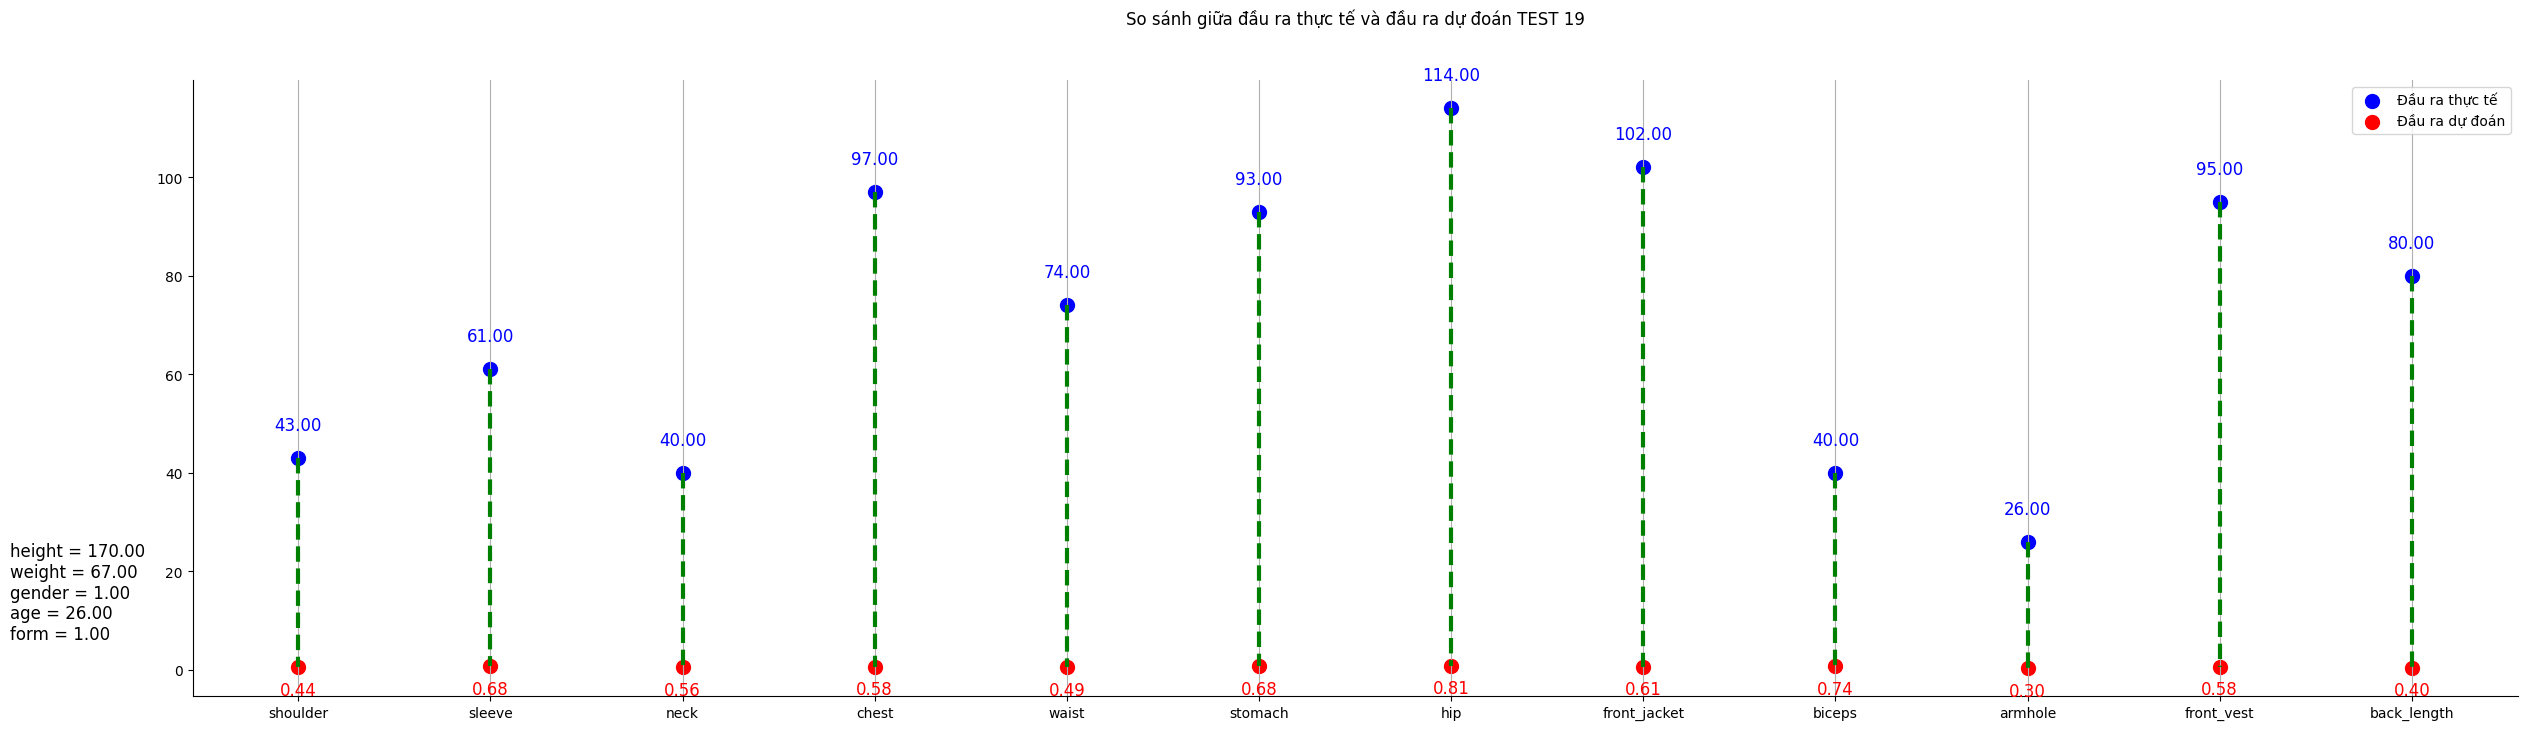

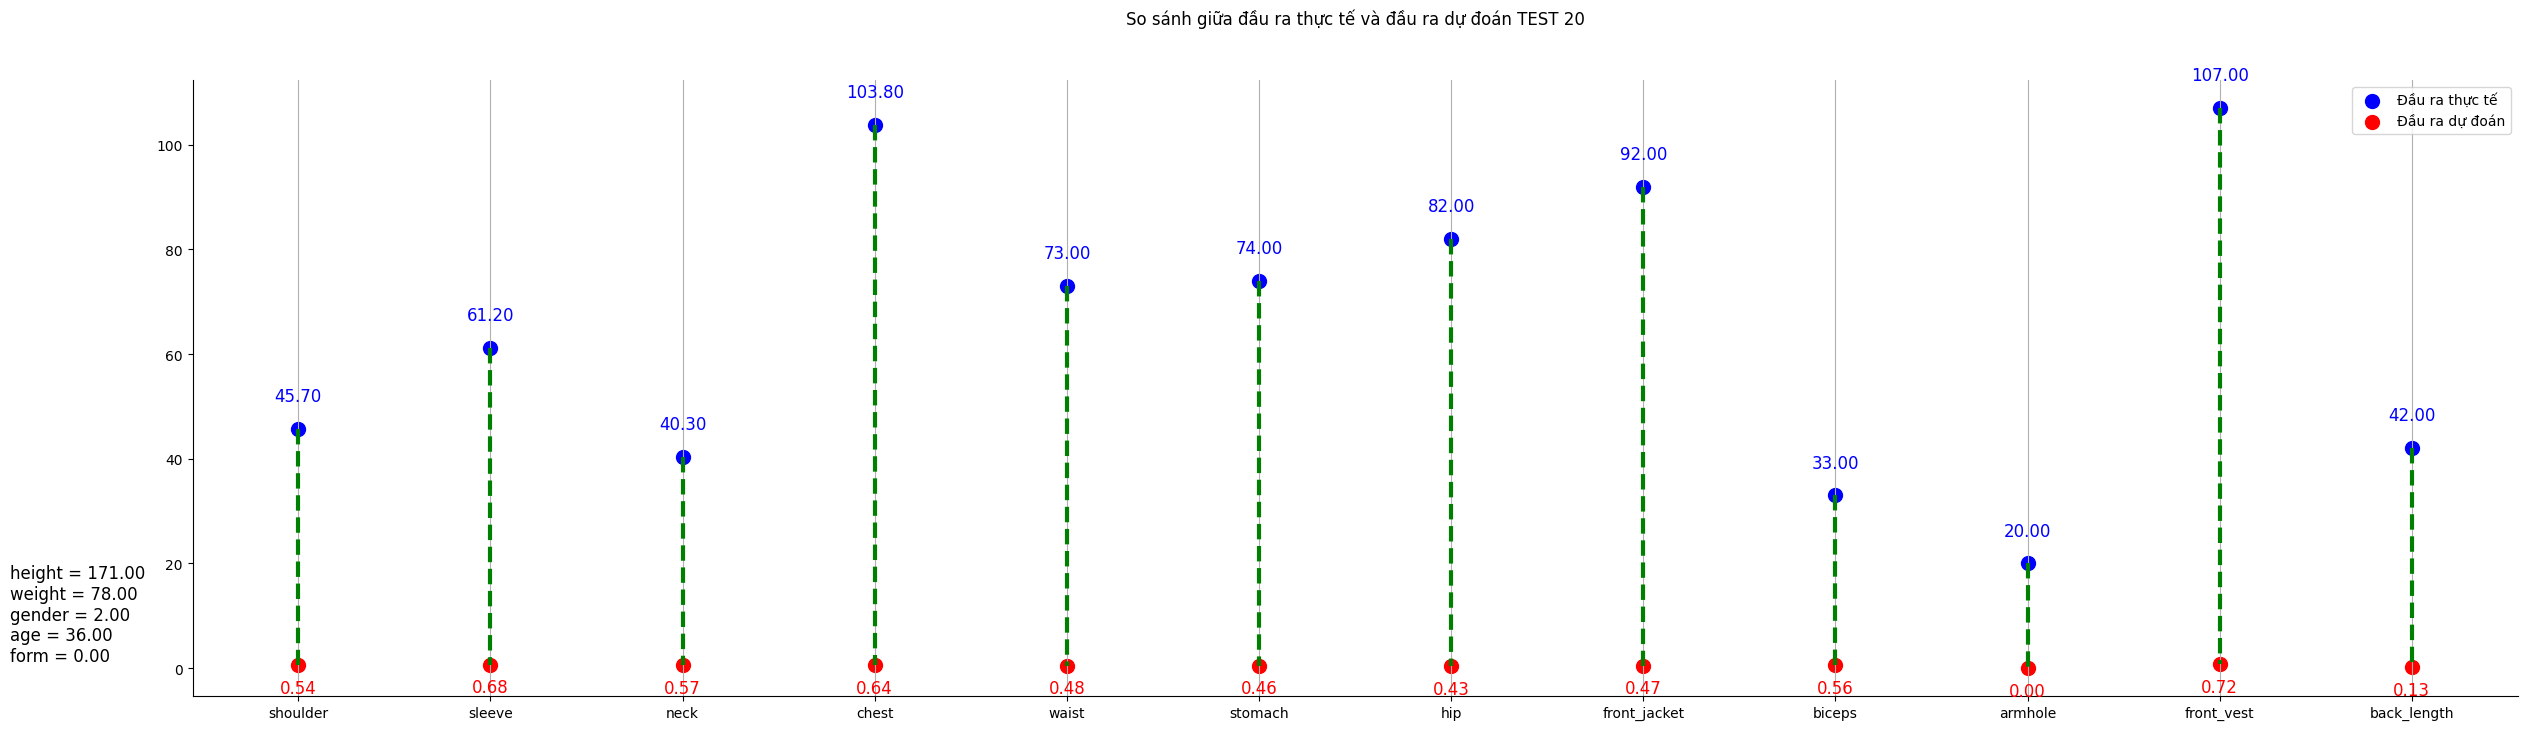

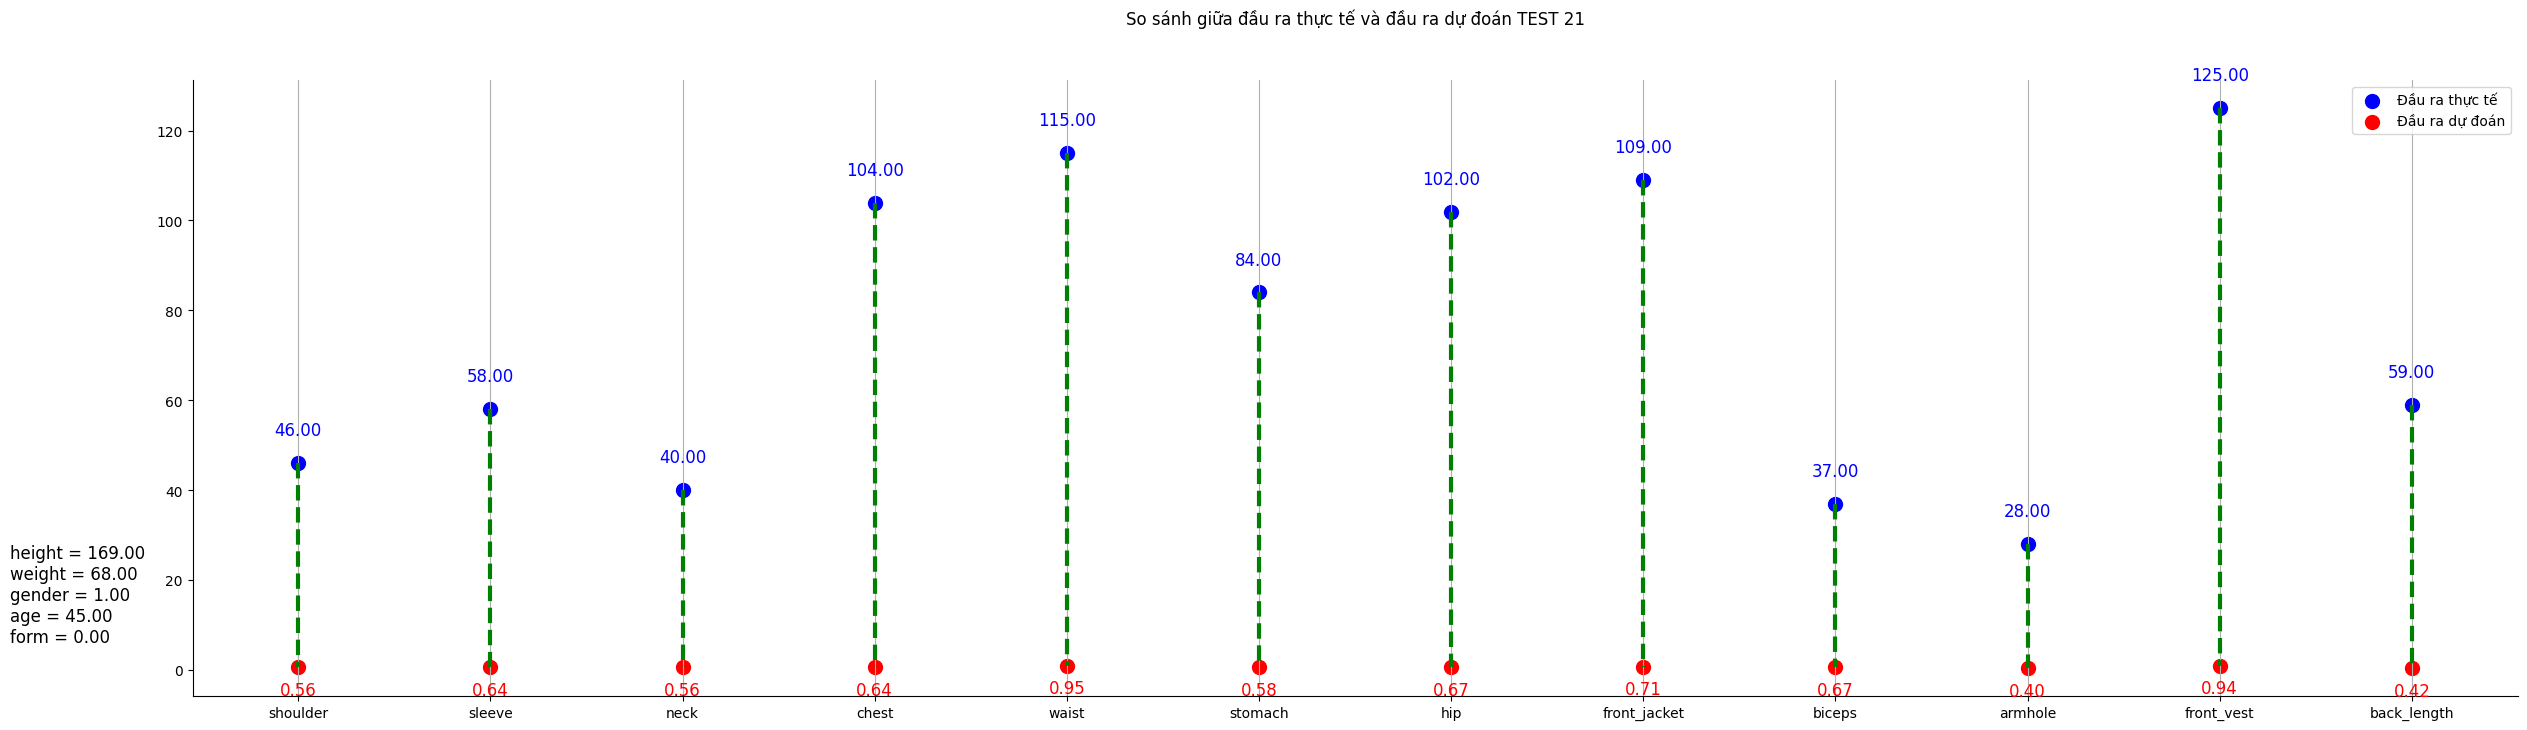

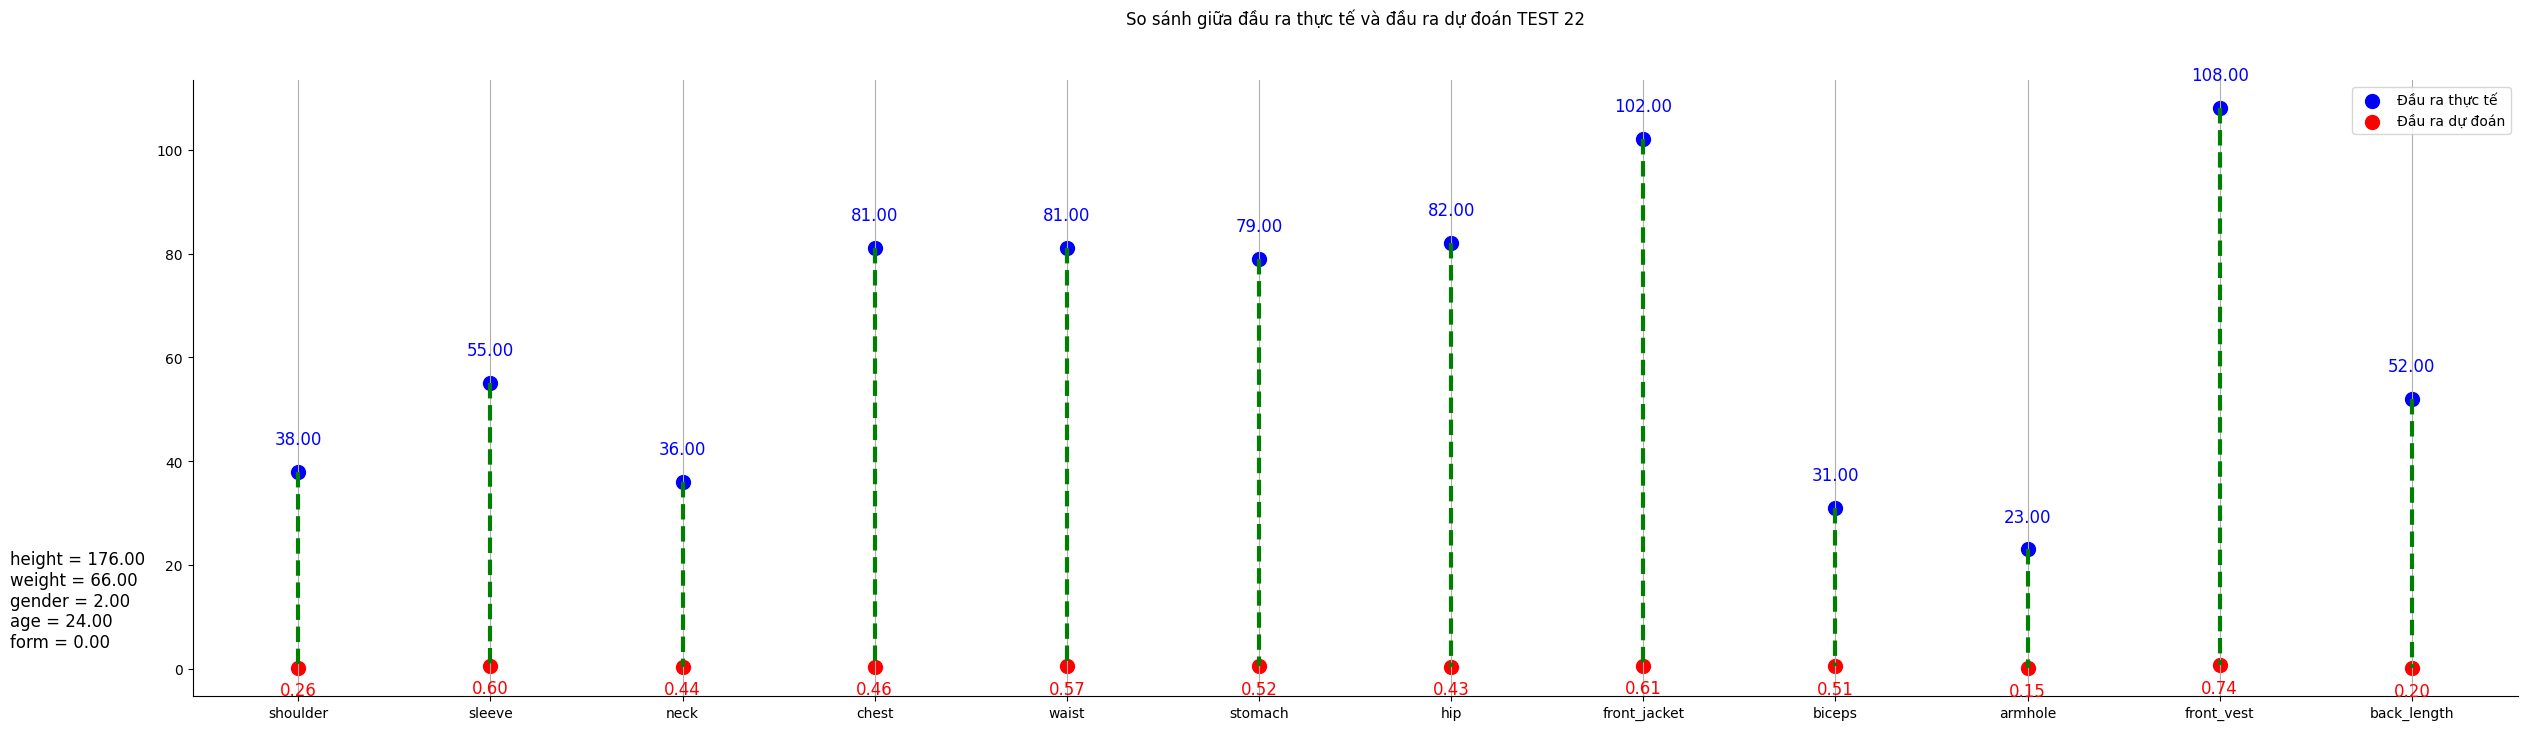

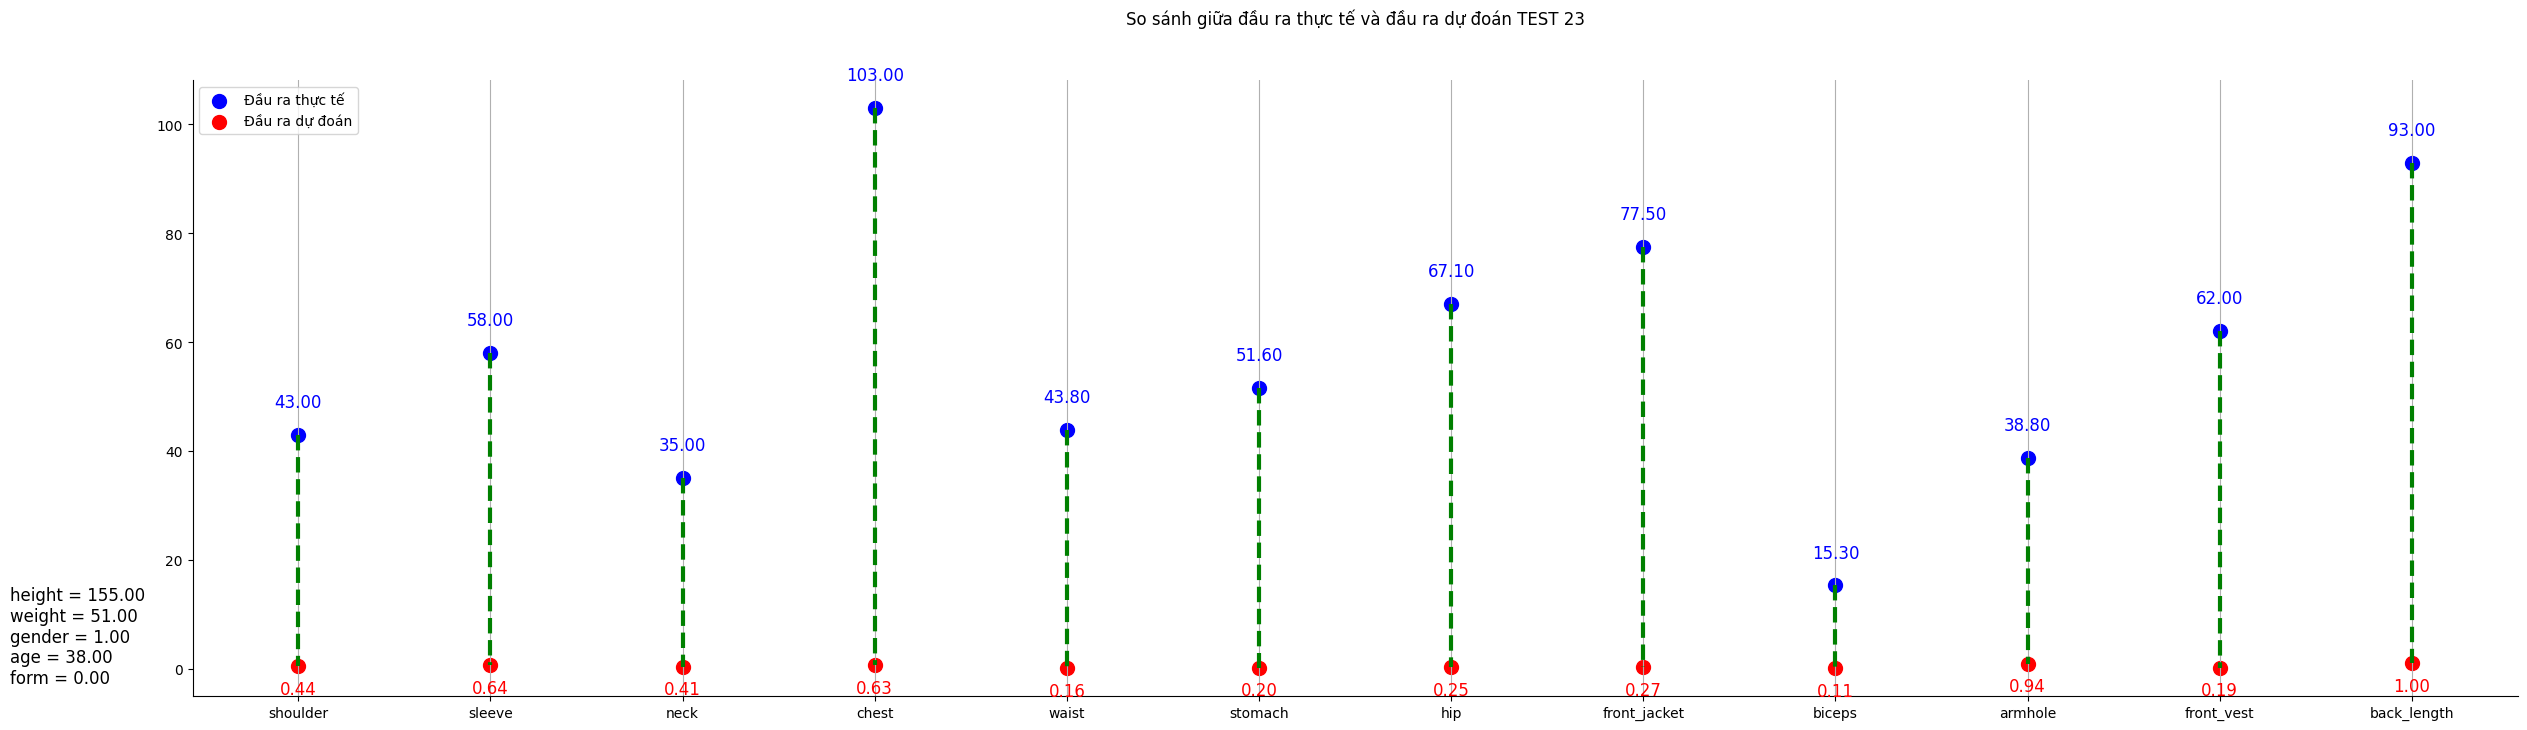

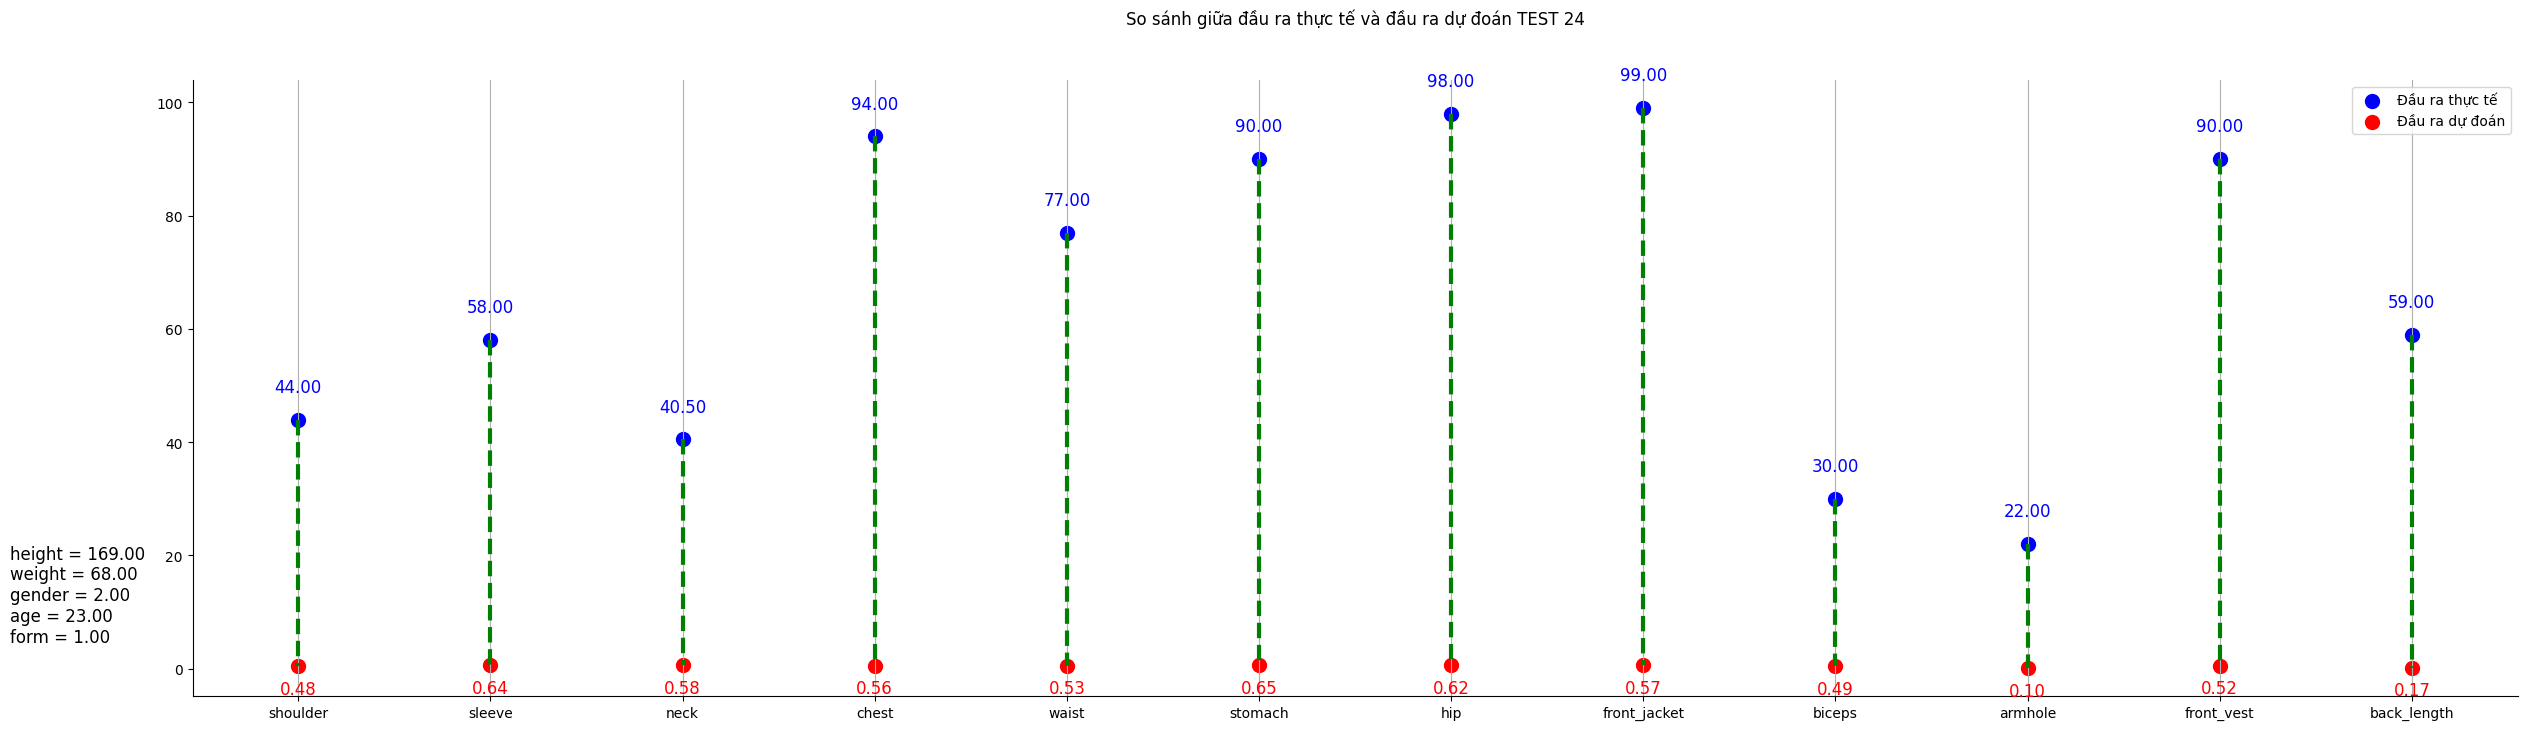

In [13]:
test = np.array(test)
pred = np.array(pred)

labels = input_columns + output_columns
input_size = len(input_columns)
output_size = len(output_columns)

for i in range(25):
    plt.figure(figsize=(30, 8))

    # Thay đổi viền
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)

    # Vẽ đầu ra thực tế
    plt.scatter(output_columns, test[i][input_size:], marker='o', color='b', label='Đầu ra thực tế', s=100)
    
    # Vẽ đầu ra dự đoán
    plt.scatter(output_columns, pred[i][input_size:], marker='o', color='r', label='Đầu ra dự đoán', s=100)

    # Nối các điểm tương ứng của test và pred trong mỗi cột (cho output)
    for j in range(len(output_columns)):
        plt.plot([output_columns[j], output_columns[j]], 
                 [test[i][j + input_size], pred[i][j + input_size]], 
                 color='green', linestyle='--', linewidth=3)

    # Thêm giá trị vào các điểm trên đồ thị cho đầu ra thực tế
    for j in range(len(output_columns)):
        d = (pred[i][j + input_size] - test[i][j + input_size]) / abs(pred[i][j + input_size] - test[i][j + input_size])
        plt.annotate(f'{test[i][j + input_size]:.2f}', (output_columns[j], test[i][j + input_size]), textcoords="offset points", xytext=(0,-20 * d), ha='center', fontsize=12, color='blue')
        plt.annotate(f'{pred[i][j + input_size]:.2f}', (output_columns[j], pred[i][j + input_size]), textcoords="offset points", xytext=(0,20 * d), ha='center', fontsize=12, color='red')

    # Hiển thị giá trị input dưới dạng chuỗi ký tự
    input_text = "\n".join([f"{input_columns[j]} = {test[i][j]:.2f}" for j in range(input_size)])
    plt.text(-1.5, min(test[i][input_size:]) - 0.1, input_text, fontsize=12, color='black', ha='left', va='top')

    # Thêm tiêu đề và nhãn trục
    plt.title(f"So sánh giữa đầu ra thực tế và đầu ra dự đoán TEST {i}", pad=40)

    # Hiển thị legend
    plt.legend()

    # Hiển thị lưới
    plt.grid(True, axis='x')
    plt.savefig(figure_path / f"test_{i}.png")

    # Hiển thị biểu đồ
    plt.show()
